In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

from matplotlib.pyplot import rc_context
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.cm as cm

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
from cnmf import cNMF, load_df_from_npz
import harmonypy
sys.path.append('../../../Code/')
# from utils import TCAT

from sklearn import metrics
from utils import read_dataset_log
import harmonypy as hm
from sklearn.preprocessing import MinMaxScaler
#from adjustText import adjust_text


In [2]:
from datashader.mpl_ext import dsshow
import datashader as ds

import matplotlib.colors
cmap_density = plt.cm.hsv
cmaplist = [cmap_density(i) for i in range(cmap_density.N)]
cmaplist = cmaplist[0:round(len(cmaplist)*0.7)]
cmaplist.reverse()
cmap_density = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap_density.N)

In [3]:
from scipy.stats import fisher_exact

from scipy.stats import ttest_ind

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



import pickle

In [4]:
from matplotlib import rcParams, font_manager
import matplotlib


rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
label_fontsize = 10
tick_fontsize = 8

In [5]:
figdir = '../../../Figures/Components'

In [6]:
figdir

'../../../Figures/Components'

In [7]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params

dataset                                           usage_fn  \
dataset                                                                       
AMP-RA            AMP-RA  /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer    Pan-Cancer  /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU                TBRU  /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid        UK-Covid  /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT            COMBAT  /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue    Pan-Tissue  /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks            Sparks                                                NaN   
Stimseq          Stimseq                                                NaN   

                                                gene_scores_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                   gene_tpm_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....   
Pan-Cancer   /data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...   
TBRU         /data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...   
HIV-Vaccine  /data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...   
UK-Covid     /data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...   
COMBAT       /data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...   
Pan-Tissue   /data/srlab1/TCAT/Data/PerDataset/XTissueImmun...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                                       tcat_fn  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Stimseq      /data/srlab1/TCAT/Data/PerDataset/Stimseq/TCAT...   

                                        tcat_fn_withsingletons  \
dataset                                                          
AMP-RA       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Cancer   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
TBRU         /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
HIV-Vaccine  /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
UK-Covid     /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
COMBAT       /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Pan-Tissue   /data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...   
Sparks                                                     NaN   
Stimseq                                                    NaN   

                                              manual_gating_fn  \
dataset                                                          
AMP-RA                                                     NaN   
Pan-Cancer                               

In [8]:
gep_info = read_dataset_log('cGEP_Name')
rename_map = dict(zip(gep_info['cGep_Name'], gep_info['Short_Name']))


In [9]:
lineage_geps = gep_info[gep_info['Class']=='Lineage']['Short_Name'].tolist()

In [11]:
# aim_assoc_geps = ['Early-Activation',
# 'ISG',
# 'BCL2-Survival',
# 'Treg',
# 'OX40/EBI3-Activation',
# 'Cytoskeleton',
# 'Th17',
# 'ICOS/CD38-Activation',
# 'Exhaustion',
# 'RGCC/MYADM',
# 'CCR10-Migration',
# 'CellCycle-S',
# 'Tfh-2',
# 'CTLA4+/CD38+-Activation',
# 'HeatShock',
# 'Tph',
# 'Multi-Cytokine',
# 'TIMD4/TIM3-Activation',
# 'Th17-2',
# 'Th2-2',
# 'Metallothionein',
# 'CellCycle-Late-S',
# 'CellCycle-G2M',
#                    ]

# cc_assoc_geps = ['CTLA4+/CD38+-Activation', 'Cytoskeleton', 'Early-Activation',
#        'Exhaustion', 'HLA', 'ICOS/CD38-Activation', 'IL10/IL19-Secretion',
#        'Metallothionein', 'OX40/EBI3-Activation', 'TIMD4/TIM3-Activation',
#        'Th17-2', 'Tph']

In [10]:
cc_geps = ['CellCycle-G2M', 'CellCycle-S', 'CellCycle-Late-S']

In [11]:
# activation_geps_all = sorted(list(set(aim_assoc_geps).intersection(cc_assoc_geps)))
# activation_geps_all

In [12]:
# activation_geps = sorted(['OX40/EBI3-Activation', 'TIMD4/TIM3-Activation', 'ICOS/CD38-Activation', 
#                   'CTLA4+/CD38+-Activation'])
# activation_geps

In [13]:
# Import the tab10 colormap
tab10_cmap = cm.get_cmap('tab10')


In [14]:
activation_threshold = 0.0625

# Load datasets

In [15]:
usage_all = {}
usage_norm_all = {}
meta_all = {}
activation_all = {}

In [16]:
ds_list = params.index

In [17]:
ds_list

Index(['AMP-RA', 'Pan-Cancer', 'TBRU', 'HIV-Vaccine', 'UK-Covid', 'COMBAT',
       'Pan-Tissue', 'Sparks', 'Stimseq'],
      dtype='object', name='dataset')

In [18]:
pheno_map = {'COMBAT' : ['Covid_or_Healthy', ['Covid', 'Healthy_All']],
            'AMP-RA' : ['disease_status', ['RA', 'OA']],
            'Pan-Cancer' : ['loc', ['T', 'N']],
            'UK-Covid' : ['Overall_Status', ['Covid', 'Healthy_All']]}

In [19]:
for dataset in ds_list:
    print(dataset)
    usage = pd.read_csv(params.loc[dataset, 'tcat_fn'], index_col = 0, sep = '\t')
    usage.columns = usage.columns.map(rename_map)
    usage_norm = usage.div(usage.sum(axis=1), axis=0)
    
    if dataset in ['TBRU', 'HIV-Vaccine', 'Sparks']:
        meta = pd.read_csv(params.loc[dataset, 'metadata_fn'],
                  index_col = 0, sep = '\t')
        
    elif dataset in ['Stimseq']:
        counts_fn = params.loc[dataset, 'raw_counts_filt_fn']
        adata = sc.read(counts_fn)
        meta = adata.obs.loc[usage_norm.index, :]
        
        # Rescale usage matrix
        scaler = 1e2
        usage = usage*scaler
        
    else:
        meta = pd.read_csv(params.loc[dataset, 'metadata_fn'].replace('metadata', 'metadata_PhenotypeAssociations'),
                      index_col = 0, sep = '\t')
    meta = meta.loc[usage_norm.index, ]
    
    activation_fn = params.loc[dataset, 'activation_score_fn']
    print(activation_fn)
    activation = pd.read_csv(activation_fn, index_col = 0, sep = '\t')
    activation = activation.loc[usage_norm.index, :]

    usage_all[dataset] = usage
    usage_norm_all[dataset] = usage_norm
    meta_all[dataset] = meta
    activation_all[dataset] = activation

AMP-RA
/data/srlab1/TCAT/Data/PerDataset/AMPRA/ActivationScore.AMP-RA.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv
Pan-Cancer


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/data/srlab1/TCAT/Data/PerDataset/Pancancer/ActivationScore.Pan-Cancer.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv
TBRU
/data/srlab1/TCAT/Data/PerDataset/TBRU/ActivationScore.TBRU.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv
HIV-Vaccine
/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/ActivationScore.HIV-Vaccine.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv
UK-Covid


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (18,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/data/srlab1/TCAT/Data/PerDataset/UKCOVID/ActivationScore.UK-Covid.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv
COMBAT
/data/srlab1/TCAT/Data/PerDataset/COMBAT/ActivationScore.COMBAT.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv
Pan-Tissue


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/data/srlab1/TCAT/Data/PerDataset/XTissueImmuneAtlas/ActivationScore.Pan-Tissue.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv
Sparks


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


/data/srlab1/TCAT/Data/PerDataset/Sparks2023/ActivationScore.Sparks.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv
Stimseq
Only considering the two last: ['.doubletfilt', '.h5ad'].
Only considering the two last: ['.doubletfilt', '.h5ad'].
/data/srlab1/TCAT/Data/PerDataset/Stimseq/ActivationScore.Stimseq.Sum_CTLA4-ICOS-OX40-TIMD4.20240225.tsv


In [20]:
gating_datasets = ['Sparks', 'COMBAT', 'Stimseq']

gating_lineage_all = {}

for dataset in gating_datasets:
    gating_lineage_all[dataset] = pd.read_csv(params.loc[dataset, 'manual_gating_fn'],
                             index_col = 0, sep = '\t')

In [21]:
cc_all = {}

for dataset in ds_list:
    cc_score = usage_norm_all[dataset][cc_geps].sum(axis = 1)
    cc_threshold = 0.1
    
    prolif_cells = cc_score > cc_threshold
    cc = pd.concat([cc_score, prolif_cells], axis = 1)
    cc.columns = ['CC_Score', 'CC_Status']

    cc_all[dataset] = cc

In [22]:
gating_act_all = {}

for dataset in ['COMBAT', 'Sparks', 'Stimseq', 'UK-Covid', 'AMP-RA', 'TBRU']:
    gating_act_all[dataset] = pd.read_csv(params.loc[dataset, 'manual_activation_gating_fn'],
                             index_col = 0, sep = '\t')
    
#     if dataset == 'Stimseq':
#         activation_cluster = pd.read_csv('../../../Data/PerDataset/Stimseq/ActivationByClustering.tsv', 
#                                          index_col = 0, sep = '\t')

#         gating_act_all[dataset]['Activated'] = activation_cluster.loc[gating_act_all[dataset].index, 
#                                                                       'Activation_Cluster_ByLineage']

In [23]:
gating_all = {}

for dataset in ['COMBAT', 'Sparks', 'Stimseq']:
    gating_all[dataset] = pd.read_csv(params.loc[dataset, 'manual_gating_fn'],
                             index_col = 0, sep = '\t')

In [24]:
gating_class_broad_all = {}
for dataset in ['COMBAT', 'Sparks', 'Stimseq']:
    gating = gating_all[dataset]['0'].copy()
    gating_class_broad = pd.Series(np.nan, index = gating.index)
    
    gating_class_broad.loc[gating.str.contains('CD4')] = 'CD4'
    gating_class_broad.loc[gating=='Treg'] = 'CD4'
    gating_class_broad.loc[gating.str.contains('CD8')] = 'CD8'
    gating_class_broad.loc[gating_class_broad.isna()] = 'Other'

    gating_class_broad_all[dataset] = gating_class_broad

In [25]:
gating_class_all = {}
for dataset in ['COMBAT', 'Sparks', 'Stimseq']:
    gating = gating_all[dataset]['0'].copy()
    gating_class = pd.Series(np.nan, index = gating.index)
    
    gating_class.loc[gating.str.contains('CD4')] = 'CD4 Conv'
    gating_class.loc[gating=='Treg'] = 'CD4 Treg'
    gating_class.loc[gating.str.contains('CD8')] = 'CD8 Conv'
    gating_class.loc[gating_class.isna()] = 'Other'

    gating_class_all[dataset] = gating_class

In [26]:
# gating_clus_all = {}

# for dataset in ['COMBAT', 'Stimseq',]:
#     gating_clus_all[dataset] = pd.DataFrame()
#     activation_cluster = pd.read_csv('../../../Data/PerDataset/%s/ActivationByClustering.tsv' % dataset, 
#                                      index_col = 0, sep = '\t')

#     gating_clus_all[dataset] = activation_cluster.loc[gating_act_all[dataset].index, :]

In [ ]:
# gating_clus_all[dataset].head(2)

# Cross-dataset comparison

## Compare score by dataset

In [23]:
activation_all_df = pd.concat(activation_all)
activation_all_df = activation_all_df.reset_index()
activation_all_df.columns = ['dataset', 'index', 'Activation_Score', #'Activation_Status'
                            ]

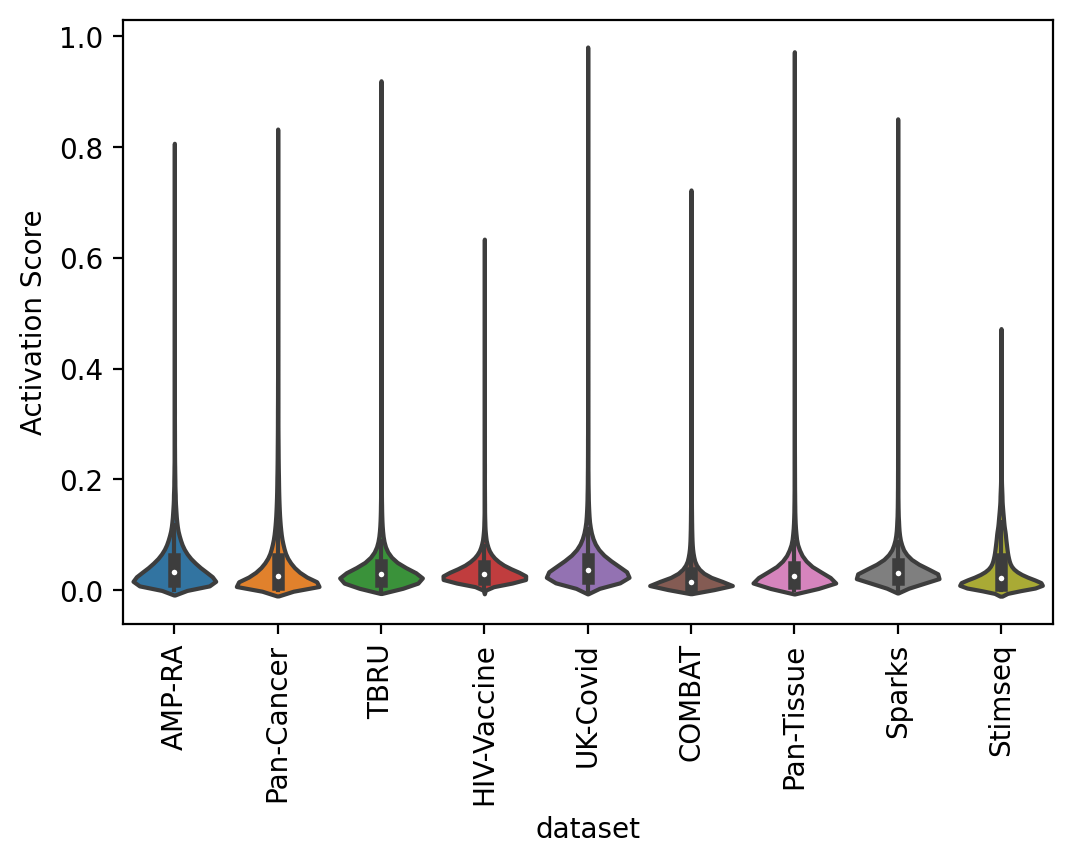

In [24]:
fig, ax = plt.subplots(dpi = 200)
sns.violinplot(data = activation_all_df, y = 'Activation_Score', x = 'dataset', scale = 'width')
ax.tick_params('x', rotation  = 90)
ax.set_ylabel('Activation Score')
xlims = ax.get_xlim()
# ax.hlines(y = activation_threshold, xmin = xlims[0], xmax = xlims[1], colors = 'black')

## Choose threshold

In [27]:
print(activation_threshold)

0.0625


In [28]:
activation_threshold

0.0625

In [29]:
for dataset in ds_list:
    print(dataset)
    activation_all[dataset]['Activation_Status'] = activation_all[dataset]['Activation_Score'] > activation_threshold

AMP-RA
Pan-Cancer
TBRU
HIV-Vaccine
UK-Covid
COMBAT
Pan-Tissue
Sparks
Stimseq


## Calculate stats

In [ ]:
all_datasets = {}
all_datasets['pct_activated'] = pd.DataFrame()
all_datasets['lineage_fc'] = pd.DataFrame()

In [ ]:
all_datasets['act_cc_corr'] = pd.DataFrame()

### Percent activated by dataset/disease

In [ ]:
for dataset in pheno_map.keys():#ds_list:
    print(dataset)
    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]
    
    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']
    pheno_col = pheno_map[dataset][0]
    pheno_order = pheno_map[dataset][1]
    ind = meta[pheno_col].dropna().index 

    max_lineage = usage_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)
    
    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']
    
    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']
    
    # Calculate % of activated, proliferating cells
    pct_activated = pd.DataFrame(index = pheno_order)
    pct_activated[['Activated', 'Proliferating']] = np.nan
    
    for pheno in pheno_order:
        print(pheno)
        # Pct of activated/cycling cells within phenotype
        ind_pheno = meta.loc[ind, pheno_col]==pheno
        ind_pheno = ind_pheno[ind_pheno].index

        pct_act_pheno = (activated_cells[ind_pheno].value_counts(normalize = True)*100)[True]
        pct_activated.loc[pheno, 'Activated'] = pct_act_pheno

        pct_prolif_pheno = (prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]
        pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_pheno

    pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')
    pct_activated_df['dataset'] = dataset
    all_datasets['pct_activated'] = all_datasets['pct_activated'].append(pct_activated_df)


In [ ]:
# By disease, compare activated vs prolif, vs both
all_datasets['pct_activated_both'] = pd.DataFrame()

In [ ]:
for dataset in pheno_map.keys():#ds_list:
    print(dataset)
    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]
    
    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']
    pheno_col = pheno_map[dataset][0]
    pheno_order = pheno_map[dataset][1]
    ind = meta[pheno_col].dropna().index 

    max_lineage = usage_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)
    
    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']
    
    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']
    
    # Calculate % of activated, proliferating cells
    pct_activated = pd.DataFrame(index = pheno_order)
    pct_activated[['Activated', 'Proliferating']] = np.nan
    
    for pheno in pheno_order:
        print(pheno)
        # Pct of activated/cycling cells within phenotype
        ind_pheno = meta.loc[ind, pheno_col]==pheno
        ind_pheno = ind_pheno[ind_pheno].index

        
        pct_both = ((activated_cells[ind_pheno] & prolif_cells[ind_pheno]).value_counts(normalize = True)*100)[True]
        pct_act_only = ((activated_cells[ind_pheno] & (-prolif_cells[ind_pheno])).value_counts(normalize = True)*100)[True]
        pct_prolif_only = (((-activated_cells[ind_pheno]) & (prolif_cells[ind_pheno])).value_counts(normalize = True)*100)[True]
        
        pct_activated.loc[pheno, 'Activated'] = pct_act_only
        pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_only
        pct_activated.loc[pheno, 'Both'] = pct_both

    pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')
    pct_activated_df['dataset'] = dataset
    all_datasets['pct_activated_both'] = all_datasets['pct_activated_both'].append(pct_activated_df)


In [ ]:
all_datasets['pct_activated_both']

In [ ]:
all_datasets['pct_activated'] 

In [ ]:
# Not broken up by disease, compare activated vs prolif, vs both
all_datasets['pct_activated_all'] = pd.DataFrame()

In [ ]:
for dataset in ds_list:
    print(dataset)
    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]
    
    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']
#     pheno_col = pheno_map[dataset][0]
#     pheno_order = pheno_map[dataset][1]
#     ind = meta[pheno_col].dropna().index 

#     max_lineage = usage_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)
    
    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']
    
    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']
    
    # Calculate % of activated, proliferating, both cells
    ind = activated_cells.index

    pct_both = ((activated_cells[ind] & prolif_cells[ind]).value_counts(normalize = True)*100)[True]
    pct_act_only = ((activated_cells[ind] & (-prolif_cells[ind])).value_counts(normalize = True)*100)[True]
    pct_prolif_only = (((-activated_cells[ind]) & (prolif_cells[ind])).value_counts(normalize = True)*100)[True]

    pct_activated = pd.DataFrame()
    pct_activated[['Activated', 'Proliferating', 'Both']] = [[pct_act_only, pct_prolif_only, pct_both]]
    pct_activated['dataset'] = dataset

    # pct_activated_df = pct_activated.melt()
    # pct_activated_df['dataset'] = dataset

    all_datasets['pct_activated_all'] = all_datasets['pct_activated_all'].append(pct_activated)


all_datasets['pct_activated_all'].index = all_datasets['pct_activated_all']['dataset']

In [ ]:
all_datasets['pct_activated_all']

In [ ]:
dataset = 'UK-Covid'

In [ ]:
meta = meta_all[dataset]
usage = usage_all[dataset]
usage_norm = usage_norm_all[dataset]

cluster_col = params.loc[dataset, 'cluster_col']
individual_col = params.loc[dataset, 'individual_col']
sample_col = params.loc[dataset, 'sample_col']
pheno_col = pheno_map[dataset][0]
pheno_order = pheno_map[dataset][1]
ind = meta[pheno_col].dropna().index 

max_lineage = usage_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)

cc_score = cc_all[dataset]['CC_Score']
prolif_cells = cc_all[dataset]['CC_Status']

activation = activation_all[dataset]
activation_score = activation['Activation_Score']
activated_cells = activation['Activation_Status']

# Calculate % of activated, proliferating cells
pct_activated = pd.DataFrame(index = pheno_order)
pct_activated[['Activated', 'Proliferating']] = np.nan



In [ ]:
for pheno in pheno_order:
    print(pheno)


In [ ]:
ind_pheno = meta.loc[ind, pheno_col]==pheno
ind_pheno = ind_pheno[ind_pheno].index


In [ ]:
pct_act_pheno = (activated_cells[ind_pheno].value_counts(normalize = True)*100)[True]
pct_activated.loc[pheno, 'Activated'] = pct_act_pheno

pct_prolif_pheno = (prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]
pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_pheno


In [ ]:
(prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]

In [ ]:
pct_activated

In [ ]:
meta.loc[ind_pheno, ].columns

In [ ]:
meta.loc[ind_pheno, 'Status'].value_counts()

In [ ]:
meta.loc[:, 'Status'].value_counts()

In [ ]:
meta.loc[ind_pheno, 'Status_on_day_collection'].value_counts()

In [ ]:
meta.loc[ind_pheno, 'Status_on_day_collection_summary'].value_counts()

In [ ]:
for pheno in pheno_order:
    print(pheno)
    # Pct of activated/cycling cells within phenotype
    ind_pheno = meta.loc[ind, pheno_col]==pheno
    ind_pheno = ind_pheno[ind_pheno].index

    pct_act_pheno = (activated_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Activated'] = pct_act_pheno

    pct_prolif_pheno = (prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_pheno

pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')
pct_activated_df['dataset'] = dataset


In [ ]:
pheno_map.keys()

### Lineage associations

In [ ]:
for dataset in pheno_map.keys():#ds_list:
    print(dataset)
    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]
    
    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']
    pheno_col = pheno_map[dataset][0]
    pheno_order = pheno_map[dataset][1]
    ind = meta[pheno_col].dropna().index 

    max_lineage = usage_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)
    
    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']
    
    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']
    
    # Test binarized lineage associations in activated cells, per lineage
    lin_assoc_binary = pd.DataFrame(columns = ['dataset', 'pheno_col', 'pheno', 'lineage', 'OR', 'pval', 'padj'])
    for pheno in pheno_order:
        ind_pheno = meta.loc[ind, pheno_col]==pheno
        ind_pheno = ind_pheno[ind_pheno].index
        
        for lineage in lineage_geps:
            dat = [((max_lineage[ind_pheno]==lineage) & activated_cells[ind_pheno]).value_counts(), 
               ((max_lineage[ind_pheno]==lineage) & -activated_cells[ind_pheno]).value_counts(),
              (-(max_lineage[ind_pheno]==lineage) & activated_cells[ind_pheno]).value_counts(), 
               (-(max_lineage[ind_pheno]==lineage) & -activated_cells[ind_pheno]).value_counts()]


            dat = np.array([x[True] if True in x.index else 0 for x in dat]).reshape(2, 2)
            odd_ratio, p_value = fisher_exact(dat)
            p_adj = p_value*len(lineage_geps) ### Adjust Bonferroni

            lin_assoc_binary = lin_assoc_binary.append(pd.Series(
                [dataset, pheno_col, pheno, lineage, odd_ratio, p_value, p_adj], 
                            index = lin_assoc_binary.columns),
                           ignore_index=True)

    lin_assoc_binary['log10_OR'] = np.log10(lin_assoc_binary['OR'])
    all_datasets['lineage_fc'] = all_datasets['lineage_fc'].append(lin_assoc_binary)

In [ ]:
all_datasets['gated_lineage_fc_all'] = pd.DataFrame()

for dataset in gating_datasets:
    print(dataset)

    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]

    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']
    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']

    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']
    
    ind = set(meta.index).intersection(activated_cells.index)
    gating = gating_lineage_all[dataset].loc[ind, '0']

    # Test binarized lineage associations in activated cells, per lineage
    lin_assoc_binary = pd.DataFrame(columns = ['dataset',# 'pheno_col', 'pheno', 
                                               'lineage', 'OR', 'pval', 'padj'])

    for lineage in list(gating.dropna().unique()):
        dat = [((gating[ind]==lineage) & activated_cells[ind]).value_counts(), 
           ((gating[ind]==lineage) & -activated_cells[ind]).value_counts(),
          (-(gating[ind]==lineage) & activated_cells[ind]).value_counts(), 
           (-(gating[ind]==lineage) & -activated_cells[ind]).value_counts()]


        dat = np.array([x[True] if True in x.index else 0 for x in dat]).reshape(2, 2)
        odd_ratio, p_value = fisher_exact(dat)
        p_adj = p_value*len(lineage_geps) ### Adjust Bonferroni

        lin_assoc_binary = lin_assoc_binary.append(pd.Series(
            [dataset, #pheno_col, pheno, 
             lineage, odd_ratio, p_value, p_adj], 
                        index = lin_assoc_binary.columns),
                       ignore_index=True)

    lin_assoc_binary['log10_OR'] = np.log10(lin_assoc_binary['OR'])
    all_datasets['gated_lineage_fc_all'] = all_datasets['gated_lineage_fc_all'].append(lin_assoc_binary)

In [ ]:
all_datasets['gated_lineage_fc_all'].sort_values(['dataset', 'log10_OR'], ascending = False)

In [ ]:
pheno_map

In [ ]:
all_datasets['gated_lineage_fc'] = pd.DataFrame()

for dataset in ['COMBAT']:
    print(dataset)

    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]
    pheno_col = pheno_map[dataset][0]
    pheno_order = pheno_map[dataset][1]

    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']
    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']

    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']
    
    ind = set(meta.index).intersection(activated_cells.index)
    gating = gating_lineage_all[dataset].loc[ind, '0']

    # Test binarized lineage associations in activated cells, per lineage
    lin_assoc_binary = pd.DataFrame(columns = ['dataset', 'pheno_col', 'pheno', 
                                               'lineage', 'OR', 'pval', 'padj'])
    
    for pheno in pheno_order:
        ind_pheno = meta.loc[ind, pheno_col]==pheno
        ind_pheno = ind_pheno[ind_pheno].index

        for lineage in list(gating.dropna().unique()):

            dat = [((gating[ind_pheno]==lineage) & activated_cells[ind_pheno]).value_counts(), 
               ((gating[ind_pheno]==lineage) & -activated_cells[ind_pheno]).value_counts(),
              (-(gating[ind_pheno]==lineage) & activated_cells[ind_pheno]).value_counts(), 
               (-(gating[ind_pheno]==lineage) & -activated_cells[ind_pheno]).value_counts()]



            dat = np.array([x[True] if True in x.index else 0 for x in dat]).reshape(2, 2)
            odd_ratio, p_value = fisher_exact(dat)
            p_adj = p_value*len(lineage_geps) ### Adjust Bonferroni

            lin_assoc_binary = lin_assoc_binary.append(pd.Series(
                [dataset, pheno_col, pheno, 
                 lineage, odd_ratio, p_value, p_adj], 
                            index = lin_assoc_binary.columns),
                           ignore_index=True)

    lin_assoc_binary['log10_OR'] = np.log10(lin_assoc_binary['OR'])
    all_datasets['gated_lineage_fc'] = all_datasets['gated_lineage_fc'].append(lin_assoc_binary)

In [ ]:
all_datasets['gated_lineage_fc']

In [ ]:
all_datasets['gated_lineage_fc'].sort_values(['pheno', 'log10_OR'], ascending = False)

### Cell Cycle correlation

In [ ]:
for dataset in ds_list:
    print(dataset)
    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]
    
    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']
#     pheno_col = pheno_map[dataset][0]
#     pheno_order = pheno_map[dataset][1]
#     ind = meta[pheno_col].dropna().index 

#     max_lineage = usage_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)
    
    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']
    
    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']
    
    # Calculate % of activated, proliferating, both cells
    ind = activated_cells.index

    r_p, _ = pearsonr(activation_score[ind], cc_score[ind])

    r_s, _ = spearmanr(activation_score[ind], cc_score[ind])

    cc_corr = pd.DataFrame()
    cc_corr[['dataset', 'R_Pearson', 'R_Spearman']] = [[dataset, r_p, r_s]]


    all_datasets['act_cc_corr'] = all_datasets['act_cc_corr'].append(cc_corr)
all_datasets['act_cc_corr'].index = all_datasets['act_cc_corr']['dataset']

In [ ]:
all_datasets['act_cc_corr']

### Cell Cycle associations

In [ ]:
all_datasets.keys()

In [ ]:
all_datasets['prolif_OR'] = pd.DataFrame()

In [ ]:
for dataset in ds_list:
    print(dataset)
    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]
    
    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']
    # pheno_col = pheno_map[dataset][0]
    # pheno_order = pheno_map[dataset][1]
    ind = meta.index 

    max_lineage = usage_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)
    
    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']
    
    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']
    

    dat = [(prolif_cells & activated_cells[ind]).value_counts(), 
       ((prolif_cells) & -activated_cells[ind]).value_counts(),
      (-(prolif_cells) & activated_cells[ind]).value_counts(), 
       (-(prolif_cells) & -activated_cells[ind]).value_counts()]


    dat = np.array([x[True] if True in x.index else 0 for x in dat]).reshape(2, 2)
    odd_ratio, p_value = fisher_exact(dat)
    p_adj = p_value*len(lineage_geps) ### Adjust Bonferroni

    prolif_assoc = pd.DataFrame(columns = ['dataset', 'OR', 'pval', 'padj'])
    prolif_assoc = prolif_assoc.append(pd.Series(
                    [dataset, odd_ratio, p_value, p_adj], 
                    index = prolif_assoc.columns),
                   ignore_index=True)

    prolif_assoc['log10_OR'] = np.log10(prolif_assoc['OR'])
    all_datasets['prolif_OR'] = all_datasets['prolif_OR'].append(prolif_assoc)

In [ ]:
all_datasets['prolif_OR'].sort_values('log10_OR', ascending = False)

## Plot results

### Percent activated by dataset/disease

In [ ]:
pheno_map

In [ ]:
pheno_name_map = {'Covid' : 'COVID-19', 'Healthy_All' : 'Healthy', 'T': 'Tumor', 'N': 'Normal\nTissue',
                 'RA' : 'RA', 'OA' : 'OA'}
all_datasets['pct_activated']['label'] = all_datasets['pct_activated']['index'].replace(pheno_name_map)

In [ ]:
all_datasets['pct_activated']['label'].unique()

In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (5, 3))
# # grouped barplot
# sns.barplot(x = 'index', y = 'value', 
#        hue = 'variable',# hue_order = [True, False], order =pheno_order,
#            data = all_datasets['pct_activated'], edgecolor="white")
# ax.set_xticklabels(all_datasets['pct_activated']['label'].unique())
# ax.set_ylabel('% cells')
# ax.set_xlabel('')
# ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), 
#           title = '', ncol = 2)
# ax.tick_params(rotation = 90)

# ylims = ax.get_ylim()
# ax.vlines(1.5, ylims[0], ylims[1], color = 'black', linestyle = 'dashed')
# ax.vlines(3.5, ylims[0], ylims[1], color = 'black', linestyle = 'dashed')


In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (5, 3))

with rc_context(rc={'figure.dpi': 300}):
    g = sns.catplot(
        data = all_datasets['pct_activated'], kind='bar',
        x='label', y='value', hue='variable', col = 'dataset',
        height=2.5, aspect=.5, sharex = False, 
        col_order = ['Pan-Cancer', 'COMBAT', 'UK-Covid', 'AMP-RA'],
    )
    g.set_titles(col_template="{col_name}")
    for i, ax in enumerate(g.axes.flat):
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    g.set_axis_labels('', '% of Cells')
    g._legend.set_title('')
plt.subplots_adjust(wspace=0.125)

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.pdf'), bbox_inches="tight")


In [ ]:
all_datasets['pct_activated']['dataset_label'] = ['\n'.join([dataset,
                                                params.loc[dataset, 'tissue_type']]) 
                                                  for dataset in all_datasets['pct_activated']['dataset']]

In [ ]:
col_order = ['\n'.join([dataset, params.loc[dataset, 'tissue_type']]) 
 for dataset in ['Pan-Cancer', 'UK-Covid','COMBAT',  'AMP-RA']]

In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (5, 3))

with rc_context(rc={'figure.dpi': 300}):
    g = sns.catplot(
        data = all_datasets['pct_activated'], kind='bar',
        x='label', y='value', hue='variable', col = 'dataset_label',
        height=2.5, aspect=.5, sharex = False, 
        col_order = col_order,
    )
    g.set_titles(col_template="{col_name}")
    for i, ax in enumerate(g.axes.flat):
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    g.set_axis_labels('', '% of Cells')
    g._legend.set_title('')
plt.subplots_adjust(wspace=0.125)

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.pdf'), bbox_inches="tight")


In [ ]:

with rc_context(rc={'figure.dpi': 300}):
    g = sns.catplot(
        data = all_datasets['pct_activated'], kind='bar',
        x='label', y='value', hue='variable', col = 'dataset',
        height=2.5, aspect=.5, sharey = False, sharex = False, 
        col_order = ['Pan-Cancer', 'COMBAT', 'UK-Covid', 'AMP-RA'],
    )
    g.set_titles(col_template="{col_name}")
    for i, ax in enumerate(g.axes.flat):
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    g.set_axis_labels('', '% of Cells')
    g._legend.set_title('')
plt.subplots_adjust(wspace=0.5)



In [ ]:
all_datasets['pct_activated_both']['label'] = all_datasets['pct_activated_both']['index'].replace(pheno_name_map)


In [ ]:
act_prolif_pal = dict(zip(['Activated', 'Proliferating', 'Both'],
                  ['tab:blue', 'tab:pink',  'tab:purple']))

In [ ]:
act_prolif_pal

In [ ]:

with rc_context(rc={'figure.dpi': 300}):
    g = sns.catplot(
        data = all_datasets['pct_activated_both'], kind='bar',
        x='label', y='value', hue='variable', col = 'dataset',
        height=2.5, aspect=.5, sharey = False, sharex = False, 
        col_order = ['Pan-Cancer', 'COMBAT', 'UK-Covid', 'AMP-RA'],
        palette = act_prolif_pal
    )
    g.set_titles(col_template="{col_name}")
    for i, ax in enumerate(g.axes.flat):
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    g.set_axis_labels('', '% of Cells')
    g._legend.set_title('')
plt.subplots_adjust(wspace=0.5)

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.pdf'), bbox_inches="tight")


In [ ]:
all_datasets['pct_activated_both']

In [ ]:
all_datasets['pct_activated_both']['dataset_label'] = ['\n'.join([dataset,
                                                params.loc[dataset, 'tissue_type']]) 
                                                  for dataset in all_datasets['pct_activated_both']['dataset']]

In [ ]:
col_order = ['\n'.join([dataset, params.loc[dataset, 'tissue_type']]) 
 for dataset in ['Pan-Cancer', 'UK-Covid','COMBAT',  'AMP-RA']]

In [ ]:

with rc_context(rc={'figure.dpi': 300}):
    g = sns.catplot(
        data = all_datasets['pct_activated_both'], kind='bar',
        x='label', y='value', hue='variable', col = 'dataset_label',
        height=2.5, aspect=.5, sharey = False, sharex = False, 
        col_order = col_order,
        palette = act_prolif_pal
    )
    g.set_titles(col_template="{col_name}")
    for i, ax in enumerate(g.axes.flat):
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    g.set_axis_labels('', '% of Cells')
    g._legend.set_title('')
plt.subplots_adjust(wspace=0.5)

plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.pdf'), bbox_inches="tight")


In [ ]:

with rc_context(rc={'figure.dpi': 300}):
    g = sns.catplot(
        data = all_datasets['pct_activated_both'], kind='bar',
        x='label', y='value', hue='variable', col = 'dataset',
        height=2.5, aspect=.5, sharey = False, sharex = False, 
        col_order = ['Pan-Cancer', 'COMBAT', 'UK-Covid', 'AMP-RA'],
    )
    g.set_titles(col_template="{col_name}")
    for i, ax in enumerate(g.axes.flat):
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    g.set_axis_labels('', '% of Cells')
    g._legend.set_title('')
plt.subplots_adjust(wspace=0.5)



In [ ]:
all_datasets['pct_activated_both']

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))

bottom = np.zeros(all_datasets['pct_activated_both'][['dataset', 'index']].drop_duplicates().shape[0])
for n in ['Activated', 'Proliferating', 'Both']:
    print(n)
    ax.bar(x = all_datasets['pct_activated_both'].loc[ds_order, 'dataset'], 
           height = all_datasets['pct_activated_both'].loc[ds_order, n], 
           bottom = bottom,
           label = n)
    bottom += all_datasets['pct_activated_both'].loc[ds_order, n]
    
ax.tick_params('x', rotation = 90)
ax.legend(loc="upper right", fontsize = 9)
ax.set_xlabel('Dataset')
ax.set_ylabel('% Cells')


In [ ]:
all_datasets['pct_activated_both']

In [ ]:
all_datasets['pct_activated']

In [ ]:
all_datasets['pct_activated_both'][all_datasets['pct_activated_both']['variable']==n]

In [ ]:
ax.bar(x = all_datasets['pct_activated_both'],#.loc[ds_order, 'dataset'], 
   height = all_datasets['pct_activated_both']['value'],#.loc[ds_order, n], 
   bottom = bottom,
   label = n)


In [ ]:
n

In [ ]:
all_datasets['pct_activated_all']

In [ ]:
n = 'Activated'

In [ ]:
all_datasets['pct_activated_all']

In [ ]:
ds_order = all_datasets['pct_activated_all'].sum(axis = 1, numeric_only = True
                                                ).sort_values(ascending = False).index

In [ ]:
act_prolif_pal

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))

bottom = np.zeros(all_datasets['pct_activated_all'].shape[0])
for n in ['Activated', 'Proliferating', 'Both']:
    print(n)
    ax.bar(x = all_datasets['pct_activated_all'].loc[ds_order, 'dataset'], 
           height = all_datasets['pct_activated_all'].loc[ds_order, n], 
           bottom = bottom,
           label = n, color = act_prolif_pal[n])
    bottom += all_datasets['pct_activated_all'].loc[ds_order, n]
    
ax.tick_params('x', rotation = 90)
ax.legend(loc="upper right", fontsize = 9)
ax.set_xlabel('Dataset')
ax.set_ylabel('% Cells')
plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlifBoth.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlifBoth.pdf'), bbox_inches="tight")


### Lineage associations

In [ ]:
lineage_order = all_datasets['lineage_fc'].replace(
    [np.inf, -np.inf], np.nan).dropna().groupby('lineage').mean().sort_values('log10_OR', ascending = False).index


In [ ]:
lineage_by_pheno = all_datasets['lineage_fc'].pivot(index = ['dataset', 'pheno'], 
                                 columns = 'lineage', values = 'log10_OR')

In [ ]:
lineage_by_pheno

In [ ]:
vmax =abs(lineage_by_pheno.unstack().unstack().replace([np.inf, -np.inf], np.nan).dropna()).max()# abs(lineage_by_pheno).max().max()

In [ ]:
pheno_name_map

In [ ]:
[pheno_name_map[pheno[1]] for pheno in lineage_by_pheno.index]

In [ ]:
pheno_name_map = {'Covid' : 'COVID-19', 'Healthy_All' : 'Healthy', 'T': 'Tumor', 'N': 'Normal Tissue',
                 'RA' : 'RA', 'OA' : 'OA'}

In [ ]:
lineage_by_pheno.index

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (6, 2))
g= sns.heatmap(lineage_by_pheno[lineage_order], 
            cmap = 'vlag', vmax = vmax, vmin = -vmax,
              yticklabels = [pheno_name_map[pheno[1]] for pheno in lineage_by_pheno.index])
g.set_facecolor('grey')
ax.hlines(2, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.hlines(4, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.hlines(6, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.set_ylabel('')
ax.set_xlabel('Lineage')
ax.set_title('Log10(Odds Ratio)')

In [ ]:
lineage_by_pheno

In [ ]:
all_pheno_order = [
    ('Pan-Cancer', 'T'), ('Pan-Cancer', 'N'),
    ('COMBAT', 'Covid'), ('COMBAT', 'Healthy_All'),
    ('UK-Covid', 'Covid'), ('UK-Covid', 'Healthy_All'),
        ('AMP-RA', 'RA'), ('AMP-RA', 'OA')]

In [ ]:
all_pheno_order

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (6, 2))
g= sns.heatmap(lineage_by_pheno.loc[all_pheno_order, lineage_order], 
            cmap = 'vlag', vmax = vmax, vmin = -vmax,
              yticklabels = ['%s - %s' % (pheno[0], pheno_name_map[pheno[1]]) for pheno in all_pheno_order],
               ax = ax
              )
g.set_facecolor('grey')
ax.hlines(2, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.hlines(4, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.hlines(6, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.set_ylabel('')
ax.set_xlabel('Lineage')
ax.set_title('Log10(Odds Ratio)')

fig.savefig(os.path.join(figdir, 'Heatmap_ActivationScoreORByLineage.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'Heatmap_ActivationScoreORByLineage.pdf'), bbox_inches="tight")


In [ ]:
all_datasets.keys()

In [ ]:
lineage_order = all_datasets['gated_lineage_fc_all'].replace(
    [np.inf, -np.inf], np.nan).dropna().groupby('lineage').mean().sort_values('log10_OR', ascending = False).index


In [ ]:
gatedlineage_all = all_datasets['gated_lineage_fc_all'].pivot(index = ['dataset'], 
                                 columns = 'lineage', values = 'log10_OR')

In [ ]:
gatedlineage_all

In [ ]:
vmax =abs(gatedlineage_all.unstack().unstack().replace([np.inf, -np.inf], np.nan).dropna()).max().max()# abs(lineage_by_pheno).max().max()

In [ ]:
vmax

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (6, 2))
g= sns.heatmap(gatedlineage_all[lineage_order], 
            cmap = 'vlag', vmax = vmax, vmin = -vmax,
              # yticklabels = [pheno_name_map[pheno[1]] for pheno in lineage_by_pheno.index]
              )
g.set_facecolor('grey')
# ax.hlines(2, 0, len(lineage_order), color = 'black', linewidth = 1)
# ax.hlines(4, 0, len(lineage_order), color = 'black', linewidth = 1)
# ax.hlines(6, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.set_ylabel('')
ax.set_xlabel('Gated Lineage')
ax.set_title('Log10(Odds Ratio)')

In [ ]:
all_datasets.keys()

In [ ]:
lineage_order = all_datasets['gated_lineage_fc'].replace(
    [np.inf, -np.inf], np.nan).dropna().groupby('lineage').mean().sort_values('log10_OR', ascending = False).index


In [ ]:
gatedlineage_by_pheno = all_datasets['gated_lineage_fc'].pivot(index = ['dataset', 'pheno'], 
                                 columns = 'lineage', values = 'log10_OR')

In [ ]:
gatedlineage_by_pheno[lineage_order]

In [ ]:
vmax =abs(gatedlineage_by_pheno.unstack().unstack().replace([np.inf, -np.inf], np.nan).dropna()).max().max()# abs(lineage_by_pheno).max().max()

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (6, 2))
g= sns.heatmap(gatedlineage_by_pheno[lineage_order], 
            cmap = 'vlag', vmax = vmax, vmin = -vmax,
              # yticklabels = [pheno_name_map[pheno[1]] for pheno in lineage_by_pheno.index]
              )
g.set_facecolor('grey')
# ax.hlines(2, 0, len(lineage_order), color = 'black', linewidth = 1)
# ax.hlines(4, 0, len(lineage_order), color = 'black', linewidth = 1)
# ax.hlines(6, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.set_ylabel('')
ax.set_xlabel('Gated Lineage')
ax.set_title('Log10(Odds Ratio)')

In [ ]:
lineage_order = all_datasets['gated_lineage_fc_all'].replace(
    [np.inf, -np.inf], np.nan).dropna().groupby('lineage').mean().sort_values('log10_OR', ascending = False).index


In [ ]:
gatedlineage_grouped = pd.concat([gatedlineage_all.loc[['Sparks', 'Stimseq'], lineage_order],
          gatedlineage_by_pheno[lineage_order]])

In [ ]:
gatedlineage_grouped

In [ ]:
# all_pheno_order =
[
    ('Pan-Cancer', 'T'), ('Pan-Cancer', 'N'),
    ('COMBAT', 'Covid'), ('COMBAT', 'Healthy_All'),
    ('UK-Covid', 'Covid'), ('UK-Covid', 'Healthy_All'),
        ('AMP-RA', 'RA'), ('AMP-RA', 'OA')]

In [ ]:
pheno_name_map

In [ ]:
gatedlineage_grouped.index

In [ ]:
labels = ['Sparks - Healthy', 'AIM-Seq', 'COMBAT - COVID-19', 'COMBAT - Healthy']

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (6, 1.5))
g= sns.heatmap(gatedlineage_grouped[lineage_order], 
            cmap = 'vlag', vmax = vmax, vmin = -vmax,
              yticklabels = labels
              )
g.set_facecolor('grey')
ax.hlines(1, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.hlines(2, 0, len(lineage_order), color = 'black', linewidth = 1)
# ax.hlines(3, 0, len(lineage_order), color = 'black', linewidth = 1)
ax.set_ylabel('')
ax.set_xlabel('Gated Lineage')
ax.set_title('Log10(Odds Ratio)')

fig.savefig(os.path.join(figdir, 'Heatmap_ActivationScoreORByGatedLineage.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'Heatmap_ActivationScoreORByGatedLineage.pdf'), bbox_inches="tight")


### Cell Cycle correlation

In [ ]:
all_datasets['act_cc_corr']

In [ ]:
import random

In [ ]:
cmap = plt.get_cmap('Set2', len(ds_list))


In [ ]:
len(ds_list)

In [ ]:
sns.color_palette("husl", 8)


In [ ]:
ds_pal = zip((ds_list, ))

In [ ]:
all_datasets['act_cc_corr']

In [ ]:
random.seed(123)

fig, ax = plt.subplots(dpi = 200, figsize = (1.5, 3))
sns.stripplot(x = [0]*all_datasets['act_cc_corr'].shape[0], 
              y = all_datasets['act_cc_corr']['R_Pearson'], 
              hue = all_datasets['act_cc_corr']['dataset'],
              palette = 'husl',
              size = 8,
              ax = ax)
ax.set_xticks([])
ylims = ax.get_ylim()
ax.set_ylim(0, ylims[1])
ax.legend(bbox_to_anchor=(1, .9), title = 'Dataset', fontsize = 8)
ax.set_ylabel('R')
ax.set_title('Activation and Cell Cycle\nScore Correlations')

fig.savefig(os.path.join(figdir, 'Stripplot_ActScore_vs_CCScore_Correlation.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'Stripplot_ActScore_vs_CCScore_Correlation.pdf'), bbox_inches="tight")


# Per-dataset gating/condition comparisons

In [30]:
gating_label = 'CD71+CD95+\n(Activated)'

In [31]:
gating_label

'CD71+CD95+\n(Activated)'

In [ ]:
# gating_act_all = {}

# for dataset in ['COMBAT', 'Sparks', 'Stimseq']:
#     gating_act_all[dataset] = pd.read_csv(params.loc[dataset, 'manual_activation_gating_fn'],
#                              index_col = 0, sep = '\t')

In [32]:
test_thresholds = [0.025, 0.05,0.0625, 0.075, 0.1, 0.15, 0.2, 0.25]

## COMBAT

In [33]:
dataset = 'COMBAT'
gating_act = gating_act_all[dataset]
overlap = set(gating_act.index).intersection(activation_all[dataset].index)

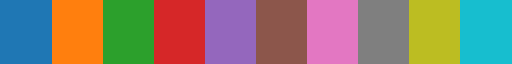

In [34]:
tab10_cmap

In [35]:
tab10_cmap(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [36]:
pct_activated = pd.DataFrame(index = ['Activated', 'Unactivated'])
pct_activated[['Activated', 'Proliferating']] = np.nan

activated_cells= activation_all[dataset]['Activation_Status']
prolif_cells = cc_all[dataset]['CC_Status']

for pheno in ['Activated', 'Unactivated']:
    print(pheno)
    # Pct of activated/cycling cells within phenotype
    ind_pheno = gating_act.loc[overlap, 'Activated']==pheno
    ind_pheno = ind_pheno[ind_pheno].index
    
    pct_act_pheno = (activated_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Activated'] = pct_act_pheno
    
    pct_prolif_pheno = (prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_pheno

pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')

Activated
Unactivated


In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (2.6, 3))
# sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
#                x = gating_act.loc[overlap, 'Activated'], scale = 'width',
#                order = ['Activated', 'Unactivated'],
#                color = tab10_cmap(0),
#                ax =ax)
# ax.set_xticklabels([gating_label, 'Other\n(Unactivated)'])
# ax.set_title('Activation Gating - %s' % dataset)
# ax.set_ylabel('Activation Score')
# ax.set_xlabel('')

# # plt.savefig(os.path.join(figdir, 'Violinplot.ActivationScorevsActivationGating.COMBAT.png'), bbox_inches="tight")
# # plt.savefig(os.path.join(figdir, 'Violinplot.ActivationScorevsActivationGating.COMBAT.pdf'), bbox_inches="tight")


In [37]:
bplot_col = '#484848'

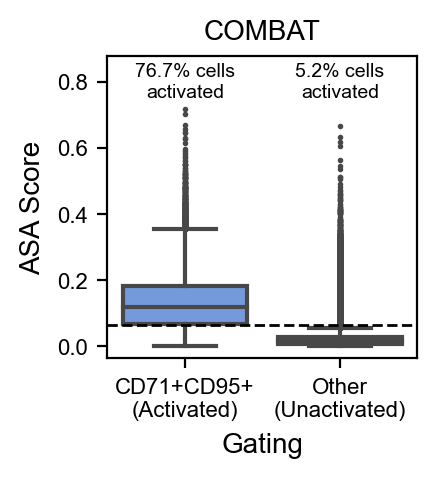

In [139]:
fig, ax = plt.subplots(dpi = 200, figsize = (2, 2))
sns.boxplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
               x = gating_act.loc[overlap, 'Activated'],# scale = 'width',
               order = ['Activated', 'Unactivated'],
               color = 'cornflowerblue',#tab10_cmap(0),
                flierprops=dict(marker='o', ms = 1, markeredgecolor = bplot_col),
               ax =ax,
           boxprops=dict(edgecolor=bplot_col), whiskerprops=dict(color=bplot_col), capprops=dict(color=bplot_col),
           medianprops=dict(color=bplot_col))

xlims = ax.get_xlim()
ylims = ax.get_ylim()

for n, pheno in enumerate(['Activated', 'Unactivated']):
    pct = pct_activated_df[(pct_activated_df['index']==pheno) & 
                       (pct_activated_df['variable']=='Activated')]['value'].values[0]
    ax.text(x = n, y = ylims[1], s = '%.1f%% cells\nactivated' % pct, horizontalalignment = 'center', fontsize = 7)

ax.hlines(y = activation_threshold, xmin = xlims[0], xmax = xlims[1], 
          linewidth = 1, linestyles = '--', colors = 'black')

ax.set_ylim(ylims[0], ylims[1]+0.125)
ax.tick_params('both', labelsize = tick_fontsize)
ax.set_xticklabels([gating_label, 'Other\n(Unactivated)'])
ax.set_title('%s' % dataset, fontsize = label_fontsize)
ax.set_ylabel('ASA Score', fontsize = label_fontsize)
ax.set_xlabel('Gating', fontsize = label_fontsize)

plt.savefig(os.path.join(figdir, 'Boxplot.ActivationScorevsActivationGating.COMBAT.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Boxplot.ActivationScorevsActivationGating.COMBAT.pdf'), bbox_inches="tight")


Text(0.5, 0, 'Gating')

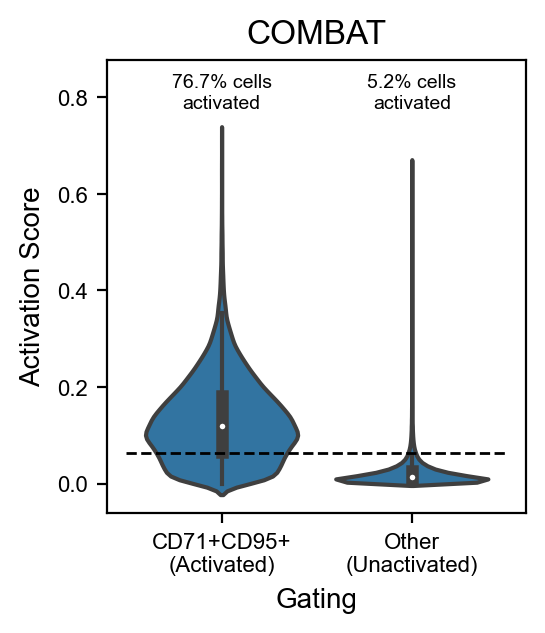

In [40]:
# fig, ax = plt.subplots(dpi = 200, figsize = (2.7, 3))
# sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
#                x = gating_act.loc[overlap, 'Activated'], scale = 'width',
#                order = ['Activated', 'Unactivated'],
#                color = tab10_cmap(0),
#                ax =ax)

# xlims = ax.get_xlim()
# ylims = ax.get_ylim()

# for n, pheno in enumerate(['Activated', 'Unactivated']):
#     pct = pct_activated_df[(pct_activated_df['index']==pheno) & 
#                        (pct_activated_df['variable']=='Activated')]['value'].values[0]
#     ax.text(x = n, y = ylims[1], s = '%.1f%% cells\nactivated' % pct, horizontalalignment = 'center', fontsize = 7)

# ax.hlines(y = activation_threshold, xmin = xlims[0], xmax = xlims[1], 
#           linewidth = 1, linestyles = '--', colors = 'black')

# ax.set_ylim(ylims[0], ylims[1]+0.1)
# ax.tick_params('both', labelsize = tick_fontsize)
# ax.set_xticklabels([gating_label, 'Other\n(Unactivated)'])
# ax.set_title('%s' % dataset)
# ax.set_ylabel('Activation Score', fontsize = label_fontsize)
# ax.set_xlabel('Gating', fontsize = label_fontsize)

# # plt.savefig(os.path.join(figdir, 'Violinplot.ActivationScorevsActivationGating.COMBAT.png'), bbox_inches="tight")
# # plt.savefig(os.path.join(figdir, 'Violinplot.ActivationScorevsActivationGating.COMBAT.pdf'), bbox_inches="tight")


Text(0.5, 1.0, 'Marker Gating - COMBAT')

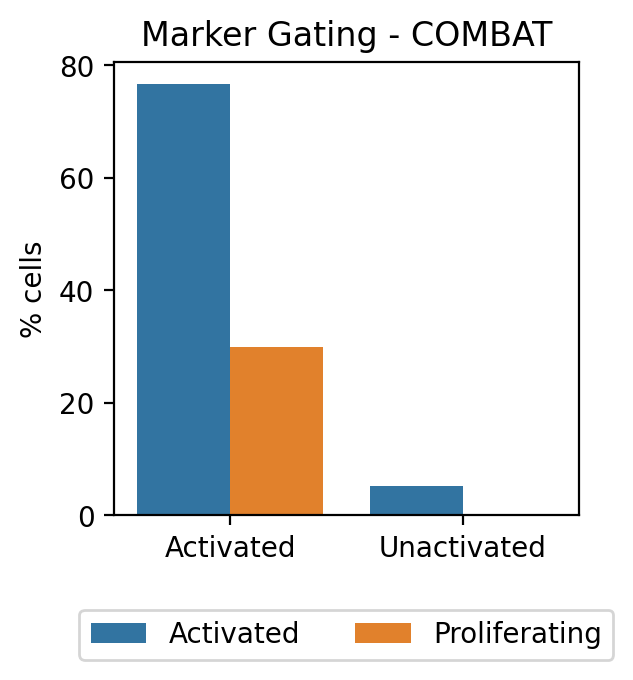

In [39]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
# grouped barplot
sns.barplot(x = 'index', y = 'value', 
       hue = 'variable',# hue_order = [True, False], order =pheno_order,
           data = pct_activated_df)

ax.set_ylabel('% cells')
ax.set_xlabel('')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), 
          title = '', ncol = 2)
ax.set_title('Marker Gating - %s' % dataset)

In [ ]:
test_thresholds

In [38]:
auc = roc_auc_score(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])
fpr, tpr, thresholds = roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])
print(auc)

# Predict FPR/TPR for each threshold assignment
fpr_pred = {}
tpr_pred = {}

for test_threshold in test_thresholds:
    (fpr_pred[test_threshold], 
     tpr_pred[test_threshold], _) = metrics.roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                                                      activation_all[dataset].loc[overlap, 'Activation_Score'] > test_threshold, 
                                                      pos_label = True) 


0.9196854525933795


In [39]:
activation_threshold

0.0625

In [40]:
tab10_cmap = cm.get_cmap('tab10')


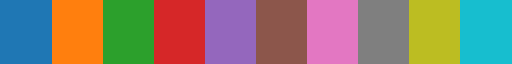

In [162]:
tab10_cmap

In [41]:
from matplotlib.colors import ListedColormap

len(test_thresholds)

8

In [42]:
thresh_cmap_cont = cm.get_cmap('Purples')
thresh_cmap = ListedColormap(thresh_cmap_cont(np.linspace(0, 1, len(test_thresholds))))


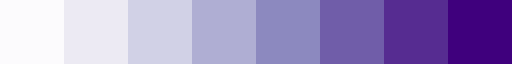

In [240]:
thresh_cmap

In [44]:
tick_fontsize

8

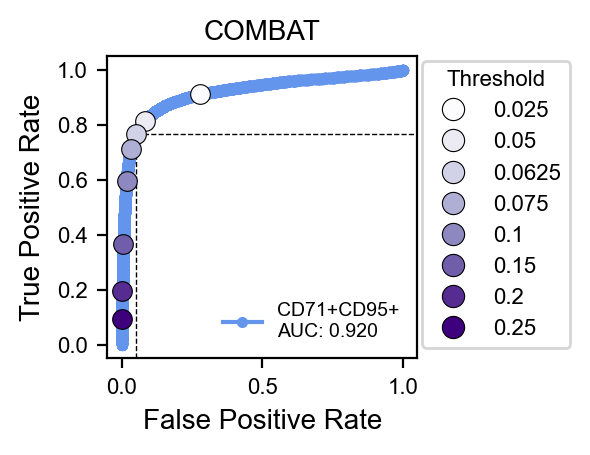

In [61]:
fig, ax = plt.subplots(dpi = 200, figsize = (2, 2))
plt.xlabel('False Positive Rate', fontsize = label_fontsize)
plt.ylabel('True Positive Rate', fontsize = label_fontsize)

plt.plot(fpr, tpr, marker='.', color = 'cornflowerblue', zorder = 3, 
         label = '%s\nAUC: %.3f' % (gating_label.replace('\n(Activated)', ''), auc))

xlims = ax.get_xlim()
ylims = ax.get_ylim()

for j, test_threshold in enumerate(test_thresholds):
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               color = thresh_cmap(j),
               zorder = 5, #label = test_threshold
              )
    if test_threshold == activation_threshold:
        ax.hlines(y = tpr_pred[test_threshold][1], 
                  xmin = fpr_pred[test_threshold][1], xmax = xlims[1], linestyle ='dashed', color = 'black', 
                  linewidth =.5, zorder = 4
                 )
        ax.vlines(x = fpr_pred[test_threshold][1], 
                  ymin = ylims[0], ymax = tpr_pred[test_threshold][1], linestyle ='dashed', color = 'black',
                 linewidth = .5, zorder = 4
                 )
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.tick_params('both', labelsize = tick_fontsize)

auc_legend = ax.legend(fontsize = 7,
                        frameon=False)

handles = []
handles += [plt.plot([],[], color=thresh_cmap(j), 
                     marker="o", 
                     ms=8, ls="",
                    mew = 0.4, mec = 'black')[0] for (j, test_threshold) in enumerate(test_thresholds)]

threshold_legend = plt.legend(handles = handles,
                              labels = test_thresholds, fontsize = tick_fontsize, title_fontsize = tick_fontsize,
                              title = 'Threshold',loc = 'right',
                              bbox_to_anchor=(1.31, .46, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
                              ncol = 1)
ax.add_artist(auc_legend)
plt.title('%s' % dataset, fontsize = label_fontsize)
plt.savefig(os.path.join(figdir, 'COMBAT.ROCCurve.Activation.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'COMBAT.ROCCurve.Activation.pdf'), bbox_inches="tight")

plt.show()

## Sparks

In [62]:
dataset = 'Sparks'
gating_act = gating_act_all[dataset]
overlap = set(gating_act.index).intersection(activation_all[dataset].index)


Text(0.5, 0, '')

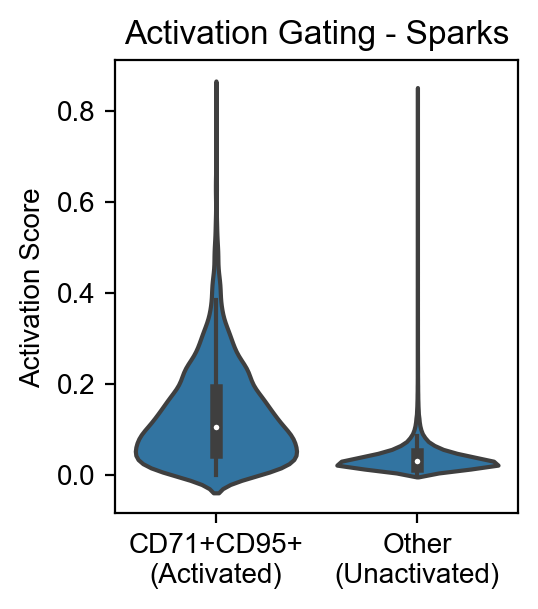

In [255]:
fig, ax = plt.subplots(dpi = 200, figsize = (2.6, 3))
sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
               x = gating_act.loc[overlap, 'Activated'], scale = 'width',
               order = ['Activated', 'Unactivated'],
               color = tab10_cmap(0),
               ax =ax)
ax.set_xticklabels([gating_label, 'Other\n(Unactivated)'])
ax.set_title('Activation Gating - %s' % dataset)
ax.set_ylabel('Activation Score')
ax.set_xlabel('')


Text(0, 0.5, 'Activation Score')

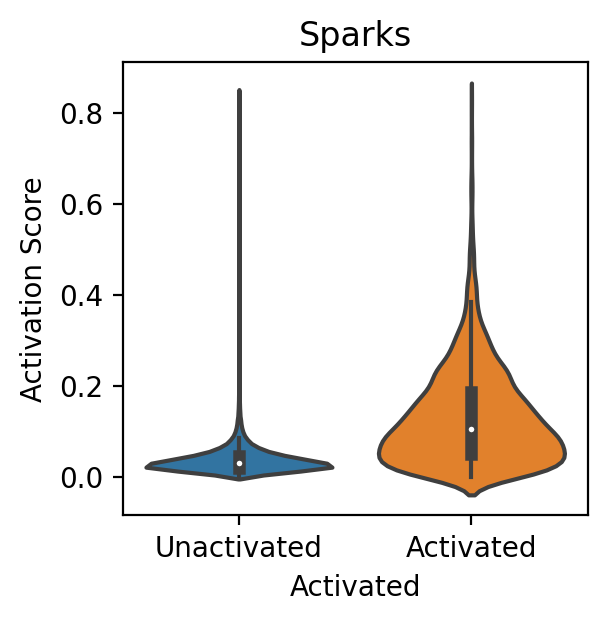

In [46]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
               x = gating_act.loc[overlap, 'Activated'], scale = 'width',
               ax =ax)
ax.set_title(dataset)
ax.set_ylabel('Activation Score')

In [256]:
pct_activated = pd.DataFrame(index = ['Activated', 'Unactivated'])
pct_activated[['Activated', 'Proliferating']] = np.nan

activated_cells= activation_all[dataset]['Activation_Status']
prolif_cells = cc_all[dataset]['CC_Status']

for pheno in ['Activated', 'Unactivated']:
    print(pheno)
    # Pct of activated/cycling cells within phenotype
    ind_pheno = gating_act.loc[overlap, 'Activated']==pheno
    ind_pheno = ind_pheno[ind_pheno].index
    
    pct_act_pheno = (activated_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Activated'] = pct_act_pheno
    
    pct_prolif_pheno = (prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_pheno

pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')

Activated
Unactivated


Text(0.5, 1.0, 'Marker Gating - Sparks')

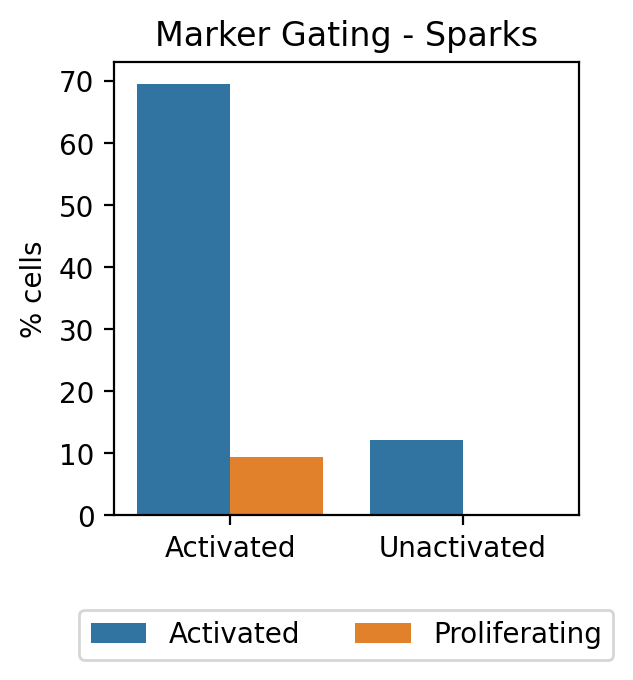

In [48]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
# grouped barplot
sns.barplot(x = 'index', y = 'value', 
       hue = 'variable',# hue_order = [True, False], order =pheno_order,
           data = pct_activated_df)

ax.set_ylabel('% cells')
ax.set_xlabel('')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), 
          title = '', ncol = 2)
ax.set_title('Marker Gating - %s' % dataset)

In [ ]:
test_thresholds

In [63]:
auc = roc_auc_score(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])
fpr, tpr, thresholds = roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])

print(auc)

# Predict FPR/TPR for each threshold assignment
fpr_pred = {}
tpr_pred = {}

for test_threshold in test_thresholds:
    (fpr_pred[test_threshold], 
     tpr_pred[test_threshold], _) = metrics.roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                                                      activation_all[dataset].loc[overlap, 'Activation_Score'] > test_threshold, 
                                                      pos_label = True) 


0.817509978448348


In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
# plt.plot(fpr, tpr, marker='.', color = 'cornflowerblue')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.text(.65, 0, 'AUC: %.3f' % auc)
# # ax.scatter(x = fpr_pred[1], y = tpr_pred[1], color = 'black', zorder = 3)

# for test_threshold in test_thresholds:
#     ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
#                s = 50,
#                linewidths = .4,
#                edgecolors = 'black',
#                # color = 'black', 
#                zorder = 3, label = test_threshold)
#     if test_threshold == activation_threshold:
#         ax.hlines(y = tpr_pred[test_threshold][1], 
#                   xmin = fpr_pred[test_threshold][1], xmax = 1, linestyle ='dashed', color = 'black', 
#                   linewidth =.5,# zorder = 6
#                  )
#         ax.vlines(x = fpr_pred[test_threshold][1], 
#                   ymin = 0, ymax = tpr_pred[test_threshold][1], linestyle ='dashed', color = 'black',
#                  linewidth = .5,# zorder = 6
#                  )

# # plt.legend()
# # plt.suptitle(gate_type)
# plt.title('Activation Gating - %s' % dataset)
# plt.legend(title = 'Threshold',loc = 'right',
#     bbox_to_anchor=(1.26, .45, #0.9125,
#                           0, 0.1), bbox_transform=plt.gcf().transFigure, 
#            ncol = 1)
# # plt.savefig(os.path.join(figdir, 'Sparks.ROCCurve.Activation.png'), bbox_inches="tight")
# # plt.savefig(os.path.join(figdir, 'Sparks.ROCCurve.Activation.pdf'), bbox_inches="tight")
# plt.show()


In [65]:
dataset_label = 'Flu-Vaccine'

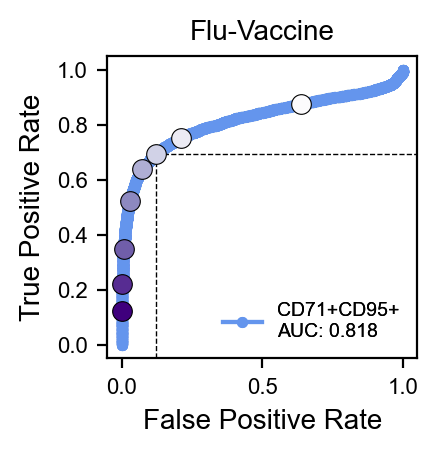

In [67]:
fig, ax = plt.subplots(dpi = 200, figsize = (2, 2))
plt.xlabel('False Positive Rate', fontsize = label_fontsize)
plt.ylabel('True Positive Rate', fontsize = label_fontsize)

plt.plot(fpr, tpr, marker='.', color = 'cornflowerblue', zorder = 3, 
         label = '%s\nAUC: %.3f' % (gating_label.replace('\n(Activated)', ''), auc))

xlims = ax.get_xlim()
ylims = ax.get_ylim()

for j, test_threshold in enumerate(test_thresholds):
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               color = thresh_cmap(j),
               zorder = 5, #label = test_threshold
              )
    if test_threshold == activation_threshold:
        ax.hlines(y = tpr_pred[test_threshold][1], 
                  xmin = fpr_pred[test_threshold][1], xmax = xlims[1], linestyle ='dashed', color = 'black', 
                  linewidth =.5, zorder = 4
                 )
        ax.vlines(x = fpr_pred[test_threshold][1], 
                  ymin = ylims[0], ymax = tpr_pred[test_threshold][1], linestyle ='dashed', color = 'black',
                 linewidth = .5, zorder = 4
                 )
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.tick_params('both', labelsize = tick_fontsize)

auc_legend = ax.legend(fontsize = 7,
                        frameon=False, loc = 'lower right')

handles = []
handles += [plt.plot([],[], color=thresh_cmap(j), 
                     marker="o", 
                     ms=8, ls="",
                    mew = 0.4, mec = 'black')[0] for (j, test_threshold) in enumerate(test_thresholds)]

# threshold_legend = plt.legend(handles = handles,
#                               labels = test_thresholds,
#                               title = 'Threshold',loc = 'right',
#                               bbox_to_anchor=(1.26, .45, #0.9125,
#                           0, 0.1), bbox_transform=plt.gcf().transFigure, 
#                               ncol = 1)
ax.add_artist(auc_legend)
plt.title('%s' % dataset_label, fontsize = label_fontsize)
plt.savefig(os.path.join(figdir, 'Sparks.ROCCurve.Activation.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Sparks.ROCCurve.Activation.pdf'), bbox_inches="tight")

plt.show()

## Stimseq

In [93]:
dataset = 'Stimseq'
meta = meta_all[dataset]

In [94]:
gating_act = gating_act_all[dataset]
overlap = set(gating_act.index).intersection(activation_all[dataset].index)

In [95]:
pal = [sns.color_palette('colorblind')[3], sns.color_palette('colorblind')[2], sns.color_palette('colorblind')[1]]


In [96]:
activation_score = activation_all[dataset]['Activation_Score']

Text(0.5, 1.0, 'AIM-Seq')

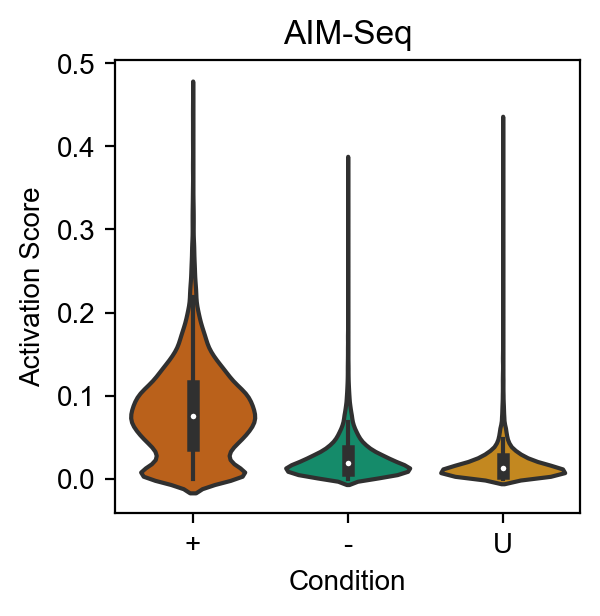

In [60]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
sns.violinplot(y = activation_all[dataset].loc[meta.index, 'Activation_Score'], 
               x = meta['Sort_Status'], scale = 'width', palette = pal,
               ax =ax)
ax.set_title(dataset)
ax.set_ylabel('Activation Score')
ax.set_xlabel('Condition')
ax.set_title('AIM-Seq')

# plt.savefig(os.path.join(figdir, 'Violinplot.ActivationScorevsCondition.StimSeq.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'Violinplot.ActivationScorevsCondition.StimSeq.pdf'), bbox_inches="tight")


In [60]:
sorted(meta['Sort_Status'].unique())

['+', '-', 'U']

In [72]:
meta = meta_all[dataset]
pheno_col = 'Sort_Status'
pheno_order = ['+', '-', 'U']
ind = meta[pheno_col].isin(pheno_order)

In [73]:
from scipy.stats import ranksums

In [74]:
ind_pheno = meta[meta[pheno_col]=='+'].index
a = activation_score[ind_pheno]

In [75]:
ind_pheno = meta[meta[pheno_col]=='-'].index
b = activation_score[ind_pheno]

In [217]:
ranksums(a, b)

RanksumsResult(statistic=90.66032614612278, pvalue=0.0)

In [ ]:
meta[pheno_col].value_counts()

In [ ]:
ind.value_counts()

In [218]:
pct_activated = pd.DataFrame(index = pheno_order)
pct_activated[['Activated', 'Proliferating']] = np.nan

activated_cells= activation_all[dataset]['Activation_Status']
prolif_cells = cc_all[dataset]['CC_Status']

for pheno in pheno_order:
    print(pheno)
    # Pct of activated/cycling cells within phenotype
    ind_pheno = meta[pheno_col]==pheno
    ind_pheno = ind_pheno[ind_pheno].index
    
    pct_act_pheno = (activated_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Activated'] = pct_act_pheno
    
    pct_prolif_pheno = (prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_pheno

pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')

+
-
U


In [219]:
pct_activated_df

index       variable      value
0     +      Activated  60.649792
1     -      Activated   6.974498
2     U      Activated   3.243654
3     +  Proliferating   4.933887
4     -  Proliferating   0.109480
5     U  Proliferating   0.117574

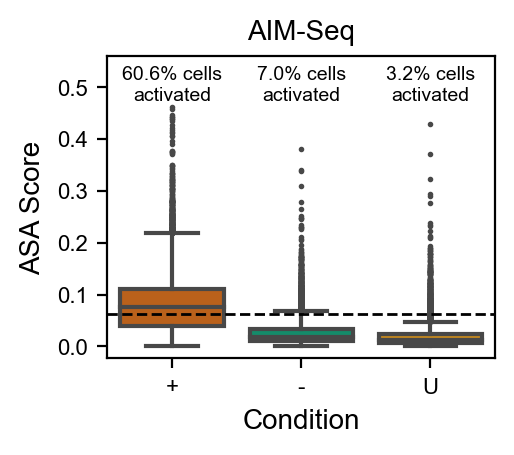

In [134]:
fig, ax = plt.subplots(dpi = 200, figsize = (2.5, 2))
sns.boxplot(y = activation_all[dataset].loc[meta.index, 'Activation_Score'], 
               x = meta['Sort_Status'], #scale = 'width',
               palette = pal,flierprops=dict(marker='o', ms = 1, markeredgecolor = bplot_col),
               ax =ax,
           boxprops=dict(edgecolor=bplot_col), whiskerprops=dict(color=bplot_col), capprops=dict(color=bplot_col),
           medianprops=dict(color=bplot_col))

xlims = ax.get_xlim()
ylims = ax.get_ylim()

for n, pheno in enumerate(pheno_order):
    pct = pct_activated_df[(pct_activated_df['index']==pheno) & 
                       (pct_activated_df['variable']=='Activated')]['value'].values[0]
    ax.text(x = n, y = ylims[1]-0.01, s = '%.1f%% cells\nactivated' % pct, horizontalalignment = 'center', fontsize = 7)

ax.hlines(y = activation_threshold, xmin = xlims[0], xmax = xlims[1], 
          linewidth = 1, linestyles = '--', colors = 'black')

ax.set_ylim(ylims[0], ylims[1]+.075)
ax.tick_params('both', labelsize = tick_fontsize)

# ax.set_xticklabels([gating_label, 'Other\n(Unactivated)'])
ax.set_ylabel('ASA Score', fontsize = label_fontsize)
ax.set_xlabel('Condition', fontsize = label_fontsize)
ax.set_title('AIM-Seq', fontsize = label_fontsize)

plt.savefig(os.path.join(figdir, 'Boxplot.ActivationScorevsCondition.StimSeq.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Boxplot.ActivationScorevsCondition.StimSeq.pdf'), bbox_inches="tight")


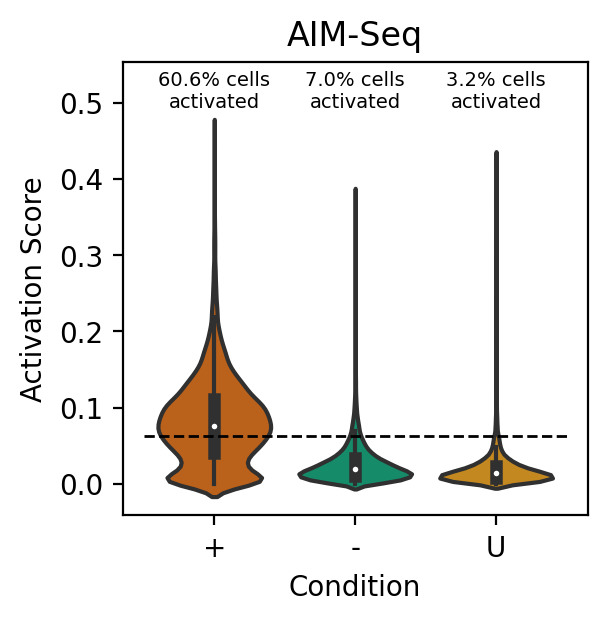

In [69]:
# fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
# sns.violinplot(y = activation_all[dataset].loc[meta.index, 'Activation_Score'], 
#                x = meta['Sort_Status'], scale = 'width',
#                palette = pal,
#                ax =ax)

# xlims = ax.get_xlim()
# ylims = ax.get_ylim()

# for n, pheno in enumerate(pheno_order):
#     pct = pct_activated_df[(pct_activated_df['index']==pheno) & 
#                        (pct_activated_df['variable']=='Activated')]['value'].values[0]
#     ax.text(x = n, y = ylims[1]-0.01, s = '%.1f%% cells\nactivated' % pct, horizontalalignment = 'center', fontsize = 7)

# ax.hlines(y = activation_threshold, xmin = xlims[0], xmax = xlims[1], 
#           linewidth = 1, linestyles = '--', colors = 'black')

# ax.set_ylim(ylims[0], ylims[1]+.05)

# # ax.set_xticklabels([gating_label, 'Other\n(Unactivated)'])
# ax.set_ylabel('Activation Score')
# ax.set_xlabel('Condition')
# ax.set_title('AIM-Seq')

# # plt.savefig(os.path.join(figdir, 'Violinplot.ActivationScorevsCondition.StimSeq.png'), bbox_inches="tight")
# # plt.savefig(os.path.join(figdir, 'Violinplot.ActivationScorevsCondition.StimSeq.pdf'), bbox_inches="tight")


In [ ]:
pheno

In [ ]:
pct_activated = pd.DataFrame(index = ['Activated', 'Unactivated'])
pct_activated[['Activated', 'Proliferating']] = np.nan

activated_cells= activation_all[dataset]['Activation_Status']
prolif_cells = cc_all[dataset]['CC_Status']

for value, pheno in zip([True, False], ['Activated', 'Unactivated']):
    print(pheno)
    # Pct of activated/cycling cells within phenotype
    ind_pheno = gating_act.loc[overlap, 'Activated']==value
    ind_pheno = ind_pheno[ind_pheno].index
    
    pct_act_pheno = (activated_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Activated'] = pct_act_pheno
    
    pct_prolif_pheno = (prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_pheno

pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')

In [ ]:
pct_activated

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (2.6, 3))
sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
               x = gating_act.loc[overlap, 'Activated'], scale = 'width',
               order = [True, False],
               color = tab10_cmap(0),
               ax =ax)
ax.set_xticklabels(['ADT Cluster', 'Other\n(Unactivated)'])
ax.set_title('Activation Gating - %s' % dataset)
ax.set_ylabel('Activation Score')
ax.set_xlabel('')


In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
               x = gating_act.loc[overlap, 'Activated'], scale = 'width', 
               ax =ax)
ax.set_title(dataset)
ax.set_ylabel('Activation Score')

In [ ]:
meta[pheno_col].value_counts()

In [ ]:
ind.value_counts()

In [ ]:
pct_activated = pd.DataFrame(index = pheno_order)
pct_activated[['Activated', 'Proliferating']] = np.nan

activated_cells= activation_all[dataset]['Activation_Status']
prolif_cells = cc_all[dataset]['CC_Status']

for pheno in pheno_order:
    print(pheno)
    # Pct of activated/cycling cells within phenotype
    ind_pheno = meta[pheno_col]==pheno
    ind_pheno = ind_pheno[ind_pheno].index
    
    pct_act_pheno = (activated_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Activated'] = pct_act_pheno
    
    pct_prolif_pheno = (prolif_cells[ind_pheno].value_counts(normalize = True)*100)[True]
    pct_activated.loc[pheno, 'Proliferating'] = pct_prolif_pheno

pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
# grouped barplot
sns.barplot(x = 'index', y = 'value', 
       hue = 'variable',# hue_order = [True, False], order =pheno_order,
           data = pct_activated_df)

ax.set_ylabel('% cells')
ax.set_xlabel('')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35), 
          title = '', ncol = 2)
ax.set_title(dataset)

In [ ]:
test_thresholds

### AIM +/-

In [71]:
meta = meta_all[dataset]
pheno_col = 'Sort_Status'
pheno_order = ['+', '-']
ind = meta[pheno_col].isin(pheno_order)

In [80]:
ind.value_counts()

True     28763
False    14459
Name: Sort_Status, dtype: int64

In [81]:

auc = roc_auc_score(meta.loc[ind, pheno_col]=='+', 
                    activation_all[dataset].loc[ind, 'Activation_Score'])
fpr, tpr, thresholds = roc_curve(meta.loc[ind, pheno_col]=='+', 
                    activation_all[dataset].loc[ind, 'Activation_Score'])

print(auc)

# Predict FPR/TPR for each threshold assignment
fpr_pred = {}
tpr_pred = {}

for test_threshold in test_thresholds:
    (fpr_pred[test_threshold], 
     tpr_pred[test_threshold], _) = metrics.roc_curve(meta.loc[ind, pheno_col]=='+', 
                                                      activation_all[dataset].loc[ind, 'Activation_Score'] > test_threshold, 
                                                      pos_label = True) 


0.8096218206646507


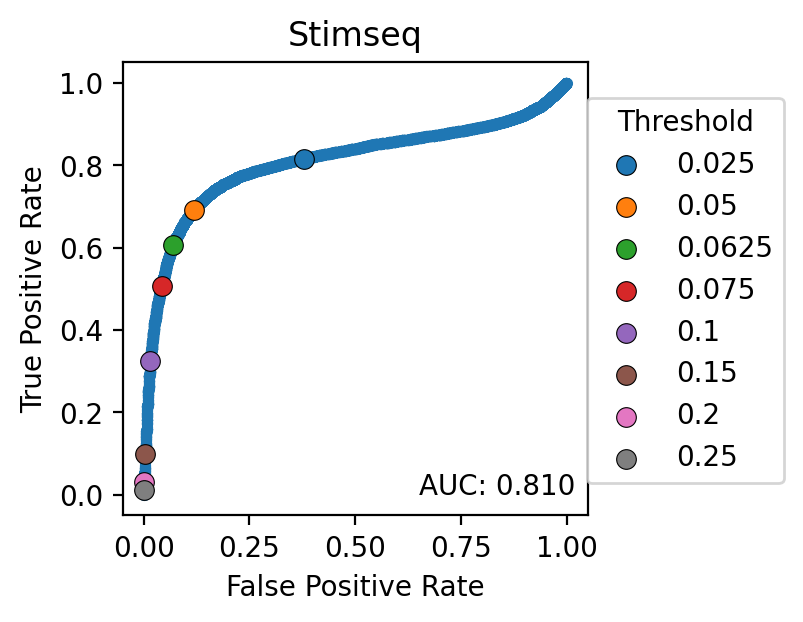

In [82]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(.65, 0, 'AUC: %.3f' % auc)
# ax.scatter(x = fpr_pred[1], y = tpr_pred[1], color = 'black', zorder = 3)

for test_threshold in test_thresholds:
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               # color = 'black', 
               zorder = 3, label = test_threshold)

# plt.legend()
# plt.suptitle(gate_type)
plt.title('%s' % dataset)
plt.legend(title = 'Threshold',loc = 'right',
    bbox_to_anchor=(1.25, .45, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
           ncol = 1)
plt.show()

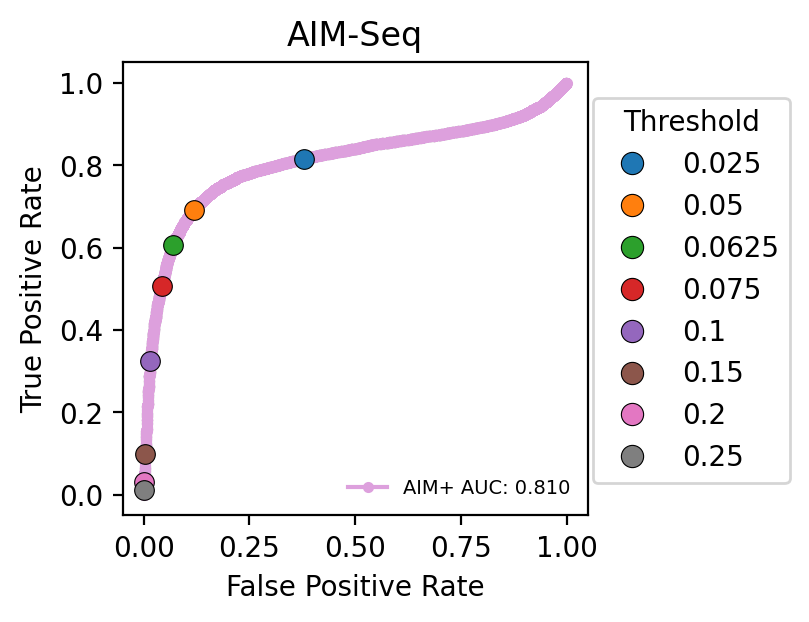

In [83]:
# Add manual gating curve

fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# AIM+
plt.plot(fpr, tpr, marker='.', color = 'plum', zorder = 3, label = 'AIM+ AUC: %.3f' % auc)
for j, test_threshold in enumerate(test_thresholds):
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               color = tab10_cmap(j),
               zorder = 5, #label = test_threshold
              )

xlims = ax.get_xlim()
ylims = ax.get_ylim()



ax.set_xlim(xlims)
ax.set_ylim(ylims)

auc_legend = ax.legend(fontsize = 7,
                        frameon=False, loc = 'lower right')

handles = []
handles += [plt.plot([],[], color=tab10_cmap(j), 
                     marker="o", 
                     ms=8, ls="",
                    mew = 0.4, mec = 'black')[0] for (j, test_threshold) in enumerate(test_thresholds)]

threshold_legend = plt.legend(handles = handles,
                              labels = test_thresholds,
                              title = 'Threshold',loc = 'right',
                              bbox_to_anchor=(1.26, .45, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
                              ncol = 1)
ax.add_artist(auc_legend)
plt.title('%s' % 'AIM-Seq')
# plt.savefig(os.path.join(figdir, 'Stimseq.ROCCurve.Activation.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'Stimseq.ROCCurve.Activation.pdf'), bbox_inches="tight")

plt.show()

### AIM +/[-,U]

In [90]:
ind = meta.index

In [91]:

auc = roc_auc_score(meta.loc[ind, pheno_col]=='+', 
                    activation_all[dataset].loc[ind, 'Activation_Score'])
fpr, tpr, thresholds = roc_curve(meta.loc[ind, pheno_col]=='+', 
                    activation_all[dataset].loc[ind, 'Activation_Score'])

print(auc)

# Predict FPR/TPR for each threshold assignment
fpr_pred = {}
tpr_pred = {}

for test_threshold in test_thresholds:
    (fpr_pred[test_threshold], 
     tpr_pred[test_threshold], _) = metrics.roc_curve(meta.loc[ind, pheno_col]=='+', 
                                                      activation_all[dataset].loc[ind, 'Activation_Score'] > test_threshold, 
                                                      pos_label = True) 


0.8278267944569206


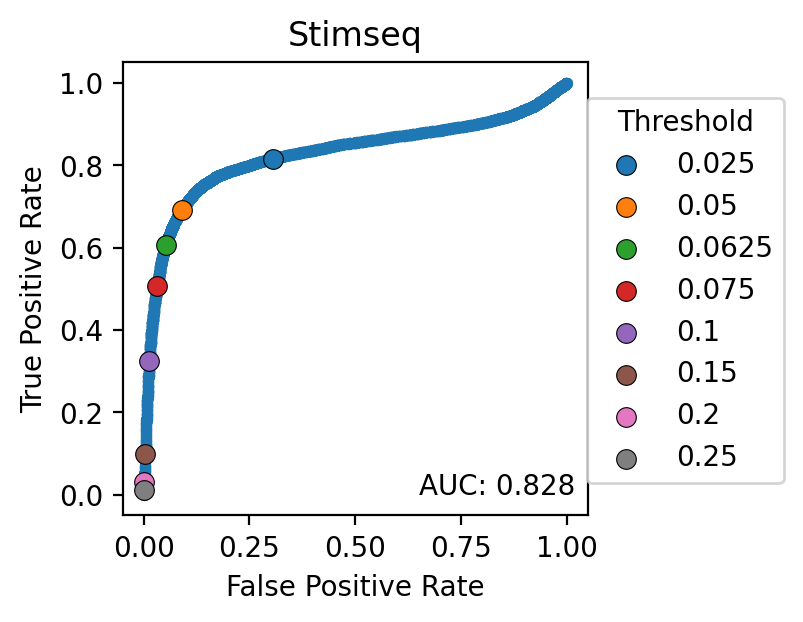

In [92]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(.65, 0, 'AUC: %.3f' % auc)
# ax.scatter(x = fpr_pred[1], y = tpr_pred[1], color = 'black', zorder = 3)

for test_threshold in test_thresholds:
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               # color = 'black', 
               zorder = 3, label = test_threshold)

# plt.legend()
# plt.suptitle(gate_type)
plt.title('%s' % dataset)
plt.legend(title = 'Threshold',loc = 'right',
    bbox_to_anchor=(1.25, .45, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
           ncol = 1)
plt.show()

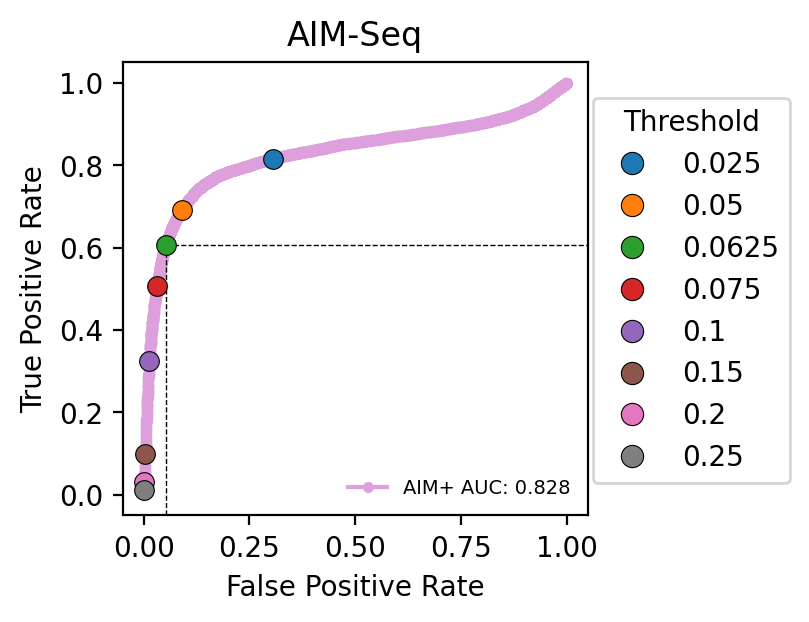

In [96]:
# Add manual gating curve

fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# AIM+
plt.plot(fpr, tpr, marker='.', color = 'plum', zorder = 3, label = 'AIM+ AUC: %.3f' % auc)

xlims = ax.get_xlim()
ylims = ax.get_ylim()

for j, test_threshold in enumerate(test_thresholds):
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               color = tab10_cmap(j),
               zorder = 5, #label = test_threshold
              )
    if test_threshold == activation_threshold:
        ax.hlines(y = tpr_pred[test_threshold][1], 
                  xmin = fpr_pred[test_threshold][1], xmax = xlims[1], linestyle ='dashed', color = 'black', 
                  linewidth =.5, zorder = 4
                 )
        ax.vlines(x = fpr_pred[test_threshold][1], 
                  ymin = ylims[0], ymax = tpr_pred[test_threshold][1], linestyle ='dashed', color = 'black',
                 linewidth = .5, zorder = 4
                 )



ax.set_xlim(xlims)
ax.set_ylim(ylims)

auc_legend = ax.legend(fontsize = 7,
                        frameon=False, loc = 'lower right')

handles = []
handles += [plt.plot([],[], color=tab10_cmap(j), 
                     marker="o", 
                     ms=8, ls="",
                    mew = 0.4, mec = 'black')[0] for (j, test_threshold) in enumerate(test_thresholds)]

threshold_legend = plt.legend(handles = handles,
                              labels = test_thresholds,
                              title = 'Threshold',loc = 'right',
                              bbox_to_anchor=(1.26, .45, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
                              ncol = 1)
ax.add_artist(auc_legend)
plt.title('%s' % 'AIM-Seq')
# plt.savefig(os.path.join(figdir, 'Stimseq.ROCCurve.Activation.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'Stimseq.ROCCurve.Activation.pdf'), bbox_inches="tight")

plt.show()

#### CD4 Conv vs CD4 Treg vs CD8 Conv

In [106]:
lineage_classes = ['CD4 Conv', 'CD4 Treg', 'CD8 Conv', 'Other']

In [107]:
ind = meta.index
overlap = ind

In [108]:
auc = {}
fpr = {}
tpr = {}
thresholds = {}

fpr_pred = {}
tpr_pred = {}


In [109]:
lineage_classes

['CD4 Conv', 'CD4 Treg', 'CD8 Conv', 'Other']

In [110]:
for lineage in lineage_classes + ['All']:
    
    # Pct of activated/cycling cells within phenotype
    if lineage == 'All':
        overlap_lineage = overlap
    else:
        overlap_lineage = gating_class[overlap][gating_class[overlap]==lineage].index

    auc[lineage] = roc_auc_score(meta.loc[overlap_lineage, pheno_col]=='+', 
                        activation_all[dataset].loc[overlap_lineage, 'Activation_Score'])
    fpr[lineage], tpr[lineage], thresholds[lineage] = roc_curve(meta.loc[overlap_lineage, pheno_col]=='+', 
                        activation_all[dataset].loc[overlap_lineage, 'Activation_Score'])

    print(auc)

    # Predict FPR/TPR for each threshold assignment
    fpr_pred[lineage] = {}
    tpr_pred[lineage] = {}

    for test_threshold in test_thresholds:
        (fpr_pred[lineage][test_threshold], 
         tpr_pred[lineage][test_threshold], _) = metrics.roc_curve(meta.loc[overlap_lineage, pheno_col]=='+', 
                                                          activation_all[dataset].loc[overlap_lineage, 'Activation_Score'] > test_threshold, 
                                                          pos_label = True) 


{'CD4 Conv': 0.8505296627112843}
{'CD4 Conv': 0.8505296627112843, 'CD4 Treg': 0.7770317483068765}
{'CD4 Conv': 0.8505296627112843, 'CD4 Treg': 0.7770317483068765, 'CD8 Conv': 0.7274267180274046}
{'CD4 Conv': 0.8505296627112843, 'CD4 Treg': 0.7770317483068765, 'CD8 Conv': 0.7274267180274046, 'Other': 0.8105799810163123}
{'CD4 Conv': 0.8505296627112843, 'CD4 Treg': 0.7770317483068765, 'CD8 Conv': 0.7274267180274046, 'Other': 0.8105799810163123, 'All': 0.8278267944569206}


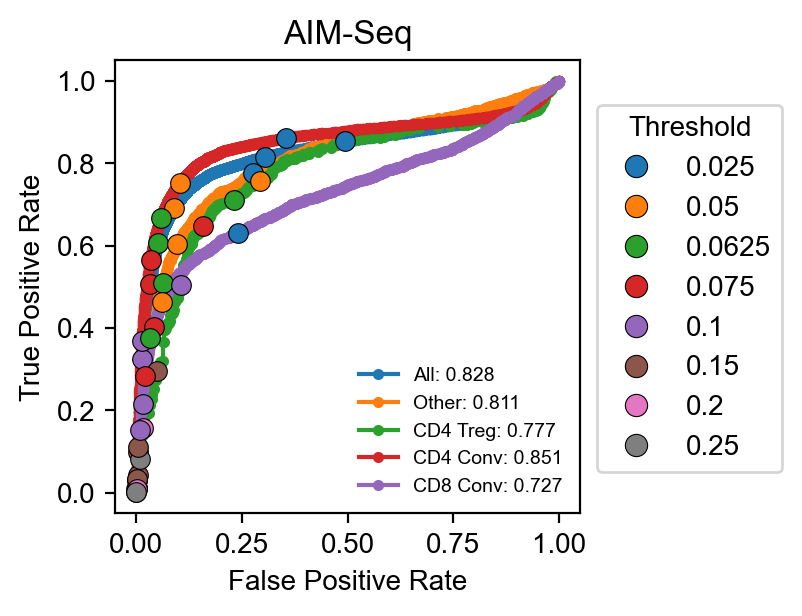

In [111]:
# Add manual gating curve

fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for lineage in ['All', 'Other', 'CD4 Treg', 'CD4 Conv', 'CD8 Conv']:

    plt.plot(fpr[lineage], tpr[lineage], marker='.', zorder = 3, label = '%s: %.3f' % (lineage, auc[lineage]))
    for j, test_threshold in enumerate(test_thresholds):
        ax.scatter(x = fpr_pred[lineage][test_threshold][1], y = tpr_pred[lineage][test_threshold][1],
                   s = 50,
                   linewidths = .4,
                   edgecolors = 'black',
                   color = tab10_cmap(j),
                   zorder = 4,
                   #label = test_threshold
                  )

auc_legend = ax.legend(fontsize = 7,
                        frameon=False)

handles = []
handles += [plt.plot([],[], color=tab10_cmap(j), 
                     marker="o", 
                     ms=8, ls="",
                    mew = 0.4, mec = 'black')[0] for (j, test_threshold) in enumerate(test_thresholds)]

threshold_legend = plt.legend(handles = handles,
                              labels = test_thresholds,
                              title = 'Threshold',loc = 'right',
                              bbox_to_anchor=(1.26, .45, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
                              ncol = 1)
ax.add_artist(auc_legend)
plt.title('%s' % 'AIM-Seq')
plt.show()

In [121]:
fpr_pred[lineage][test_threshold][1]

0.0001783007934385308

In [122]:
tpr_pred[lineage][test_threshold][1]

0.0027434842249657062

In [165]:
lineage_classes 

['CD4 Conv', 'CD4 Treg', 'CD8 Conv', 'Other']

In [81]:
lineage_colors = dict(zip(lineage_classes, 
                         ['lightcoral', 'gold', 'mediumaquamarine', 'mediumpurple']))

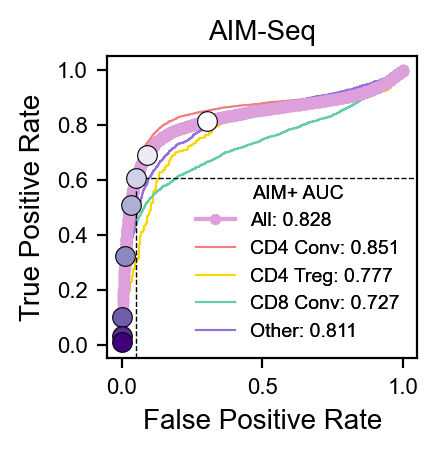

In [113]:
# Add manual gating curve

fig, ax = plt.subplots(dpi = 200, figsize = (2, 2))
plt.xlabel('False Positive Rate', fontsize = label_fontsize)
plt.ylabel('True Positive Rate', fontsize = label_fontsize)

# AIM+
for lineage in ['All', 'CD4 Conv', 'CD4 Treg',  'CD8 Conv', 'Other']:
    
    if lineage=='All':
        plt.plot(fpr[lineage], tpr[lineage], marker='.', 
                 zorder = 4, color = 'plum', label = '%s: %.3f' % (lineage, auc[lineage]))
        xlims = ax.get_xlim()
        ylims = ax.get_ylim()

    
        for j, test_threshold in enumerate(test_thresholds):

            ax.scatter(x = fpr_pred[lineage][test_threshold][1], y = tpr_pred[lineage][test_threshold][1],
                       s = 50,
                       linewidths = .4,
                       edgecolors = 'black',
                       color = thresh_cmap(j),
                       zorder = 5,
                       #label = test_threshold
                      )
            if test_threshold == activation_threshold:
                ax.hlines(y = tpr_pred[lineage][test_threshold][1], 
                          xmin = fpr_pred[lineage][test_threshold][1], xmax = xlims[1], linestyle ='dashed', color = 'black', 
                          linewidth =.5, zorder = 4
                         )
                ax.vlines(x = fpr_pred[lineage][test_threshold][1], 
                          ymin = ylims[0], ymax = tpr_pred[lineage][test_threshold][1], linestyle ='dashed', color = 'black',
                         linewidth = .5, zorder = 4
                         )
    else:
        plt.plot(fpr[lineage], tpr[lineage], marker='.', 
                 zorder = 3, label = '%s: %.3f' % (lineage, auc[lineage]), color = lineage_colors[lineage],
                lw = .75, ms = 0, #ls = 'dotted'
                )


ax.tick_params('both', labelsize = tick_fontsize)

ax.set_xlim(xlims)
ax.set_ylim(ylims)

auc_legend = ax.legend(fontsize = 7,
                        frameon=False, loc = 'lower right', title = 'AIM+ AUC', title_fontsize = 7)

handles = []
handles += [plt.plot([],[], color=thresh_cmap(j), 
                     marker="o", 
                     ms=8, ls="",
                    mew = 0.4, mec = 'black')[0] for (j, test_threshold) in enumerate(test_thresholds)]

# threshold_legend = plt.legend(handles = handles,
#                               labels = test_thresholds,
#                               title = 'Threshold',loc = 'right',
#                               bbox_to_anchor=(1.26, .45, #0.9125,
#                           0, 0.1), bbox_transform=plt.gcf().transFigure, 
#                               ncol = 1)
ax.add_artist(auc_legend)
plt.title('%s' % 'AIM-Seq', fontsize = label_fontsize)
plt.savefig(os.path.join(figdir, 'Stimseq.ROCCurve.Activation.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Stimseq.ROCCurve.Activation.pdf'), bbox_inches="tight")

plt.show()

## UK-Covid

In [ ]:
dataset = 'UK-Covid'
gating_act = gating_act_all[dataset]
overlap = set(gating_act.index).intersection(activation_all[dataset].index)


In [ ]:

fig, ax = plt.subplots(dpi = 200)
sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
               x = gating_act.loc[overlap, 'Activated'], scale = 'width',
               ax =ax)
ax.set_title(dataset)

In [ ]:
test_thresholds

In [ ]:
auc = roc_auc_score(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])
fpr, tpr, thresholds = roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])

print(auc)

# Predict FPR/TPR for each threshold assignment
fpr_pred = {}
tpr_pred = {}

for test_threshold in test_thresholds:
    (fpr_pred[test_threshold], 
     tpr_pred[test_threshold], _) = metrics.roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                                                      activation_all[dataset].loc[overlap, 'Activation_Score'] > test_threshold, 
                                                      pos_label = True) 


In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(.65, 0, 'AUC: %.3f' % auc)
# ax.scatter(x = fpr_pred[1], y = tpr_pred[1], color = 'black', zorder = 3)

for test_threshold in test_thresholds:
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               # color = 'black', 
               zorder = 3, label = test_threshold)

# plt.legend()
# plt.suptitle(gate_type)
plt.title('Marker Gating - %s' % dataset)
plt.legend(title = 'Threshold',loc = 'right',
    bbox_to_anchor=(1.25, .45, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
           ncol = 1)
plt.show()

## AMP-RA

In [ ]:
dataset = 'AMP-RA'
gating_act = gating_act_all[dataset]
overlap = set(gating_act.index).intersection(activation_all[dataset].index)


In [ ]:

fig, ax = plt.subplots(dpi = 200)
sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
               x = gating_act.loc[overlap, 'Activated'], scale = 'width',
               ax =ax)
ax.set_title(dataset)

In [ ]:
test_thresholds

In [ ]:
auc = roc_auc_score(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])
fpr, tpr, thresholds = roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])

print(auc)

# Predict FPR/TPR for each threshold assignment
fpr_pred = {}
tpr_pred = {}

for test_threshold in test_thresholds:
    (fpr_pred[test_threshold], 
     tpr_pred[test_threshold], _) = metrics.roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                                                      activation_all[dataset].loc[overlap, 'Activation_Score'] > test_threshold, 
                                                      pos_label = True) 


In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(.65, 0, 'AUC: %.3f' % auc)
# ax.scatter(x = fpr_pred[1], y = tpr_pred[1], color = 'black', zorder = 3)

for test_threshold in test_thresholds:
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               # color = 'black', 
               zorder = 3, label = test_threshold)

# plt.legend()
# plt.suptitle(gate_type)
plt.title('Marker Gating - %s' % dataset)
plt.legend(title = 'Threshold',loc = 'right',
    bbox_to_anchor=(1.25, .45, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
           ncol = 1)
plt.show()

## TBRU

In [ ]:
dataset = 'TBRU'
gating_act = gating_act_all[dataset]
overlap = set(gating_act.index).intersection(activation_all[dataset].index)


In [ ]:

fig, ax = plt.subplots(dpi = 200)
sns.violinplot(y = activation_all[dataset].loc[overlap, 'Activation_Score'], 
               x = gating_act.loc[overlap, 'Activated'], scale = 'width',
               ax =ax)
ax.set_title(dataset)

In [ ]:
test_thresholds

In [ ]:
auc = roc_auc_score(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])
fpr, tpr, thresholds = roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                    activation_all[dataset].loc[overlap, 'Activation_Score'])

print(auc)

# Predict FPR/TPR for each threshold assignment
fpr_pred = {}
tpr_pred = {}

for test_threshold in test_thresholds:
    (fpr_pred[test_threshold], 
     tpr_pred[test_threshold], _) = metrics.roc_curve(gating_act.loc[overlap, 'Activated']=='Activated', 
                                                      activation_all[dataset].loc[overlap, 'Activation_Score'] > test_threshold, 
                                                      pos_label = True) 


In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(.65, 0, 'AUC: %.3f' % auc)
# ax.scatter(x = fpr_pred[1], y = tpr_pred[1], color = 'black', zorder = 3)

for test_threshold in test_thresholds:
    ax.scatter(x = fpr_pred[test_threshold][1], y = tpr_pred[test_threshold][1],
               s = 50,
               linewidths = .4,
               edgecolors = 'black',
               # color = 'black', 
               zorder = 3, label = test_threshold)

# plt.legend()
# plt.suptitle(gate_type)
plt.title('Marker Gating - %s' % dataset)
plt.legend(title = 'Threshold',loc = 'right',
    bbox_to_anchor=(1.25, .45, #0.9125,
                          0, 0.1), bbox_transform=plt.gcf().transFigure, 
           ncol = 1)
plt.show()

# Per-dataset marker protein correlations

## Stimseq

In [239]:
dataset = 'Stimseq'

meta = meta_all[dataset]
activation = activation_all[dataset]

In [240]:
activation_score = activation['Activation_Score']

In [241]:
counts_fn = params.loc[dataset, 'raw_counts_filt_fn']
adata = sc.read(counts_fn)

adata_ADT = adata[:, adata.var[adata.var['feature_type']=='Antibody Capture'].index].copy()
adata_ADT.var['gene_name_updated'] = 'AB_' + adata_ADT.var['gene_name'].str.replace('_prot', '')
adata_ADT.var.index = adata_ADT.var['gene_name_updated']

Only considering the two last: ['.doubletfilt', '.h5ad'].
Only considering the two last: ['.doubletfilt', '.h5ad'].


In [242]:
sc.pp.normalize_per_cell(adata_ADT, counts_per_cell_after=1e4)

Z = adata_ADT.X.todense()
Z[Z==0] = np.nan
gmean = np.exp(np.nansum(np.log(Z+1), axis=1) / Z.shape[1])
Z = np.log((Z / gmean) + 1)
Z[np.isnan(Z)]=0
adata_ADT.X = np.array(Z)

sc.pp.scale(adata_ADT, zero_center=False#, max_value=15
           )

In [ ]:
# pheno_col = 'AIM_Status'

# meta['AIM_Status'] = meta['Sort_Status']
# meta['AIM_Status'][meta['AIM_Status']=='U'] = np.nan

# meta[pheno_col] =meta[pheno_col].cat.remove_unused_categories()

In [ ]:
sorted(adata_ADT.var.index)

In [243]:
activation_adts = ['AB_CD25', 'AB_CD38', 'AB_CD69', 'AB_CD54', 'AB_CD71',
                  'AB_CD134_or_OX40', 'AB_CD274_or_B7-H1_PD-L1', 'AB_CD95_or_Fas']

In [244]:
markers = pd.DataFrame(adata_ADT[:, activation_adts].X, index = adata_ADT.obs.index,
                      columns = activation_adts)

In [245]:
adts_rename = {p : p.replace('AB_', '').replace('CD134_or_', '').replace('CD274_or_B7-H1_', '').replace('_or_Fas', '') 
               for p in activation_adts}
adts_rename

{'AB_CD25': 'CD25',
 'AB_CD38': 'CD38',
 'AB_CD69': 'CD69',
 'AB_CD54': 'CD54',
 'AB_CD71': 'CD71',
 'AB_CD134_or_OX40': 'OX40',
 'AB_CD274_or_B7-H1_PD-L1': 'PD-L1',
 'AB_CD95_or_Fas': 'CD95'}

AB_CD25
AB_CD38
AB_CD69
AB_CD54
AB_CD71
AB_CD134_or_OX40
AB_CD274_or_B7-H1_PD-L1
AB_CD95_or_Fas


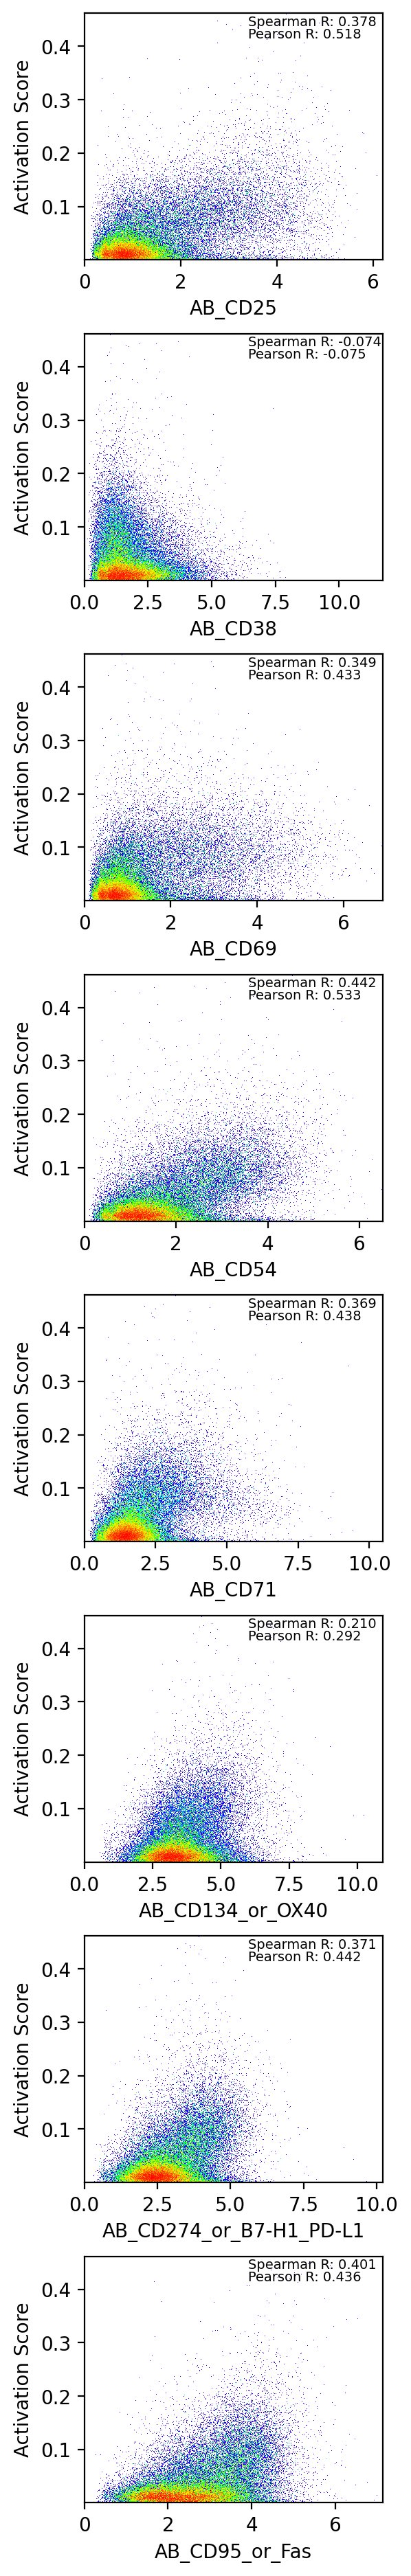

In [246]:
nrows = len(activation_adts)
fig, axes = plt.subplots(dpi = 200, figsize = (2.8, 3*nrows), nrows =nrows, ncols =1, 
                         gridspec_kw = {'hspace' : 0.3})
for i, p in enumerate(activation_adts):
    print(p)
    ax = axes[i]
    
    x = markers.loc[activation_score.index, p]
    y = activation_score
    r_s, _ = spearmanr(x, y)
    r_p, _ = pearsonr(x, y)
    # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
    dsshow(pd.DataFrame({'x':x, 'y':y}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
    ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
    ax.text(x = .55, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
    xlims = ax.get_xlim()
    ax.hlines(y = 0, xmin = xlims[0], xmax = xlims[1], color = 'black', linestyles = '--', linewidth = 1)
    ax.set_xlabel('%s' % p)
    ax.set_ylabel('Activation Score')

plt.show()


In [247]:
activation_adts_filt = [
     'AB_CD54',
'AB_CD25',
 'AB_CD274_or_B7-H1_PD-L1',
 'AB_CD71',
    'AB_CD95_or_Fas',
 # 'AB_CD38',
 'AB_CD69',
 'AB_CD134_or_OX40',
]


AB_CD54
AB_CD25
AB_CD274_or_B7-H1_PD-L1
AB_CD71
AB_CD95_or_Fas
AB_CD69
AB_CD134_or_OX40


/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/datashader/mpl_ext.py:144: UserWarning: EqHistColorMapper warning: Histogram equalization did not converge.
  "EqHistColorMapper warning: Histogram equalization did not converge."
/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/datashader/mpl_ext.py:144: UserWarning: EqHistColorMapper warning: Histogram equalization did not converge.
  "EqHistColorMapper warning: Histogram equalization did not converge."
/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/datashader/mpl_ext.py:144: UserWarning: EqHistColorMapper warning: Histogram equalization did not converge.
  "EqHistColorMapper warning: Histogram equalization did not converge."
/PHShome/mc1070/anaconda3/envs/cnmf_env2v2/lib/python3.7/site-packages/datashader/mpl_ext.py:144: UserWarning: EqHistColorMapper warning: Histogram equalization did not converge.
  "EqHistColorMapper warning: Histogram equalization did not converg

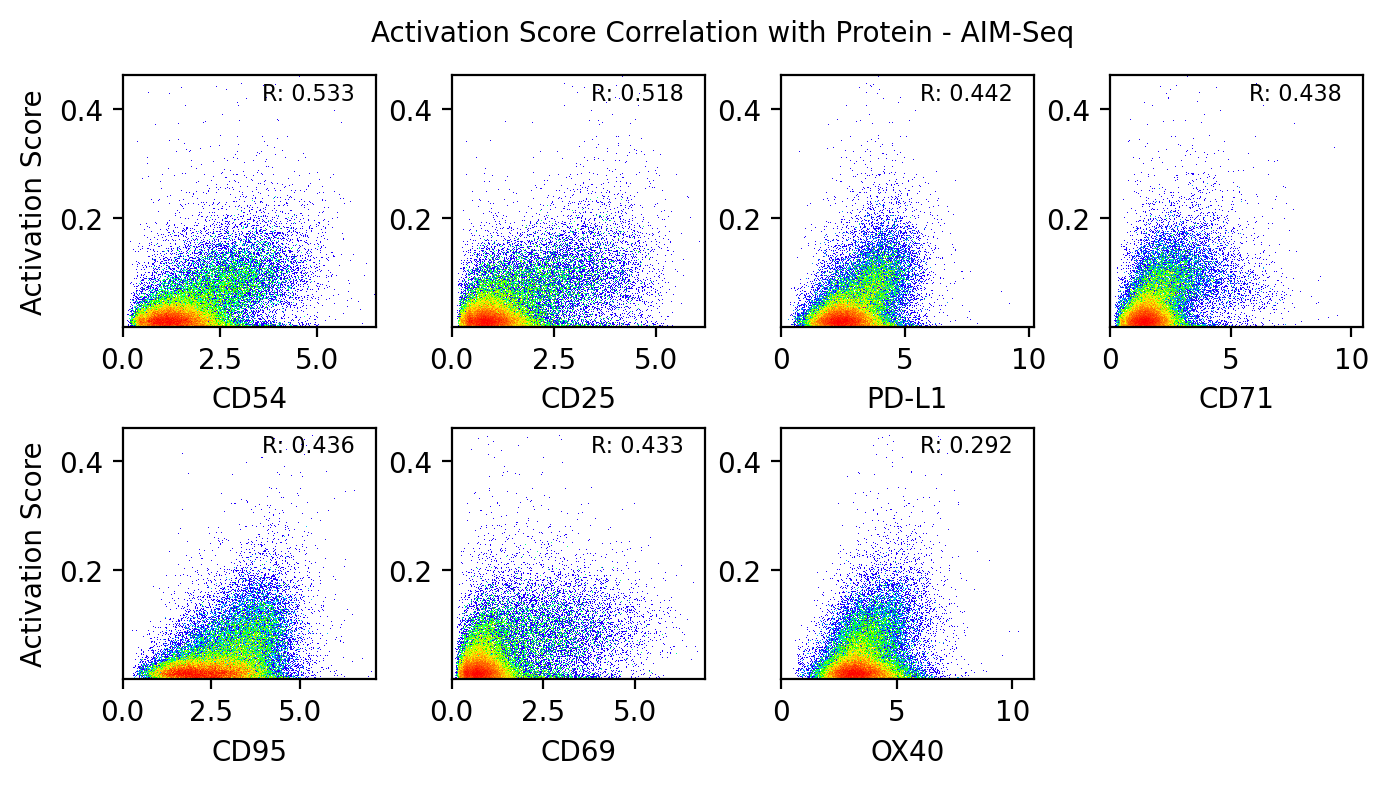

In [249]:
nrows = 2 #len(activation_adts)
ncols = 4 #int(len(activation_adts_filt)/nrows)
fig, axes = plt.subplots(dpi = 200, figsize = (6/3*ncols, 4), nrows =nrows, 
                         ncols = ncols, 
                         gridspec_kw = {'hspace' : .4, 'wspace' : .3})
for n, p in enumerate(activation_adts_filt):
    print(p)
    i = n//ncols
    j = n%ncols
    ax = axes[i, j]
    
    x = markers.loc[activation_score.index, p]
    y = activation_score
    # r_s, _ = spearmanr(x, y)
    r_p, _ = pearsonr(x, y)
    # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
    dsshow(pd.DataFrame({'x':x, 'y':y}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
    # ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
    ax.text(x = .55, y = .9, s = 'R: %.3f' % r_p, fontsize = 8, transform=ax.transAxes)
    xlims = ax.get_xlim()
    ax.hlines(y = 0, xmin = xlims[0], xmax = xlims[1], color = 'black', linestyles = '--', linewidth = 1)
    ax.set_xlabel('%s' % adts_rename[p])
    
    if j==0:
        ax.set_ylabel('Activation Score')
        
if n < len(activation_adts_filt):
    n+=1
    i = n//ncols
    j = n%ncols
    ax = axes[i, j]
    for spine in ax.spines.values():
        spine.set_visible(False)
        ax.tick_params(axis='both', which='both', length=0, 
                       labelbottom = False, labelleft = False)

plt.suptitle('Activation Score Correlation with Protein - %s' % 'AIM-Seq', 
             y = 0.95,
             fontsize = 10)

plt.savefig(os.path.join(figdir, 'Stimseq.Correlation_ActivationScore_vs_ADT.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Stimseq.Correlation_ActivationScore_vs_ADT.pdf'), bbox_inches="tight")

plt.show()


In [ ]:
marker_corrs = pd.DataFrame()

for i, p in enumerate(activation_adts):
    x = markers.loc[activation_score.index, p]
    y = activation_score
    r_p, _ = pearsonr(x, y)
    print(r_p)
    marker_corrs = marker_corrs.append(pd.Series(r_p, name = p))

In [ ]:
marker_corrs

In [ ]:
[0]*marker_corrs.shape[0]

In [ ]:
random.seed(123)

fig, ax = plt.subplots(dpi = 200, figsize = (1.5, 3))
sns.stripplot(x = [0]*marker_corrs.shape[0], 
              y = list(marker_corrs[0]), 
              hue = list(marker_corrs.index.map(adts_rename)),
              size = 8,
              ax = ax)
# ax.set_xticks([])
# ylims = ax.get_ylim()
# ax.set_ylim(0, ylims[1])
ax.legend(bbox_to_anchor=(1, .9), title = 'Protein', fontsize = 8)
# ax.set_ylabel('R')
# ax.set_title('Activation and Cell Cycle\nScore Correlations')


# Plot UMAPs

## AMP-RA

In [ ]:
dataset = 'AMP-RA'

meta = meta_all[dataset]
usage = usage_all[dataset]
usage_norm = usage_norm_all[dataset]
activation = activation_all[dataset]
activation_score = activation['Activation_Score']
activated_cells = activation['Activation_Status']


In [ ]:
# UMAP
for vmax in [activation_score.max(), activation_score.quantile(.9), 
            activation_score.quantile(.975)]:
    vmin = 0
    # vmax = activation_score.max()

    fig, ax = plt.subplots(figsize = (3, 3), dpi = 300)
    ax.scatter(x = meta.loc[:, 'UMAP1'], y = meta.loc[:, 'UMAP2'], s = .7, 
                     c = activation_score,
                    vmin=0, vmax = vmax,
                     edgecolors='none',
                     # cmap = cmap
                    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Activation Score')

    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    # plt.colorbar()

    cax = ax.inset_axes([0, 0, .1, 0.04], transform=ax.transAxes)
    fig.colorbar(ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), 
                                cmap='viridis'),
                 ax=ax, cax=cax, orientation='horizontal')
    cax.set_xticks([vmin, vmax])
    cax.set_xticklabels(['%.2f' % vmin , #'%.2f' % vmin, 
                         '%.2f' % vmax])
    cax.tick_params(labelsize=5)

    
    plt.show()
    
fig
fig.savefig(os.path.join(figdir, 'UMAP_ActivationScore.AMPRA.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'UMAP_ActivationScore.AMPRA.pdf'), bbox_inches="tight")


## COMBAT

In [30]:
dataset = 'COMBAT'

meta = meta_all[dataset]
usage = usage_all[dataset]
usage_norm = usage_norm_all[dataset]
activation = activation_all[dataset]
activation_score = activation['Activation_Score']
activated_cells = activation['Activation_Status']


In [31]:
cluster_col = params.loc[dataset, 'cluster_col']

In [32]:
count_fn = params.loc[dataset, 'processed_forcnmf_fn']

adata = sc.read(count_fn)

Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].
Only considering the two last: ['.HarmonyGeneCorrect', '.h5ad'].


In [33]:
umap = pd.DataFrame(adata.obsm['X_umap_published'], index = adata.obs.index,
                   columns = ['UMAP1', 'UMAP2'])

In [ ]:
umap.shape

In [ ]:
meta.shape

In [34]:
meta[['UMAP1', 'UMAP2']] = umap.loc[meta.index, :]

In [ ]:
meta.columns

In [ ]:
adata.shape

In [ ]:
 activation_score.quantile(.9)

In [ ]:
 activation_score.quantile(.975)

In [ ]:
# UMAP
for vmax in [activation_threshold, activation_score.max(), activation_score.quantile(.9), 
            activation_score.quantile(.975)]:
    vmin = 0
    # vmax = activation_score.max()

    fig, ax = plt.subplots(figsize = (3, 3), dpi = 300)
    ax.scatter(x = meta.loc[:, 'UMAP1'], y = meta.loc[:, 'UMAP2'], s = .7, 
                     c = activation_score,
                    vmin=0, vmax = vmax,
                     edgecolors='none',
                     # cmap = cmap
                    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Activation Score')

    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
    # plt.colorbar()

    cax = ax.inset_axes([0, 0, .1, 0.04], transform=ax.transAxes)
    fig.colorbar(ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), 
                                cmap='viridis'),
                 ax=ax, cax=cax, orientation='horizontal')
    cax.set_xticks([vmin, vmax])
    cax.set_xticklabels(['%.2f' % vmin , #'%.2f' % vmin, 
                         '%.2f' % vmax])
    cax.tick_params(labelsize=5)

    
    plt.show()
    
fig
# fig.savefig(os.path.join(figdir, 'UMAP_ActivationScore.COMBAT.png'), bbox_inches="tight")
# fig.savefig(os.path.join(figdir, 'UMAP_ActivationScore.COMBAT.pdf'), bbox_inches="tight")


In [ ]:
meta[cluster_col].unique()

In [ ]:
len(meta['Annotation_cluster_name'].unique())

In [ ]:
len(meta['Annotation_minor_subset'].unique())

In [ ]:
meta['Annotation_major_subset'].unique()

In [ ]:
meta.columns

In [ ]:
adata

In [36]:
len(meta[cluster_col].unique())

21

In [35]:
ind = adata.obs[adata.obs[cluster_col]!='nan'].index#meta[cluster_col].dropna().index

In [ ]:
'''import random
adata[random.sample(list(ind), 5000)],'''

In [71]:
import colorcet  as cc; 
palette = sns.color_palette(cc.glasbey, n_colors=len(adata.obs[cluster_col].unique()))

In [73]:
palette

[(0.8392156862745098, 0.0, 0.0),
 (0.5490196078431373, 0.23137254901960785, 1.0),
 (0.00392156862745098, 0.5294117647058824, 0.0),
 (0.0, 0.6745098039215687, 0.7764705882352941),
 (0.592156862745098, 1.0, 0.0),
 (1.0, 0.49411764705882355, 0.8196078431372549),
 (0.4196078431372549, 0.0, 0.30980392156862746),
 (1.0, 0.6470588235294118, 0.1843137254901961),
 (0.3411764705882353, 0.23137254901960785, 0.0),
 (0.0, 0.33725490196078434, 0.34901960784313724),
 (0.0, 0.0, 0.8666666666666667),
 (0.0, 0.9921568627450981, 0.8117647058823529),
 (0.6313725490196078, 0.4588235294117647, 0.4117647058823529),
 (0.7372549019607844, 0.7137254901960784, 1.0),
 (0.5843137254901961, 0.7098039215686275, 0.4666666666666667),
 (0.7490196078431373, 0.011764705882352941, 0.7215686274509804),
 (0.39215686274509803, 0.32941176470588235, 0.4549019607843137),
 (0.4745098039215686, 0.0, 0.0),
 (0.027450980392156862, 0.4549019607843137, 0.8470588235294118),
 (0.9921568627450981, 0.9568627450980393, 0.5647058823529412),
 (0.0, 0.29411764705882354, 0.0)]

In [78]:
dir(palette)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_html_',
 'append',
 'as_hex',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [70]:
len(adata.obs[cluster_col].unique())

21

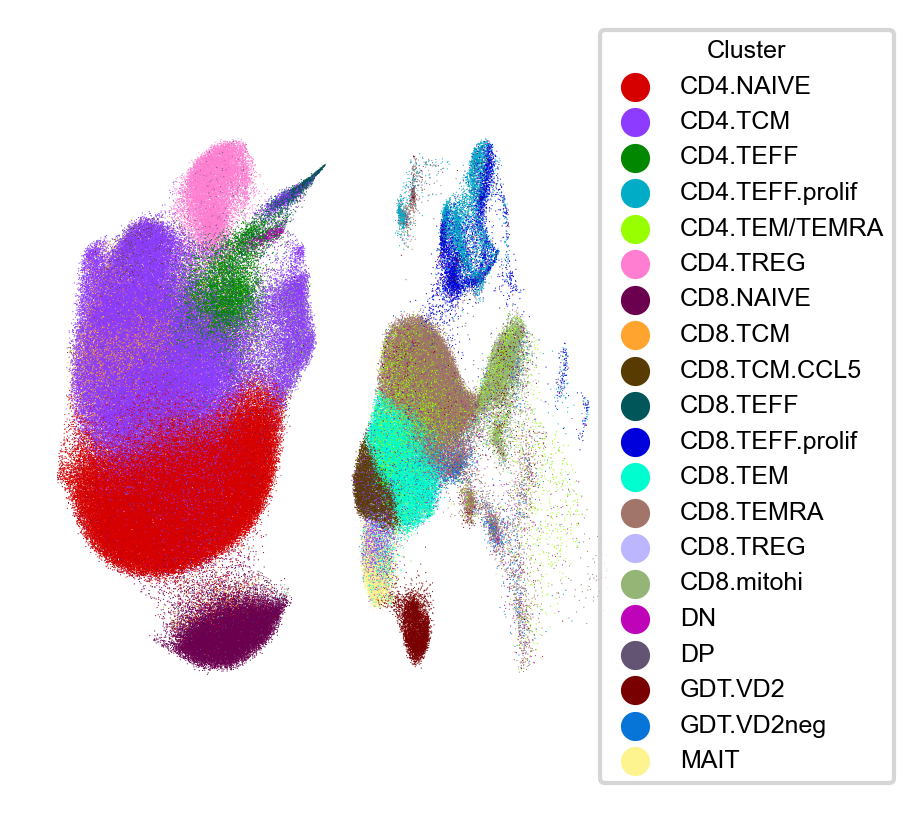

In [81]:
fig, ax = plt.subplots(figsize = (2.6, 2.6), dpi = 300)
ax = sc.pl.embedding(adata[ind],
                     basis = 'X_umap_published',
                color=cluster_col, frameon = False, ax = ax, 
               legend_fontsize = 5, na_in_legend = False, title = '', show = False, 
                     palette = palette)
ax.legend(ncol = 1, title = 'Cluster', fontsize = 6, title_fontsize = 6, loc = 'right', 
          bbox_to_anchor=(1.45, 0.5,), )
fig.savefig(os.path.join(figdir, 'UMAP_AllClusters.COMBAT.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'UMAP_AllClusters.COMBAT.pdf'), bbox_inches="tight")


In [ ]:
adata._uns

In [ ]:
adata

In [ ]:
cluster_col

In [ ]:
cluster_cmap = dict(zip(sorted(adata.obs[cluster_col].unique()), adata.uns['Annotation_minor_subset_colors']))

list(meta[cluster_col].map(cluster_cmap))

len(list(meta[cluster_col].map(cluster_cmap)))

meta[cluster_col].map(cluster_cmap).unique()

In [55]:
adata.obs['Activation_Score'] = activation_score[adata.obs.index]

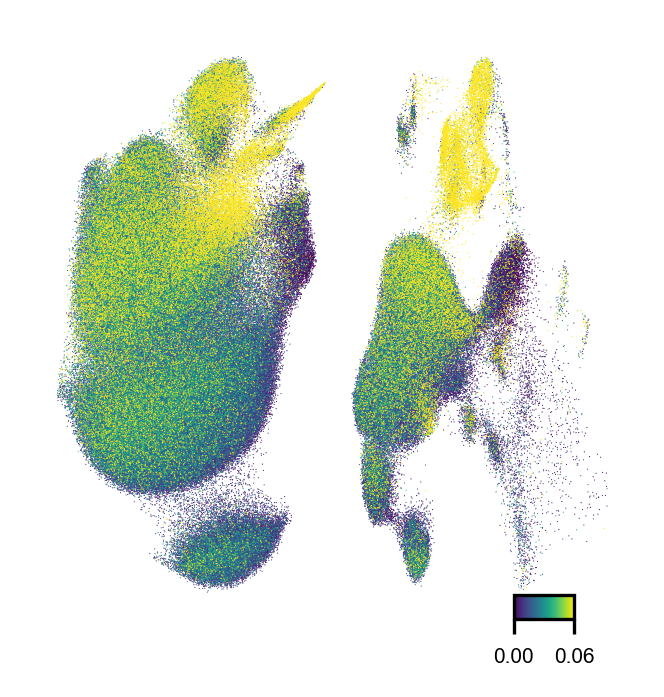

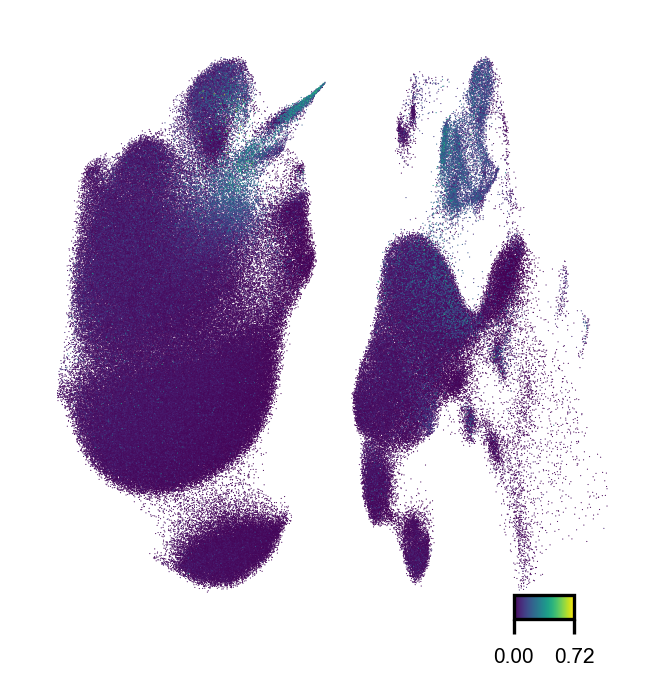

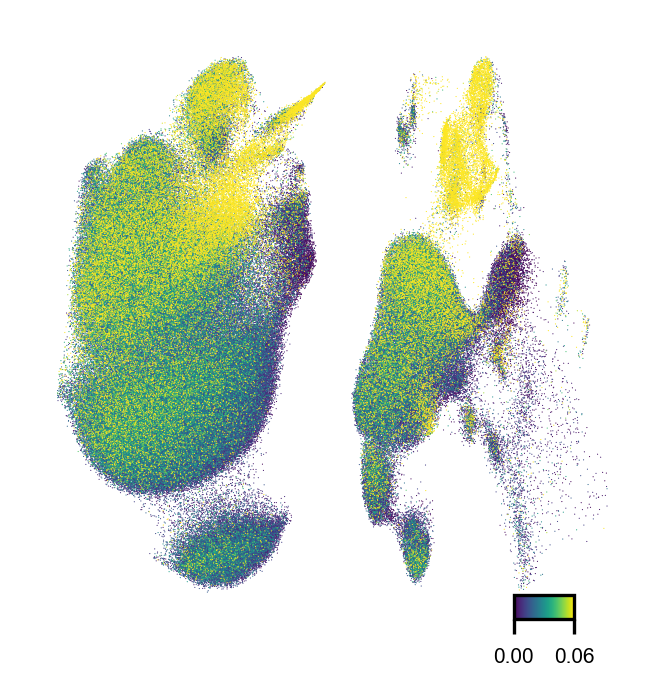

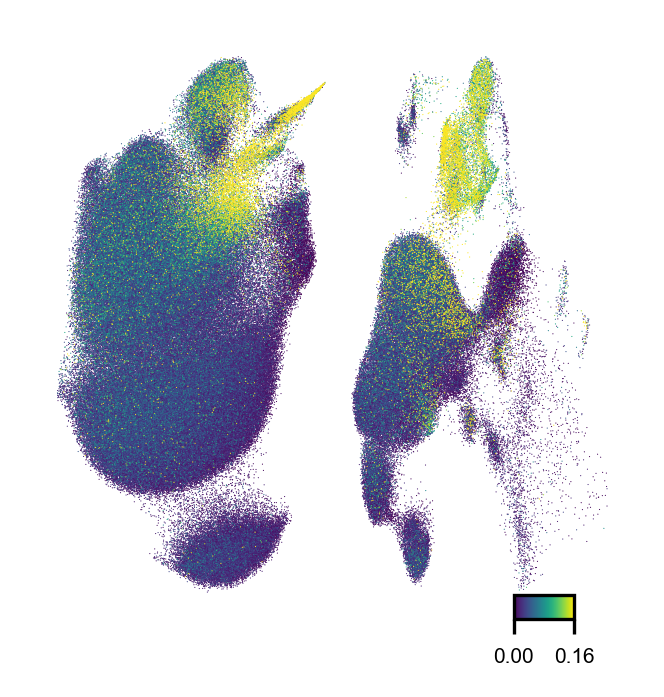

In [82]:
for vmax in [activation_threshold, activation_score.max(), activation_score.quantile(.9), 
            activation_score.quantile(.975)]:
    vmin = 0
    # vmax = activation_score.max()

    fig, ax = plt.subplots(figsize = (2.6, 2.6), dpi = 300)
    ax = sc.pl.embedding(adata[ind], basis = 'X_umap_published',
                    color='Activation_Score', frameon = False, ax = ax, 
                    title = '',
                         vmin = vmin, vmax = vmax, legend_fontsize = 5,
                    colorbar_loc = None, show = False)
    
    cax = ax.inset_axes([0.8, 0, .1, 0.04], transform=ax.transAxes)
    fig.colorbar(ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax), 
                                cmap='viridis'),
                 ax=ax, cax=cax, orientation='horizontal')
    cax.set_xticks([vmin, vmax])
    cax.set_xticklabels(['%.2f' % vmin , #'%.2f' % vmin, 
                         '%.2f' % vmax])
    cax.tick_params(labelsize=5)

    plt.show()
    
fig.savefig(os.path.join(figdir, 'UMAP_ActivationScore.COMBAT.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'UMAP_ActivationScore.COMBAT.pdf'), bbox_inches="tight")


# Activation score vs clinical metrics

In [ ]:
dataset = 'AMP-RA'

meta = meta_all[dataset]
usage = usage_all[dataset]
usage_norm = usage_norm_all[dataset]
activation = activation_all[dataset]
activation_score = activation['Activation_Score']
activated_cells = activation['Activation_Status']


cc_score = cc_all[dataset]['CC_Score']
prolif_cells = cc_all[dataset]['CC_Status']


individual_col = params.loc[dataset, 'individual_col']

In [ ]:
meta.columns

In [ ]:
# Per sample % activated by % proliferating, scatterplot and dotplot
ind_sample = meta[[individual_col]].dropna()[individual_col].unique()



In [ ]:
meta[meta[individual_col].isin(ind_sample)]

In [ ]:
sample_meta = meta.loc[meta[individual_col].drop_duplicates().index, :]
sample_meta.index = sample_meta[individual_col]
sample_meta = sample_meta.loc[ind_sample, :]

pct_activated_sample = sample_meta.copy()
pct_activated_sample[['Activated', 'Proliferating', 'Num_Cells']] = np.nan

In [ ]:
sample_meta.columns

In [ ]:
pct_activated_sample

In [ ]:
samples = pct_activated_sample.index

ind_sample = ((meta[individual_col].isin(samples))) #&  (meta['loc']=='T') )
ind_sample = ind_sample[ind_sample].index


In [ ]:
len(ind_sample)

In [ ]:
pct_act_pheno_sample = (activated_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).sum()/
                        activated_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).count())*100
pct_activated_sample.loc[pct_act_pheno_sample.index, 'Activated'] = pct_act_pheno_sample[pct_act_pheno_sample.index]

pct_prolif_pheno_sample = (prolif_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).sum()/
                        prolif_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).count())*100
pct_activated_sample.loc[pct_prolif_pheno_sample.index, 'Proliferating'] = pct_prolif_pheno_sample[pct_prolif_pheno_sample.index]

count_pheno_sample = activated_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).count()
pct_activated_sample.loc[count_pheno_sample.index, 'Num_Cells'] = count_pheno_sample[count_pheno_sample.index]


In [ ]:
pct_activated_sample

In [ ]:
meta.columns

In [ ]:

for pheno_col in ['Age']:
    ind_sample = sample_meta[pheno_col].dropna().index
    # print(sample_meta[pheno_col].head())

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    x = sample_meta.loc[ind_sample, pheno_col]
    y = ind_activation_score[ind_sample]
    r, _ = pearsonr(x, y)
    ax.scatter(x = x, y = y)
    ax.text(x = .7, y = .05, s = 'R: %.3f' % r, transform=ax.transAxes)
    ax.set_xlabel(pheno_col)
    ax.set_ylabel('Activation Score')

    plt.show()

In [ ]:
from matplotlib.ticker import FormatStrFormatter

In [ ]:
phenos_to_plot = ['krenn_inflam_overall', 'aggr_overall', 'density_overall']

In [ ]:
# Per sample mean activation scores 
ind_activation_score =activation_score.groupby(meta[individual_col]).mean()

In [ ]:
fig, axes = plt.subplots(dpi = 200, figsize = (12, 3.5), nrows = 1, ncols = len(phenos_to_plot),
                        gridspec_kw = {'wspace' : 0.33})

for n, (pheno_col_name, pheno_col) in enumerate(zip(['Krenn Inflammation Score', 'Aggregate Score', 'Density Score'],
                                     phenos_to_plot)):
    
    ind = sample_meta[pheno_col].dropna().index
    # print(sample_meta[pheno_col].head())

    x = sample_meta.loc[ind, pheno_col]
    y = ind_activation_score[ind]
    r, _ = pearsonr(x, y)
    
    ax = axes[n]
    ax.scatter(x = x, y = y)
    ax.text(x = .7, y = .05, s = 'R: %.3f' % r, transform=ax.transAxes)
    ax.set_xlabel(pheno_col_name)
    ax.set_ylabel('Activation Score')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    # plt.show()
# fig.savefig(os.path.join(figdir, 'Scatterplot_ActivationScorevsClinicalMetrics.AMPRA.png'), bbox_inches="tight")
# fig.savefig(os.path.join(figdir, 'Scatterplot_ActivationScorevsClinicalMetrics.AMPRA.pdf'), bbox_inches="tight")



In [ ]:
fig, axes = plt.subplots(dpi = 200, figsize = (12, 3.5), nrows = 1, ncols = len(phenos_to_plot),
                        gridspec_kw = {'wspace' : 0.33})

for n, (pheno_col_name, pheno_col) in enumerate(zip(['Krenn Inflammation Score', 'Aggregate Score', 'Density Score'],
                                     phenos_to_plot)):
    
    ind = sample_meta[pheno_col].dropna().index
    # print(sample_meta[pheno_col].head())

    x = sample_meta.loc[ind, pheno_col]
    y = pct_activated_sample.loc[ind, 'Activated']
    r, _ = pearsonr(x, y)
    
    ax = axes[n]
    ax.scatter(x = x, y = y)
    ax.text(x = .7, y = .05, s = 'R: %.3f' % r, transform=ax.transAxes)
    ax.set_xlabel(pheno_col_name)
    ax.set_ylabel('% Activated Cells')
    # ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    # plt.show()
fig.savefig(os.path.join(figdir, 'Scatterplot_ActivationScorevsClinicalMetrics.AMPRA.png'), bbox_inches="tight")
fig.savefig(os.path.join(figdir, 'Scatterplot_ActivationScorevsClinicalMetrics.AMPRA.pdf'), bbox_inches="tight")



# Plot cell cycle vs activation correlations

In [ ]:
for dataset in ds_list:
    print(dataset)

    meta = meta_all[dataset]
    usage = usage_all[dataset]
    usage_norm = usage_norm_all[dataset]

    cluster_col = params.loc[dataset, 'cluster_col']
    individual_col = params.loc[dataset, 'individual_col']
    sample_col = params.loc[dataset, 'sample_col']

    cc_score = cc_all[dataset]['CC_Score']
    prolif_cells = cc_all[dataset]['CC_Status']

    activation = activation_all[dataset]
    activation_score = activation['Activation_Score']
    activated_cells = activation['Activation_Status']

    # Calculate % of activated, proliferating, both cells
    ind = activated_cells.index




    fig, ax = plt.subplots(dpi = 200, figsize = (2.5, 2.5))

    x = cc_score[ind]
    y = activation_score[ind]

    r_s, _ = spearmanr(x, y)
    r_p, _ = pearsonr(x, y)
    ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
    # xlims = ax.get_xlim()
    # dsshow(pd.DataFrame({'x':x, 'y':y}), 
    #        ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
    # ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)

    ax.text(x = .7, y = .9, s = 'R: %.3f' % r_p, fontsize = 8, transform=ax.transAxes)

    # ax.hlines(y = activation_threshold, xmin = xlims[0], xmax = xlims[1], color = 'black', linestyles = '--', linewidth = 1)

    ax.set_xlabel('Activation Score')
    ax.set_ylabel('Cell Cycle Score')
    ax.set_title(dataset)
    # ax.set_xlim(xlims)
    
    if dataset == 'TBRU':
        fig.savefig(os.path.join(figdir, 'Scatterplot_ActScoreCCScore_TBRU.png'), bbox_inches="tight")
        fig.savefig(os.path.join(figdir, 'Scatterplot_ActScoreCCScore_TBRU.pdf'), bbox_inches="tight")


    plt.show()


# Explore exhaustion vs activation

In [181]:
cancer_map = {'BCC' : 'Basal Cell', 'BCL' : 'B Cell', 'BC' : 'Breast', 
             'ESCA' : 'Esophageal', 'FTC' : 'Fallopian Tube', 'HCC' : 'Hepatocellular',
             'LUNG' : 'Lung', 'MM' : 'Multiple Myeloma', 'OV' : 'Ovarian', 
             'PACA' : 'Pancreatic', 'RC' : 'Renal', 'THCA' : 'Thyroid', 'UCEC' : 'Endometrial'}

In [182]:
dataset = 'Pan-Cancer'

In [183]:
meta = meta_all[dataset]
usage = usage_all[dataset]
usage_norm = usage_norm_all[dataset]

cluster_col = params.loc[dataset, 'cluster_col']
individual_col = params.loc[dataset, 'individual_col']
sample_col = params.loc[dataset, 'sample_col']
# pheno_col = pheno_map[dataset][0]
# pheno_order = pheno_map[dataset][1]
# ind = meta[pheno_col].dropna().index 

# max_lineage = usage_norm.loc[:, lineage_geps].replace(0, np.nan).idxmax(axis = 1)

cc_score = cc_all[dataset]['CC_Score']
prolif_cells = cc_all[dataset]['CC_Status']

activation = activation_all[dataset]
activation_score = activation['Activation_Score']
activated_cells = activation['Activation_Status']


In [184]:
gep = 'Exhaustion'
exhaustion_score = usage_norm[gep]

In [185]:
exhaustion_threshold =  0.05

exhausted_cells = usage_norm[gep] > exhaustion_threshold

exhausted_cells.value_counts()

False    186039
True      28996
Name: Exhaustion, dtype: int64

In [189]:
lineage_class = pd.Series(np.nan, index = meta.index)
lineage_class.loc[meta[cluster_col].str.contains('CD4')] = 'CD4 Conv'
lineage_class.loc[meta[cluster_col].str.contains('Treg')] = 'CD4 Treg'
lineage_class.loc[meta[cluster_col].str.contains('CD8')] = 'CD8 Conv'
lineage_class.loc[lineage_class.isna()] = 'Other'

In [ ]:
usage_norm_all

In [ ]:
meta.columns

In [190]:
# Per sample % activated by % proliferating, scatterplot and dotplot
ind_sample = meta[[individual_col]].dropna()[individual_col].unique()

sample_meta = meta[meta[individual_col].isin(ind_sample)][[individual_col, 'cancerType', 'dataset']].drop_duplicates()
sample_meta.index = sample_meta[individual_col]
sample_meta = sample_meta.loc[ind_sample, :]



In [201]:
# Filter just to cancertypes with > 1 individual for tumor tissue type
num_ind_by_ctype = pd.Series(0, index = meta['cancerType'].unique())

for ctype in meta['cancerType'].unique():
    
    ind = (meta['loc']=='T') & (meta['cancerType']==ctype)
    ind = ind[ind].index
    n_individuals = len(meta.loc[ind, individual_col].unique())
    num_ind_by_ctype[ctype] = n_individuals

min_individuals = 3

ctypes_filt = num_ind_by_ctype[num_ind_by_ctype >min_individuals].index
ctypes_filt

Index(['BCC', 'ESCA', 'HCC', 'PACA', 'RC', 'THCA', 'UCEC'], dtype='object')

In [221]:
meta['cancerType'].unique()

array(['BCC', 'BCL', 'BC', 'ESCA', 'FTC', 'HCC', 'LUNG', 'MM', 'OV',
       'PACA', 'RC', 'THCA', 'UCEC'], dtype=object)

In [222]:
meta[meta['cancerType']=='MM']

patient               cellID       libraryID  \
AAACCTGCATCTCCCA-25-14  MM.P20181219  AAACCTGCATCTCCCA-25  MM-P20181219-T   
AAACGGGAGGATTCGG-25-14  MM.P20181219  AAACGGGAGGATTCGG-25  MM-P20181219-T   
AAACGGGAGTGTCCCG-25-14  MM.P20181219  AAACGGGAGTGTCCCG-25  MM-P20181219-T   
AAACGGGCAAGGGTCA-25-14  MM.P20181219  AAACGGGCAAGGGTCA-25  MM-P20181219-T   
AAAGATGAGACACTAA-25-14  MM.P20181219  AAAGATGAGACACTAA-25  MM-P20181219-T   
...                              ...                  ...             ...   
TTTGGTTTCGACCAGC-31-15  MM.P20190322  TTTGGTTTCGACCAGC-31  MM-P20190322-T   
TTTGTCAAGTCTTGCA-31-15  MM.P20190322  TTTGTCAAGTCTTGCA-31  MM-P20190322-T   
TTTGTCAAGTGTACGG-31-15  MM.P20190322  TTTGTCAAGTGTACGG-31  MM-P20190322-T   
TTTGTCATCAACGGCC-31-15  MM.P20190322  TTTGTCATCAACGGCC-31  MM-P20190322-T   
TTTGTCATCTATGTGG-31-15  MM.P20190322  TTTGTCATCTATGTGG-31  MM-P20190322-T   

                       cancerType loc        batchV   TCR        dataset  \
AAACCTGCATCTCCCA-25-14         MM   T  MM.P20181219  Prod  MM.zhangLab5P   
AAACGGGAGGATTCGG-25-14         MM   T  MM.P20181219  Prod  MM.zhangLab5P   
AAACGGGAGTGTCCCG-25-14         MM   T  MM.P20181219  Prod  MM.zhangLab5P   
AAACGGGCAAGGGTCA-25-14         MM   T  MM.P20181219  Prod  MM.zhangLab5P   
AAAGATGAGACACTAA-25-14         MM   T  MM.P20181219  Prod  MM.zhangLab5P   
...                           ...  ..           ...   ...            ...   
TTTGGTTTCGACCAGC-31-15         MM   T  MM.P20190322  Prod  MM.zhangLab5P   
TTTGTCAAGTCTTGCA-31-15         MM   T  MM.P20190322  Prod  MM.zhangLab5P   
TTTGTCAAGTGTACGG-31-15         MM   T  MM.P20190322  Prod  MM.zhangLab5P   
TTTGTCATCAACGGCC-31-15         MM   T  MM.P20190322  Prod  MM.zhangLab5P   
TTTGTCATCTATGTGG-31-15         MM   T  MM.P20190322  Prod  MM.zhangLab5P   

                                ClusterID dataset.tech  ...  \
AAACCTGCATCTCCCA-25-14  MM.zhangLab5P.C05   zhangLab5P  ...   
AAACGGGAGGATTCGG-25-14  MM.zhangLab5P.C03   zhangLab5P  ...   
AAACGGGAGTGTCCCG-25-14  MM.zhangLab5P.C06   zhangLab5P  ...   
AAACGGGCAAGGGTCA-25-14  MM.zhangLab5P.C12   zhangLab5P  ...   
AAAGATGAGACACTAA-25-14  MM.zhangLab5P.C04   zhangLab5P  ...   
...                                   ...          ...  ...   
TTTGGTTTCGACCAGC-31-15  MM.zhangLab5P.C01   zhangLab5P  ...   
TTTGTCAAGTCTTGCA-31-15  MM.zhangLab5P.C01   zhangLab5P  ...   
TTTGTCAAGTGTACGG-31-15  MM.zhangLab5P.C03   zhangLab5P  ...   
TTTGTCATCAACGGCC-31-15  MM.zhangLab5P.C14   zhangLab5P  ...   
TTTGTCATCTATGTGG-31-15  MM.zhangLab5P.C14   zhangLab5P  ...   

                       cancerType_Binary_ESCA  cancerType_Binary_FTC  \
AAACCTGCATCTCCCA-25-14                  Other                  Other   
AAACGGGAGGATTCGG-25-14                  Other                  Other   
AAACGGGAGTGTCCCG-25-14                  Other                  Other   
AAACGGGCAAGGGTCA-25-14                  Other                  Other   
AAAGATGAGACACTAA-25-14                  Other                  Other   
...                                       ...                    ...   
TTTGGTTTCGACCAGC-31-15                  Other                  Other   
TTTGTCAAGTCTTGCA-31-15                  Other                  Other   
TTTGTCAAGTGTACGG-31-15                  Other                  Other   
TTTGTCATCAACGGCC-31-15                  Other                  Other   
TTTGTCATCTATGTGG-31-15                  Other                  Other   

                        cancerType_Binary_HCC cancerType_Binary_LUNG  \
AAACCTGCATCTCCCA-25-14                  Other                  Other   
AAACGGGAGGATTCGG-25-14                  Other                  Other   
AAACGGGAGTGTCCCG-25-14                  Other                  Other   
AAACGGGCAAGGGTCA-25-14                  Other                  Other   
AAAGATGAGACACTAA-25-14                  Other                  Other   
...                                       ...                    ...   
TTTGGTTTCGACCAGC-31-15                  Other                  Ot

In [218]:
meta[meta['cancerType']=='BCL']

patient               cellID      libraryID  \
AAACCTGTCAGCTGGC-21-2  L.P20190404  AAACCTGTCAGCTGGC-21  L-P20190404-T   
AAACCTGTCATTATCC-21-2  L.P20190404  AAACCTGTCATTATCC-21  L-P20190404-T   
AAACGGGTCCTTGACC-21-2  L.P20190404  AAACGGGTCCTTGACC-21  L-P20190404-T   
AAAGATGCAAAGTGCG-21-2  L.P20190404  AAAGATGCAAAGTGCG-21  L-P20190404-T   
AAAGCAACAGTTCATG-21-2  L.P20190404  AAAGCAACAGTTCATG-21  L-P20190404-T   
...                            ...                  ...            ...   
TTTGGTTGTTGATTGC-22-3  L.P20181123  TTTGGTTGTTGATTGC-22  L-P20181123-T   
TTTGGTTTCGGTCCGA-22-3  L.P20181123  TTTGGTTTCGGTCCGA-22  L-P20181123-T   
TTTGGTTTCTAACTCT-22-3  L.P20181123  TTTGGTTTCTAACTCT-22  L-P20181123-T   
TTTGTCACAGCTGCAC-22-3  L.P20181123  TTTGTCACAGCTGCAC-22  L-P20181123-T   
TTTGTCATCACCTTAT-22-3  L.P20181123  TTTGTCATCACCTTAT-22  L-P20181123-T   

                      cancerType loc       batchV   TCR         dataset  \
AAACCTGTCAGCTGGC-21-2        BCL   T  L.P20190404  Prod  BCL.zhangLab5P   
AAACCTGTCATTATCC-21-2        BCL   T  L.P20190404  Prod  BCL.zhangLab5P   
AAACGGGTCCTTGACC-21-2        BCL   T  L.P20190404  Prod  BCL.zhangLab5P   
AAAGATGCAAAGTGCG-21-2        BCL   T  L.P20190404  Prod  BCL.zhangLab5P   
AAAGCAACAGTTCATG-21-2        BCL   T  L.P20190404  Prod  BCL.zhangLab5P   
...                          ...  ..          ...   ...             ...   
TTTGGTTGTTGATTGC-22-3        BCL   T  L.P20181123  Prod  BCL.zhangLab5P   
TTTGGTTTCGGTCCGA-22-3        BCL   T  L.P20181123  Prod  BCL.zhangLab5P   
TTTGGTTTCTAACTCT-22-3        BCL   T  L.P20181123  Prod  BCL.zhangLab5P   
TTTGTCACAGCTGCAC-22-3        BCL   T  L.P20181123  Prod  BCL.zhangLab5P   
TTTGTCATCACCTTAT-22-3        BCL   T  L.P20181123  Prod  BCL.zhangLab5P   

                                ClusterID dataset.tech  ...  \
AAACCTGTCAGCTGGC-21-2  BCL.zhangLab5P.C01   zhangLab5P  ...   
AAACCTGTCATTATCC-21-2  BCL.zhangLab5P.C12   zhangLab5P  ...   
AAACGGGTCCTTGACC-21-2  BCL.zhangLab5P.C05   zhangLab5P  ...   
AAAGATGCAAAGTGCG-21-2  BCL.zhangLab5P.C05   zhangLab5P  ...   
AAAGCAACAGTTCATG-21-2  BCL.zhangLab5P.C06   zhangLab5P  ...   
...                                   ...          ...  ...   
TTTGGTTGTTGATTGC-22-3  BCL.zhangLab5P.C01   zhangLab5P  ...   
TTTGGTTTCGGTCCGA-22-3  BCL.zhangLab5P.C00   zhangLab5P  ...   
TTTGGTTTCTAACTCT-22-3  BCL.zhangLab5P.C01   zhangLab5P  ...   
TTTGTCACAGCTGCAC-22-3  BCL.zhangLab5P.C01   zhangLab5P  ...   
TTTGTCATCACCTTAT-22-3  BCL.zhangLab5P.C00   zhangLab5P  ...   

                      cancerType_Binary_ESCA  cancerType_Binary_FTC  \
AAACCTGTCAGCTGGC-21-2                  Other                  Other   
AAACCTGTCATTATCC-21-2                  Other                  Other   
AAACGGGTCCTTGACC-21-2                  Other                  Other   
AAAGATGCAAAGTGCG-21-2                  Other                  Other   
AAAGCAACAGTTCATG-21-2                  Other                  Other   
...                                      ...                    ...   
TTTGGTTGTTGATTGC-22-3                  Other                  Other   
TTTGGTTTCGGTCCGA-22-3                  Other                  Other   
TTTGGTTTCTAACTCT-22-3                  Other                  Other   
TTTGTCACAGCTGCAC-22-3                  Other                  Other   
TTTGTCATCACCTTAT-22-3                  Other                  Other   

                       cancerType_Binary_HCC cancerType_Binary_LUNG  \
AAACCTGTCAGCTGGC-21-2                  Other                  Other   
AAACCTGTCATTATCC-21-2                  Other                  Other   
AAACGGGTCCTTGACC-21-2                  Other                  Other   
AAAGATGCAAAGTGCG-21-2                  Other                  Other   
AAAGCAACAGTTCATG-21-2                  Other                  Other   
...                                      ...                    ...   
TTTGGTTGTTGATTGC-22-3                  Other                  Other   
TTTGGTTTCGGTCCGA-22-3                  Other               

In [223]:
meta[meta['cancerType']=='BCL']['patient'].unique()

array(['L.P20190404', 'L.P20181123'], dtype=object)

In [225]:
meta[meta['cancerType']=='BCL']['patient'].value_counts()

L.P20190404    1972
L.P20181123    1521
Name: patient, dtype: int64

In [224]:
meta[meta['cancerType']=='MM']['patient'].unique()

array(['MM.P20181219', 'MM.P20190122', 'MM.P20190322'], dtype=object)

In [226]:
meta[meta['cancerType']=='MM']['patient'].value_counts()

MM.P20190122    3875
MM.P20181219    2267
MM.P20190322    2137
Name: patient, dtype: int64

## Per-cell exhaustion vs activation

In [ ]:
x = activation_score
y = usage_norm.loc[activation_score.index, gep]
r_p, _ = pearsonr(x, y)
r_s, _ = spearmanr(x, y)

fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
# ax.scatter(x, y)
dsshow(pd.DataFrame({'x':x, 'y':y}), 
       ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
# ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
ax.text(x = .55, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
ax.set_xlabel('Activation Score')
ax.set_ylabel('Exhaustion')
ax.set_title(dataset)

In [ ]:
for ctype in meta['cancerType'].unique():
    
    ind = meta['cancerType']==ctype
    ind = ind[ind].index

    x = activation_score[ind]
    y = usage_norm.loc[ind, gep]
    r_p, _ = pearsonr(x, y)
    r_s, _ = spearmanr(x, y)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    # ax.scatter(x, y)
    dsshow(pd.DataFrame({'x':x, 'y':y}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
    # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
    ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
    ax.text(x = .55, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
    ax.set_xlabel('Activation Score')
    ax.set_ylabel('Exhaustion')
    ax.set_title(ctype)

In [ ]:
pheno_col = 'loc'
pheno = 'T'

In [ ]:
for ctype in meta['cancerType'].unique():
    
    ind = (meta['loc']=='T') & (meta['cancerType']==ctype)
    ind = ind[ind].index

    x = activation_score[ind]
    y = usage_norm.loc[ind, gep]
    r_p, _ = pearsonr(x, y)
    r_s, _ = spearmanr(x, y)

    fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))
    # ax.scatter(x, y)
    dsshow(pd.DataFrame({'x':x, 'y':y}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
    # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
    ax.text(x = .55, y = .95, s = 'Spearman R: %.3f' % r_s, fontsize = 7, transform=ax.transAxes)
    ax.text(x = .55, y = .9, s = 'Pearson R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
    ax.set_xlabel('Activation Score')
    ax.set_ylabel('Exhaustion')
    ax.set_title(ctype)

In [ ]:
for n, ctype in enumerate(meta['cancerType'].unique()):
    print(n)

In [ ]:
ctype = 'BCC'


In [ ]:
ind = (meta['loc']=='T') & (meta['cancerType']==ctype)
ind = ind[ind].index
x = activation_score[ind]
y = usage_norm.loc[ind, gep]
r_p, _ = pearsonr(x, y)
# r_s, _ = spearmanr(x, y)
MI = mutual_info_regression(np.array(x).reshape(-1, 1), 
                        np.array(y).reshape(-1, 1), random_state = 123)


In [ ]:
y.min()

In [ ]:
(y==0).value_counts()

In [ ]:
MI

In [ ]:
exhaustion_order = pd.DataFrame(0, index = meta['cancerType'].unique(),
                               columns = ['MI', 'R', 'OR', 'log10(OR)', 'pval_fisher',
                                         'OR_Tumor', 'log10(OR)_Tumor', 'pval_fisher_Tumor'])

In [ ]:
# Try a higher threshold of activation for tumor cells
activation_threshold_tumor = 0.15
activated_cells_tumor = activation_score > activation_threshold_tumor

In [ ]:
for n, ctype in enumerate(meta['cancerType'].unique()):
    ind = (meta['loc']=='T') & (meta['cancerType']==ctype)
    ind = ind[ind].index
    x = activation_score[ind]
    y = usage_norm.loc[ind, gep]
    r_p, _ = pearsonr(x, y)
    # r_s, _ = spearmanr(x, y)
    # MI = mutual_info_regression(np.array(x).reshape(-1, 1), 
    #                         np.array(y).reshape(-1, 1), random_state = 123)
    exhaustion_order.loc[ctype, 'R'] = r_p
    # exhaustion_order.loc[ctype, 'MI'] = MI
    

    # OR for activated vs exhausted
    dat = [((exhausted_cells[ind]) & activated_cells[ind]).value_counts(), 
       ((exhausted_cells[ind]) & -activated_cells[ind]).value_counts(),
      (-(exhausted_cells[ind]) & activated_cells[ind]).value_counts(), 
       (-(exhausted_cells[ind]) & -activated_cells[ind]).value_counts()]

    dat = np.array([x[True] if True in x.index else 0 for x in dat]).reshape(2, 2)
    odd_ratio, p_value = fisher_exact(dat)

    exhaustion_order.loc[ctype, ['OR', 'log10(OR)', 'pval_fisher']
                        ]  = [odd_ratio, np.log10(odd_ratio), p_value]
    
    # OR for activated vs exhausted - Tumor Threshold
    dat = [((exhausted_cells[ind]) & activated_cells_tumor[ind]).value_counts(), 
       ((exhausted_cells[ind]) & -activated_cells_tumor[ind]).value_counts(),
      (-(exhausted_cells[ind]) & activated_cells_tumor[ind]).value_counts(), 
       (-(exhausted_cells[ind]) & -activated_cells_tumor[ind]).value_counts()]

    dat = np.array([x[True] if True in x.index else 0 for x in dat]).reshape(2, 2)
    odd_ratio, p_value = fisher_exact(dat)

    exhaustion_order.loc[ctype, ['OR_Tumor', 'log10(OR)_Tumor', 'pval_fisher_Tumor']
                        ]  = [odd_ratio, np.log10(odd_ratio), p_value]
  
exhaustion_order['padj_fisher'] = exhaustion_order['pval_fisher']*len(meta['cancerType'].unique())
exhaustion_order['padj_fisher_Tumor'] = exhaustion_order['pval_fisher_Tumor']*len(meta['cancerType'].unique())


In [ ]:
exhaustion_order.sort_values('log10(OR)')

In [ ]:
exhaustion_order.sort_values('padj_fisher_Tumor')

In [ ]:
exhaustion_order.sort_values('padj_fisher')

In [ ]:
exhaustion_order

In [ ]:
exhaustion_order.sort_values('R', ascending = False).index

In [ ]:
from sklearn.feature_selection import mutual_info_regression


In [ ]:
exhaustion_order.index

In [ ]:
nrows = 3
ncols = len(meta['cancerType'].unique())//nrows + 1
fig, axes = plt.subplots(dpi = 200, figsize = (10, 5), nrows = nrows, ncols = ncols, 
                        gridspec_kw = {'hspace' : 0.5, 'wspace' : 0.5})

for n, ctype in enumerate(exhaustion_order.sort_values('R', ascending = True).index):
    
    ind = (meta['loc']=='T') & (meta['cancerType']==ctype)
    ind = ind[ind].index

    i = n//ncols
    j = n%ncols
    ax = axes[i, j]
    x = activation_score[ind]
    y = usage_norm.loc[ind, gep]
    # r_p, _ = pearsonr(x, y)
    # # r_s, _ = spearmanr(x, y)
    # MI = mutual_info_regression(np.array(x).reshape(-1, 1), 
    #                         np.array(y).reshape(-1, 1), random_state = 123)
    
    r_p = exhaustion_order.loc[ctype, 'R']
    MI = exhaustion_order.loc[ctype, 'MI']


    # ax.scatter(x, y)
    dsshow(pd.DataFrame({'x':x, 'y':y}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
    # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
    ax.text(x = .5, y = .9, s = 'MI: %.3f' % MI, fontsize = 7, transform=ax.transAxes)
    ax.text(x = .5, y = .8, s = 'R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
    # ax.set_ylabel('Exhaustion')
    ax.set_title(cancer_map[ctype])
    
    if j==0:
        ax.set_ylabel('Exhaustion cGEP')
    if i==(nrows-1):
        ax.set_xlabel('Activation Score')
    
    if n in [8, 9]:
        ax.set_xlabel('Activation Score')
    

while n <= len(exhaustion_order.index):
    n+=1
    i = n//ncols
    j = n%ncols
    ax = axes[i, j]
    for spine in ax.spines.values():
        spine.set_visible(False)
        ax.tick_params(axis='both', which='both', length=0, 
                       labelbottom = False, labelleft = False)

plt.suptitle('Per-cell activation score and exhaustion cGEP correlation')

plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.png'), bbox_inches="tight")
plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.pdf'), bbox_inches="tight")


In [ ]:
exhaustion_order

In [ ]:
exhaustion_order.index

In [ ]:
exhaustion_order.loc[ctypes_filt, :].sort_values('log10(OR)_Tumor')

In [ ]:
nrows = 2
ncols = len(ctypes_filt)//nrows + 1
labelsize = 10
fig, axes = plt.subplots(dpi = 200, 
                         figsize = (11/5*ncols, 6/3*nrows), nrows = nrows, ncols = ncols, 
                        gridspec_kw = {'hspace' : 0.5, 'wspace' : 0.5})

for n, ctype in enumerate(exhaustion_order.loc[ctypes_filt, :].sort_values('log10(OR)_Tumor').index):
    
    ind = (meta['loc']=='T') & (meta['cancerType']==ctype)
    ind = ind[ind].index
    

    i = n//ncols
    j = n%ncols
    print(n, i, j)
    ax = axes[i, j]
    x = activation_score[ind]
    y = usage_norm.loc[ind, gep]
    # r_p, _ = pearsonr(x, y)
    # # r_s, _ = spearmanr(x, y)
    # MI = mutual_info_regression(np.array(x).reshape(-1, 1), 
    #                         np.array(y).reshape(-1, 1), random_state = 123)
    
    # r_p = exhaustion_order.loc[ctype, 'R']
    MI = exhaustion_order.loc[ctype, 'MI']
    log_OR = exhaustion_order.loc[ctype, 'log10(OR)_Tumor']
    P = exhaustion_order.loc[ctype, 'pval_fisher_Tumor']

    # ax.scatter(x, y)
    dsshow(pd.DataFrame({'x':x, 'y':y}), 
           ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
    # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
    # ax.text(x = .25, y = .9, s = 'MI: %.2f' % MI, fontsize = 7, transform=ax.transAxes)
    # ax.text(x = .5, y = .8, s = 'R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
    ax.text(x = .3, y = .9, s = 'log10(OR)=%.2f' % log_OR, fontsize = 7, transform=ax.transAxes)
    ax.text(x = .3, y = .8, s = 'P=%.1E' % P, fontsize = 7, transform=ax.transAxes)
    # ax.set_ylabel('Exhaustion')
    ax.set_title(cancer_map[ctype], fontsize = labelsize)
    
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    
    ax.hlines(y = exhaustion_threshold, xmin = xlims[0], xmax = xlims[1], 
              colors = 'black', linestyles = '--', linewidth = 1)
    ax.vlines(x = activation_threshold_tumor, ymin = ylims[0], ymax = ylims[1],
             colors = 'black', linestyles = '--', linewidth = 1)
    
    if j==0:
        ax.set_ylabel('Exhaustion cGEP', fontsize = labelsize)
    if i==(nrows-1):
        ax.set_xlabel('Activation Score', fontsize = labelsize)
    
    if n in [3]:
        ax.set_xlabel('Activation Score', fontsize = labelsize)
    

while n < len(ctypes_filt):
    n+=1
    i = n//ncols
    j = n%ncols
    print(n, i, j)
    ax = axes[i, j]
    for spine in ax.spines.values():
        spine.set_visible(False)
        ax.tick_params(axis='both', which='both', length=0, 
                       labelbottom = False, labelleft = False)

plt.suptitle('Per-cell activation score and exhaustion cGEP correlation')

# plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.pdf'), bbox_inches="tight")


In [ ]:
cc_score = cc_all[dataset]['CC_Score']
prolif_cells = cc_all[dataset]['CC_Status']

activation = activation_all[dataset]
activation_score = activation['Activation_Score']
activated_cells = activation['Activation_Status']


In [ ]:
exhausted_cells

In [ ]:
# Calculate % of activated, proliferating cells
pct_activated = pd.DataFrame(index = meta['cancerType'].unique())
pct_activated[['Activated', 'Proliferating', 'Exhausted']] = np.nan


In [ ]:
for ctype in meta['cancerType'].unique():
    print(ctype)
    # Pct of activated/cycling cells within phenotype    
    ind = (meta['loc']=='T') & (meta['cancerType']==ctype)
    ind = ind[ind].index

    pct_act_pheno = (activated_cells[ind].value_counts(normalize = True)*100)[True]
    pct_activated.loc[ctype, 'Activated'] = pct_act_pheno

    pct_prolif_pheno = (prolif_cells[ind].value_counts(normalize = True)*100)[True]
    pct_activated.loc[ctype, 'Proliferating'] = pct_prolif_pheno

    pct_exhausted_pheno = (exhausted_cells[ind].value_counts(normalize = True)*100)[True]
    pct_activated.loc[ctype, 'Exhausted'] = pct_exhausted_pheno

    # pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')
    # pct_activated_df['dataset'] = dataset
    # all_datasets['pct_activated'] = all_datasets['pct_activated'].append(pct_activated_df)


In [ ]:
pct_activated_df

In [ ]:
pct_activated_df['label']= pct_activated_df['index'].map(cancer_map)

In [ ]:
pct_activated_df.head()

In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (5, 3))

with rc_context(rc={'figure.dpi': 300}):
    g = sns.catplot(
        data = pct_activated_df, kind='bar',
        x='label', y='value', hue='variable', col = 'label',
        height=2.5, aspect=.5, sharex = False, 
        # col_order = ['Pan-Cancer', 'COMBAT', 'UK-Covid', 'AMP-RA'],
    )
    g.set_titles(col_template="{col_name}")
    for i, ax in enumerate(g.axes.flat):
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    g.set_axis_labels('', '% of Cells')
    g._legend.set_title('')
plt.subplots_adjust(wspace=0.125)

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.pdf'), bbox_inches="tight")


In [ ]:
pct_activated_df[pct_activated_df['index'].isin(ctypes_filt)]

In [ ]:
ctypes_filt

In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (5, 3))

with rc_context(rc={'figure.dpi': 300}):
    g = sns.catplot(
        data = pct_activated_df[pct_activated_df['index'].isin(ctypes_filt)], 
        kind='bar',
        x='label', y='value', hue='variable', col = 'label',
        height=2.5, aspect=.5, sharex = False, 
        # col_order = ['Pan-Cancer', 'COMBAT', 'UK-Covid', 'AMP-RA'],
    )
    g.set_titles(col_template="{col_name}")
    for i, ax in enumerate(g.axes.flat):
        ax.set_xlabel('')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    g.set_axis_labels('', '% of Cells')
    g._legend.set_title('')
plt.subplots_adjust(wspace=0.125)

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlif_ByDisease.pdf'), bbox_inches="tight")


In [ ]:
pct_activated

In [ ]:
# Calculate % of activated, proliferating, both cells
ind = activated_cells.index

pct_both = ((activated_cells[ind] & exhausted_cells[ind]).value_counts(normalize = True)*100)[True]
pct_act_only = ((activated_cells[ind] & (-exhausted_cells[ind])).value_counts(normalize = True)*100)[True]
pct_exhaus_only = (((-activated_cells[ind]) & (exhausted_cells[ind])).value_counts(normalize = True)*100)[True]

pct_activated_both = pd.DataFrame()
pct_activated_both[['Activated', 'Exhausted', 'Both']] = [[pct_act_only, pct_exhaus_only, pct_both]]
# pct_activated_both['dataset'] = dataset


In [ ]:
pct_activated_both

In [ ]:
# Calculate % of activated, proliferating cells
pct_activated_both = pd.DataFrame(index = meta['cancerType'].unique())
pct_activated_both[['Activated', 'Exhausted', 'Both']] = np.nan


In [ ]:
pct_activated_both

In [ ]:
for ctype in meta['cancerType'].unique():
    print(ctype)
    # Pct of activated/cycling cells within phenotype    
    ind = (meta['loc']=='T') & (meta['cancerType']==ctype)
    ind = ind[ind].index
    
    pct_both, pct_act_only, pct_exhaus_only = 0, 0, 0 
    i = activated_cells[ind] & exhausted_cells[ind]
    if True in i.values:
        pct_both = ((i).value_counts(normalize = True)*100)[True]
    
    i = activated_cells[ind] & (-exhausted_cells[ind])    
    if True in i.values:
        pct_act_only = ((i).value_counts(normalize = True)*100)[True]
    
    i = (-activated_cells[ind]) & (exhausted_cells[ind])
    if True in i.values:
        pct_exhaus_only = ((i).value_counts(normalize = True)*100)[True]

    pct_activated_both.loc[ctype, ['Activated', 'Exhausted', 'Both']] = [pct_act_only, pct_exhaus_only, pct_both]

    # pct_activated_df = pct_activated.reset_index().melt(id_vars = 'index')
    # pct_activated_df['dataset'] = dataset
    # all_datasets['pct_activated'] = all_datasets['pct_activated'].append(pct_activated_df)


In [ ]:
pct_activated_both

In [ ]:
pct_activated_both

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))

bottom = np.zeros(pct_activated_both.shape[0])
for n in ['Activated', 'Exhausted', 'Both']:
    print(n)
    ax.bar(x = pct_activated_both.index.map(cancer_map), 
           height = pct_activated_both[n], 
           bottom = bottom,
           label = n)
    bottom += pct_activated_both[n]
# ax.set_xticklabels(labels = [cancer_map[item.get_text()] for item in ax.get_xticklabels()])

ax.tick_params('x', rotation = 90)
ax.legend(loc="upper right", fontsize = 9)
ax.set_xlabel('')
ax.set_ylabel('% Cells')

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlifBoth.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlifBoth.pdf'), bbox_inches="tight")


In [ ]:
ctype_order = pct_activated_both.sum(axis = 1)[ctypes_filt].sort_values(ascending = False).index

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (3, 3))

bottom = np.zeros(len(ctype_order))
for n in ['Activated', 'Exhausted', 'Both']:
    print(n)
    ax.bar(x = ctype_order.map(cancer_map),  
           height = pct_activated_both.loc[ctype_order, n], 
           bottom = bottom,
           label = n)
    bottom += pct_activated_both.loc[ctype_order, n]

ax.tick_params('x', rotation = 90)
ax.legend(loc="upper right", fontsize = 9)
ax.set_xlabel('')
ax.set_ylabel('% Cells')

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlifBoth.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedProlifBoth.pdf'), bbox_inches="tight")


### CD4 vs CD8

In [ ]:
exhaustion_order

In [ ]:
for cell_type in ['CD4', 'CD8']:

    nrows = 3
    ncols = len(meta['cancerType'].unique())//nrows + 1
    fig, axes = plt.subplots(dpi = 200, figsize = (10, 5), nrows = nrows, ncols = ncols, 
                            gridspec_kw = {'hspace' : 0.5, 'wspace' : 0.5})

    for n, ctype in enumerate(meta['cancerType'].unique()#exhaustion_order.sort_values('R', ascending = True).index
                             ):

        ind = (meta['loc']=='T') & (meta['cancerType']==ctype)  & (meta[cluster_col].str.contains(cell_type))
        ind = ind[ind].index

        i = n//ncols
        j = n%ncols
        ax = axes[i, j]
        x = activation_score[ind]
        y = usage_norm.loc[ind, gep]
        # r_p, _ = pearsonr(x, y)
        # # r_s, _ = spearmanr(x, y)
        # MI = mutual_info_regression(np.array(x).reshape(-1, 1), 
        #                         np.array(y).reshape(-1, 1), random_state = 123)

        r_p, _ = pearsonr(x, y) #exhaustion_order.loc[ctype, 'R']
        # MI = exhaustion_order.loc[ctype, 'MI']


        # ax.scatter(x, y)
        dsshow(pd.DataFrame({'x':x, 'y':y}), 
               ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
        # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
        # ax.text(x = .5, y = .9, s = 'MI: %.3f' % MI, fontsize = 7, transform=ax.transAxes)
        ax.text(x = .5, y = .8, s = 'R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
        # ax.set_ylabel('Exhaustion')
        ax.set_title(cancer_map[ctype])

        if j==0:
            ax.set_ylabel('Exhaustion cGEP')
        if i==(nrows-1):
            ax.set_xlabel('Activation Score')

        if n in [8, 9]:
            ax.set_xlabel('Activation Score')
        ax.tick_params(axis='both', labelsize = 8)


    while n <= len(meta['cancerType'].unique()):
        n+=1
        i = n//ncols
        j = n%ncols
        ax = axes[i, j]
        for spine in ax.spines.values():
            spine.set_visible(False)
            ax.tick_params(axis='both', which='both', length=0, 
                           labelbottom = False, labelleft = False)

    plt.suptitle('%s: Per-cell activation score and exhaustion cGEP correlation' % cell_type)

    # plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.png'), bbox_inches="tight")
    # plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.pdf'), bbox_inches="tight")


In [ ]:
usage_norm.columns

In [ ]:
for cell_type in ['CD4', 'CD8']:



    nrows = 2
    ncols = len(ctypes_filt)//nrows + 1
    labelsize = 10
    fig, axes = plt.subplots(dpi = 200, 
                             figsize = (11/5*ncols, 6/3*nrows), nrows = nrows, ncols = ncols, 
                            gridspec_kw = {'hspace' : 0.4, 'wspace' : 0.5})

    for n, ctype in enumerate(exhaustion_order.loc[ctypes_filt, :].sort_values('log10(OR)_Tumor').index):

        ind = (meta['loc']=='T') & (meta['cancerType']==ctype) & (meta[cluster_col].str.contains(cell_type))
        ind = ind[ind].index


        i = n//ncols
        j = n%ncols
        print(n, i, j)
        ax = axes[i, j]
        x = activation_score[ind]
        y = usage_norm.loc[ind, gep]
        r_p, _ = pearsonr(x, y)
        # # r_s, _ = spearmanr(x, y)
        # MI = mutual_info_regression(np.array(x).reshape(-1, 1), 
        #                         np.array(y).reshape(-1, 1), random_state = 123)

        # r_p = exhaustion_order.loc[ctype, 'R']
        # MI = exhaustion_order.loc[ctype, 'MI']
        # log_OR = exhaustion_order.loc[ctype, 'log10(OR)_Tumor']
        # P = exhaustion_order.loc[ctype, 'pval_fisher_Tumor']

        # ax.scatter(x, y)
        dsshow(pd.DataFrame({'x':x, 'y':y}), 
               ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
        # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
        # ax.text(x = .25, y = .9, s = 'MI: %.2f' % MI, fontsize = 7, transform=ax.transAxes)
        ax.text(x = .5, y = .8, s = 'R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
        # ax.text(x = .3, y = .9, s = 'log10(OR)=%.2f' % log_OR, fontsize = 7, transform=ax.transAxes)
        # ax.text(x = .3, y = .8, s = 'P=%.1E' % P, fontsize = 7, transform=ax.transAxes)
        # ax.set_ylabel('Exhaustion')
        ax.set_title(cancer_map[ctype], fontsize = labelsize)

        xlims = ax.get_xlim()
        ylims = ax.get_ylim()

    #     ax.hlines(y = exhaustion_threshold, xmin = xlims[0], xmax = xlims[1], 
    #               colors = 'black', linestyles = '--', linewidth = 1)
    #     ax.vlines(x = activation_threshold_tumor, ymin = ylims[0], ymax = ylims[1],
    #              colors = 'black', linestyles = '--', linewidth = 1)

        if j==0:
            ax.set_ylabel('Exhaustion cGEP', fontsize = labelsize)
        if i==(nrows-1):
            ax.set_xlabel('Activation Score', fontsize = labelsize)

        if n in [3]:
            ax.set_xlabel('Activation Score', fontsize = labelsize)


    while n < len(ctypes_filt):
        n+=1
        i = n//ncols
        j = n%ncols
        print(n, i, j)
        ax = axes[i, j]
        for spine in ax.spines.values():
            spine.set_visible(False)
            ax.tick_params(axis='both', which='both', length=0, 
                           labelbottom = False, labelleft = False)

    plt.suptitle('%s: Per-cell activation score and exhaustion cGEP correlation' % cell_type)

    # plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.png'), bbox_inches="tight")
    # plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.pdf'), bbox_inches="tight")


### By CD4 Conv/Treg vs CD8 Conv

In [ ]:
lineage_class.unique()

In [ ]:
len(ind)

In [ ]:
dataset

In [ ]:
lineage_class

In [ ]:
for cell_type in ['CD4 Treg', 'CD4 Conv', 'CD8 Conv']:

    nrows = 3
    ncols = len(meta['cancerType'].unique())//nrows + 1
    fig, axes = plt.subplots(dpi = 200, figsize = (10, 5), nrows = nrows, ncols = ncols, 
                            gridspec_kw = {'hspace' : 0.5, 'wspace' : 0.5})

    for n, ctype in enumerate(meta['cancerType'].unique()#exhaustion_order.sort_values('R', ascending = True).index
                             ):

        ind = (meta['loc']=='T') & (meta['cancerType']==ctype)  & (lineage_class[meta.index].str.contains(cell_type))
        ind = ind[ind].index

        i = n//ncols
        j = n%ncols
        ax = axes[i, j]
        x = activation_score[ind]
        y = usage_norm.loc[ind, gep]
        # r_p, _ = pearsonr(x, y)
        # # r_s, _ = spearmanr(x, y)
        # MI = mutual_info_regression(np.array(x).reshape(-1, 1), 
        #                         np.array(y).reshape(-1, 1), random_state = 123)

        r_p, _ = pearsonr(x, y) #exhaustion_order.loc[ctype, 'R']
        # MI = exhaustion_order.loc[ctype, 'MI']


        # ax.scatter(x, y)
        dsshow(pd.DataFrame({'x':x, 'y':y}), 
               ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
        # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
        # ax.text(x = .5, y = .9, s = 'MI: %.3f' % MI, fontsize = 7, transform=ax.transAxes)
        ax.text(x = .5, y = .8, s = 'R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
        # ax.set_ylabel('Exhaustion')
        ax.set_title(cancer_map[ctype])

        if j==0:
            ax.set_ylabel('Exhaustion cGEP')
        if i==(nrows-1):
            ax.set_xlabel('Activation Score')

        if n in [8, 9]:
            ax.set_xlabel('Activation Score')
        ax.tick_params(axis='both', labelsize = 8)


    while n <= len(meta['cancerType'].unique()):
        n+=1
        i = n//ncols
        j = n%ncols
        ax = axes[i, j]
        for spine in ax.spines.values():
            spine.set_visible(False)
            ax.tick_params(axis='both', which='both', length=0, 
                           labelbottom = False, labelleft = False)

    plt.suptitle('%s: Per-cell activation score and exhaustion cGEP correlation' % cell_type)

    # plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.png'), bbox_inches="tight")
    # plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.pdf'), bbox_inches="tight")


In [ ]:
vmin

In [ ]:
for cell_type in ['CD4 Treg', 'CD4 Conv', 'CD8 Conv']:

    nrows = 3
    ncols = len(meta['cancerType'].unique())//nrows + 1
    fig, axes = plt.subplots(dpi = 200, figsize = (10, 5), nrows = nrows, ncols = ncols, 
                            gridspec_kw = {'hspace' : 0.5, 'wspace' : 0.5})

    for n, ctype in enumerate(meta['cancerType'].unique()#exhaustion_order.sort_values('R', ascending = True).index
                             ):

        ind = (meta['loc']=='T') & (meta['cancerType']==ctype)  & (lineage_class[meta.index].str.contains(cell_type))
        ind = ind[ind].index

        i = n//ncols
        j = n%ncols
        ax = axes[i, j]
        x = activation_score[ind]
        y = usage_norm.loc[ind, gep]
        # r_p, _ = pearsonr(x, y)
        # # r_s, _ = spearmanr(x, y)
        # MI = mutual_info_regression(np.array(x).reshape(-1, 1), 
        #                         np.array(y).reshape(-1, 1), random_state = 123)

        r_p, _ = pearsonr(x, y) #exhaustion_order.loc[ctype, 'R']
        # MI = exhaustion_order.loc[ctype, 'MI']


        # ax.scatter(x, y)
        dsshow(pd.DataFrame({'x':x, 'y':y}), 
               ds.Point('x', 'y'), norm='eq_hist', cmap=cmap_density, ax = ax, aspect = 'auto')
        # ax.scatter(x = x, y = y, s = 0.5, edgecolors='none',)
        # ax.text(x = .5, y = .9, s = 'MI: %.3f' % MI, fontsize = 7, transform=ax.transAxes)
        ax.text(x = .5, y = .8, s = 'R: %.3f' % r_p, fontsize = 7, transform=ax.transAxes)
        # ax.set_ylabel('Exhaustion')
        ax.set_title(cancer_map[ctype])

        if j==0:
            ax.set_ylabel('Exhaustion cGEP')
        if i==(nrows-1):
            ax.set_xlabel('Activation Score')

        if n in [8, 9]:
            ax.set_xlabel('Activation Score')
        ax.tick_params(axis='both', labelsize = 8)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)


    while n <= len(meta['cancerType'].unique()):
        n+=1
        i = n//ncols
        j = n%ncols
        ax = axes[i, j]
        for spine in ax.spines.values():
            spine.set_visible(False)
            ax.tick_params(axis='both', which='both', length=0, 
                           labelbottom = False, labelleft = False)

    plt.suptitle('%s: Per-cell activation score and exhaustion cGEP correlation' % cell_type)

    # plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.png'), bbox_inches="tight")
    # plt.savefig(os.path.join(figdir, 'Scatterplot.ActivationScorevsExhaustion_ByCType.Cancer.pdf'), bbox_inches="tight")


In [ ]:
usage_norm.columns

## Per-individual exhaustion vs activation

### By CD4 Conv/Treg vs CD8 Conv

In [191]:
# Per sample % activated by % proliferating, scatterplot and dotplot
ind_sample = meta[[individual_col]].dropna()[individual_col].unique()

sample_meta = meta[meta[individual_col].isin(ind_sample)][[individual_col, 'cancerType', 'dataset']].drop_duplicates()
sample_meta.index = sample_meta[individual_col]
sample_meta = sample_meta.loc[ind_sample, :]



In [192]:
ind = (meta['loc']=='T')
ind = ind[ind].index

In [193]:
activated_cells_only = (activated_cells) & (-exhausted_cells)
exhausted_cells_only = (-activated_cells) & (exhausted_cells)
both_cells = (activated_cells) & (exhausted_cells)
bystander_cells = (-activated_cells) & (-exhausted_cells)

In [194]:
[activated_cells_only.value_counts()[True]+

exhausted_cells_only.value_counts()[True]+

both_cells.value_counts()[True]+

bystander_cells.value_counts()[True]]

[215035]

In [ ]:
activated_cells

In [ ]:
np.sum(exhausted_cells.index!=activated_cells.index)

In [ ]:
len(activated_cells)

In [195]:
pct_activated_sample_lineage_all = pd.DataFrame()

samples = sample_meta.index

for cell_type in ['CD4 Conv', 'CD8 Conv', 'CD4 Treg']:
    ind_sample = ((meta[individual_col].isin(samples)) &  (meta['loc']=='T') &
                 (lineage_class[meta.index]==cell_type))
    ind_sample = ind_sample[ind_sample].index

    pct_activated_sample_lineage = sample_meta.copy()
    pct_activated_sample_lineage[['Activated', 'Exhausted', 'Both', 'Bystander',
                                  'Num_Cells', 'Lineage']] = np.nan

    pct_act_pheno_sample = (activated_cells_only[ind_sample].groupby(meta.loc[ind_sample, individual_col]).sum()/
                            activated_cells_only[ind_sample].groupby(meta.loc[ind_sample, individual_col]).count())*100
    pct_activated_sample_lineage.loc[pct_act_pheno_sample.index, 'Activated'] = pct_act_pheno_sample[pct_act_pheno_sample.index]

    pct_exhausted_pheno_sample = (exhausted_cells_only[ind_sample].groupby(meta.loc[ind_sample, individual_col]).sum()/
                            exhausted_cells_only[ind_sample].groupby(meta.loc[ind_sample, individual_col]).count())*100
    pct_activated_sample_lineage.loc[pct_exhausted_pheno_sample.index, 'Exhausted'] = pct_exhausted_pheno_sample[pct_exhausted_pheno_sample.index]
 
    pct_both_pheno_sample = (both_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).sum()/
                            both_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).count())*100
    pct_activated_sample_lineage.loc[pct_both_pheno_sample.index, 'Both'] = pct_both_pheno_sample[pct_both_pheno_sample.index]

    pct_bystander_pheno_sample = (bystander_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).sum()/
                            bystander_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).count())*100
    pct_activated_sample_lineage.loc[pct_bystander_pheno_sample.index, 'Bystander'] = pct_bystander_pheno_sample[pct_bystander_pheno_sample.index]

    count_pheno_sample = activated_cells[ind_sample].groupby(meta.loc[ind_sample, individual_col]).count()
    pct_activated_sample_lineage.loc[count_pheno_sample.index, 'Num_Cells'] = count_pheno_sample[count_pheno_sample.index]
    
    pct_activated_sample_lineage['Lineage'] = cell_type
    
    pct_activated_sample_lineage_all = pct_activated_sample_lineage_all.append(pct_activated_sample_lineage)
    

pct_activated_sample_lineage_all = pct_activated_sample_lineage_all.reset_index(drop = True)


In [196]:
pct_activated_sample_lineage_all['Activated_and_Both'] = pct_activated_sample_lineage_all['Activated'] + pct_activated_sample_lineage_all['Both']
pct_activated_sample_lineage_all['Exhausted_and_Both'] = pct_activated_sample_lineage_all['Exhausted'] + pct_activated_sample_lineage_all['Both']


#### Plot bystander and activation separately

In [197]:
min_cells = 10

pct_activated_sample_lineage_filt = pct_activated_sample_lineage_all[
    pct_activated_sample_lineage_all['Num_Cells']>min_cells].copy()

In [199]:
ctype_order = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']=='CD4 Conv'
                                ].groupby('cancerType')['Activated'].mean().sort_values(ascending = False).index


In [205]:
ylim = (-5.0, 105.0)

##### All cells

1. Activation and Exhaustion by CancerType (where Activation = Activation + Activation/Exhaustion)
2. Bystanders by CancerType

In [ ]:
pct_activated_sample_lineage_all

In [ ]:
nrows = 3

fig, axes = plt.subplots(dpi = 200, figsize = (4, 4), nrows = nrows, ncols = 1,
                        gridspec_kw = {'hspace' : 0.03})


for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
    dat = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type].melt(
        value_vars = ['Activated_and_Both', 'Exhausted'], id_vars = ['patient.uid', 'cancerType'])

    ax = axes[i]
    # fig, ax = plt.subplots(dpi = 200, figsize = (5, 2))
    sns.stripplot(x = dat['cancerType'], y = dat['value'], hue = dat['variable'], 
                  order = [c for c in ctype_order if c in ctypes_filt], 
                  dodge = True, ax = ax)
    ax.tick_params('x', rotation = 90)
    ylim = (-5.0, 105.0)
    ax.set_ylim(ylim)
    
    if i==nrows-1:
        ax.set_xticklabels([cancer_map[item.get_text()] for item in ax.get_xticklabels()])
    else:
        ax.set_xticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('%s:\n%% of cells' % cell_type)
    
    if i ==0:
        ax.legend(title = '',  bbox_to_anchor=(1, .9))
        ax.set_title('Per-individual activation/exhaustion')
    else:
        ax.get_legend().remove()
# plt.suptitle('Per-individual activation/exhaustion')

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.pdf'), bbox_inches="tight")


In [ ]:
for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
    dat = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type].melt(
        value_vars = ['Activated_and_Both', 'Exhausted'], 
        id_vars = ['patient.uid', 'cancerType', 'dataset'])
    
    # dat = dat[dat['variable']=='Activated_and_Both']
    
    fig, ax = plt.subplots(dpi = 200)
    sns.stripplot(x = dat['dataset'], y = dat['value'], hue = dat['variable'], 
                  # order = [c for c in ctype_order if c in ctypes_filt], 
                  dodge = True, ax = ax)
    ax.tick_params('x', rotation = 90)
    ax.legend(title = '',  bbox_to_anchor=(1, .9))
    ax.set_xlabel('')
    ax.set_ylabel('%s:\n%% of cells' % cell_type)



In [ ]:
nrows = 3

fig, axes = plt.subplots(dpi = 200, figsize = (4, 4), nrows = nrows, ncols = 1,
                        gridspec_kw = {'hspace' : 0.03})


for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
    dat = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type].melt(
        value_vars = ['Activated_and_Both', 'Exhausted'], id_vars = ['patient.uid', 'cancerType'])

    ax = axes[i]
    # fig, ax = plt.subplots(dpi = 200, figsize = (5, 2))
    sns.stripplot(x = dat['cancerType'], y = dat['value'], hue = dat['variable'], 
                  order = [c for c in ctype_order if c in ctypes_filt], 
                  dodge = True, ax = ax)
    
    
    # plot the mean line
    sns.boxplot(showmeans=True, meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 1},
                medianprops={'visible': False}, whiskerprops={'visible': False}, zorder=10,
                x=dat['cancerType'], y=dat['value'], hue = dat['variable'], order=[c for c in ctype_order if c in ctypes_filt],
                showfliers=False, showbox=False, showcaps=False, ax=ax)

    ax.tick_params('x', rotation = 90)
    ax.set_ylim(ylim)
    
    if i==nrows-1:
        ax.set_xticklabels([cancer_map[item.get_text()] for item in ax.get_xticklabels()])
    else:
        ax.set_xticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('%s:\n%% of cells' % cell_type)
    
    if i ==0:
        # ax.legend(title = '',  bbox_to_anchor=(1, .9))
        ax.set_title('Per-individual activation/exhaustion')
        
        # Remove duplicates in legend 
        hand, labl = ax.get_legend_handles_labels()
        handout=[]
        lablout=[]
        for h,l in zip(hand,labl):
           if l not in lablout:
                lablout.append(l)
                handout.append(h)
        ax.legend(handout, lablout, title = '',  bbox_to_anchor=(1, .9))

    else:
        ax.get_legend().remove()
        

# plt.suptitle('Per-individual activation/exhaustion')

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.pdf'), bbox_inches="tight")


In [ ]:
nrows = 3

fig, axes = plt.subplots(dpi = 200, figsize = (4, 4), nrows = nrows, ncols = 1,
                        gridspec_kw = {'hspace' : 0.03})


for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
    dat = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type].melt(
        value_vars = ['Bystander'], id_vars = ['patient.uid', 'cancerType'])

    ax = axes[i]
    # fig, ax = plt.subplots(dpi = 200, figsize = (5, 2))
    sns.stripplot(x = dat['cancerType'], y = dat['value'], hue = dat['variable'], 
                  order = [c for c in ctype_order if c in ctypes_filt], 
                  dodge = True, ax = ax)
    
    # plot the mean line
    sns.boxplot(showmeans=True, meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 1},
                medianprops={'visible': False}, whiskerprops={'visible': False}, zorder=10,
                x=dat['cancerType'], y=dat['value'], hue = dat['variable'], order=[c for c in ctype_order if c in ctypes_filt],
                showfliers=False, showbox=False, showcaps=False, ax=ax)


    ax.tick_params('x', rotation = 90)
    ax.set_ylim(ylim)
    
    if i==nrows-1:
        ax.set_xticklabels([cancer_map[item.get_text()] for item in ax.get_xticklabels()])
    else:
        ax.set_xticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('%s:\n%% of cells' % cell_type)
    
    if i ==0:
        # ax.legend(title = '',  bbox_to_anchor=(1, .9))
        ax.set_title('Per-individual bystanders')
        # Remove duplicates in legend 
        hand, labl = ax.get_legend_handles_labels()
        handout=[]
        lablout=[]
        for h,l in zip(hand,labl):
           if l not in lablout:
                lablout.append(l)
                handout.append(h)
        ax.legend(handout, lablout, title = '',  bbox_to_anchor=(1, .9))
    else:
        ax.get_legend().remove()
# plt.suptitle('Per-individual activation/exhaustion')

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.pdf'), bbox_inches="tight")


In [ ]:
meta.columns

In [ ]:
pd.crosstab(meta['dataset'], meta['cancerType'], )

In [ ]:
pd.crosstab(meta['cancerType'], meta['treatment'])

In [ ]:
meta['treatment'].value_counts()

In [ ]:
meta['stype'].value_counts()

##### Filter by min_cells

In [210]:
ctype_order = pct_activated_sample_lineage_filt[pct_activated_sample_lineage_filt['Lineage']=='CD4 Conv'
                                ].groupby('cancerType')['Activated'].mean().sort_values(ascending = False).index


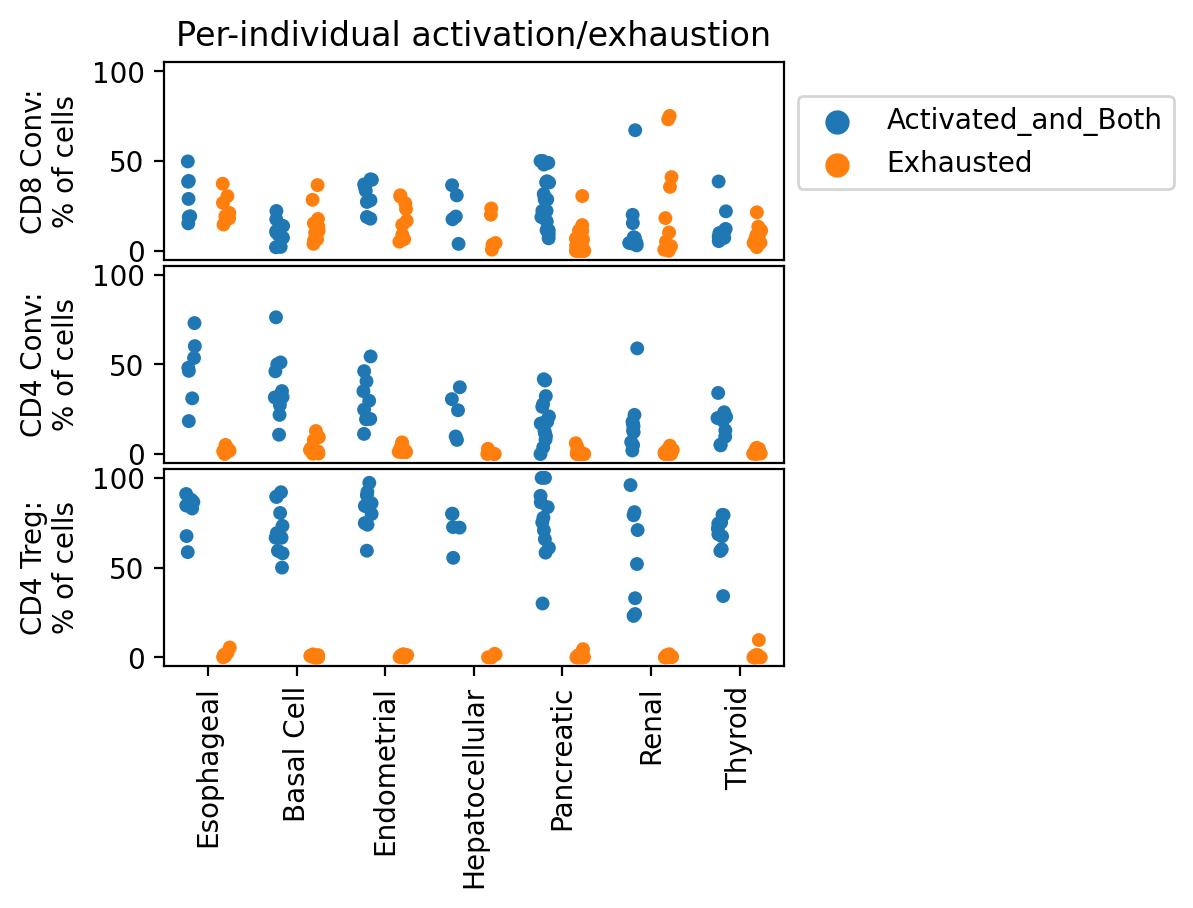

In [211]:
nrows = 3

fig, axes = plt.subplots(dpi = 200, figsize = (4, 4), nrows = nrows, ncols = 1,
                        gridspec_kw = {'hspace' : 0.03})


for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
    dat = pct_activated_sample_lineage_filt[pct_activated_sample_lineage_filt['Lineage']==cell_type].melt(
        value_vars = ['Activated_and_Both', 'Exhausted'], id_vars = ['patient.uid', 'cancerType'])

    ax = axes[i]
    # fig, ax = plt.subplots(dpi = 200, figsize = (5, 2))
    sns.stripplot(x = dat['cancerType'], y = dat['value'], hue = dat['variable'], 
                  order = [c for c in ctype_order if c in ctypes_filt], 
                  dodge = True, ax = ax)
    ax.tick_params('x', rotation = 90)
    ylim = (-5.0, 105.0)
    ax.set_ylim(ylim)
    
    if i==nrows-1:
        ax.set_xticklabels([cancer_map[item.get_text()] for item in ax.get_xticklabels()])
    else:
        ax.set_xticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('%s:\n%% of cells' % cell_type)
    
    if i ==0:
        ax.legend(title = '',  bbox_to_anchor=(1, .9))
        ax.set_title('Per-individual activation/exhaustion')
    else:
        ax.get_legend().remove()
# plt.suptitle('Per-individual activation/exhaustion')

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.pdf'), bbox_inches="tight")


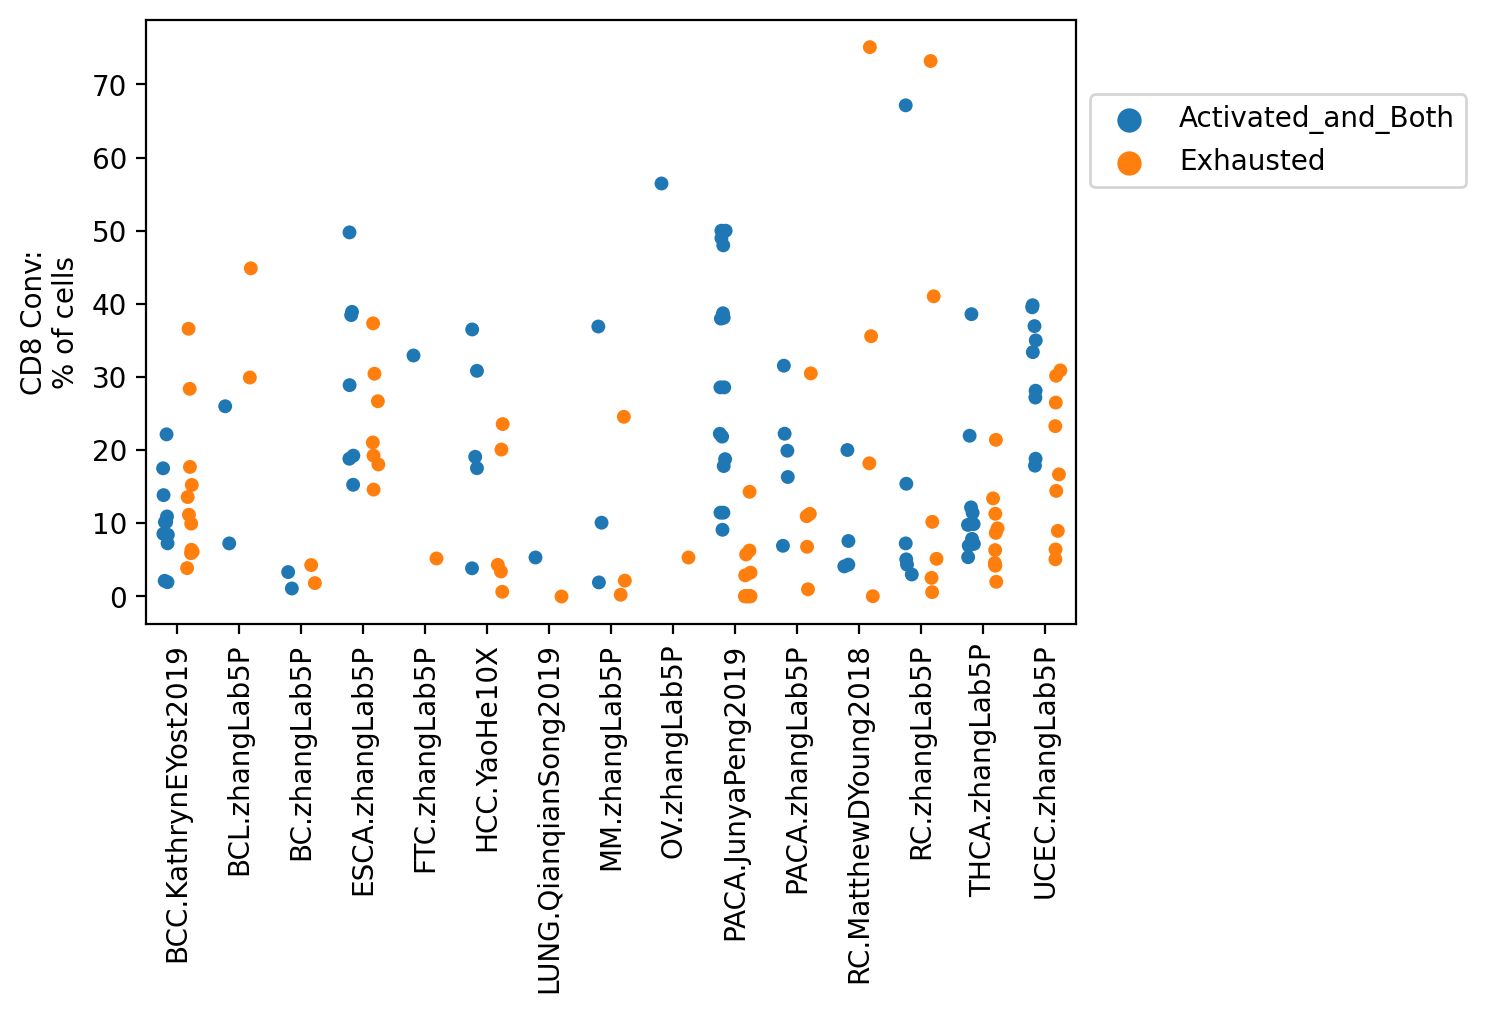

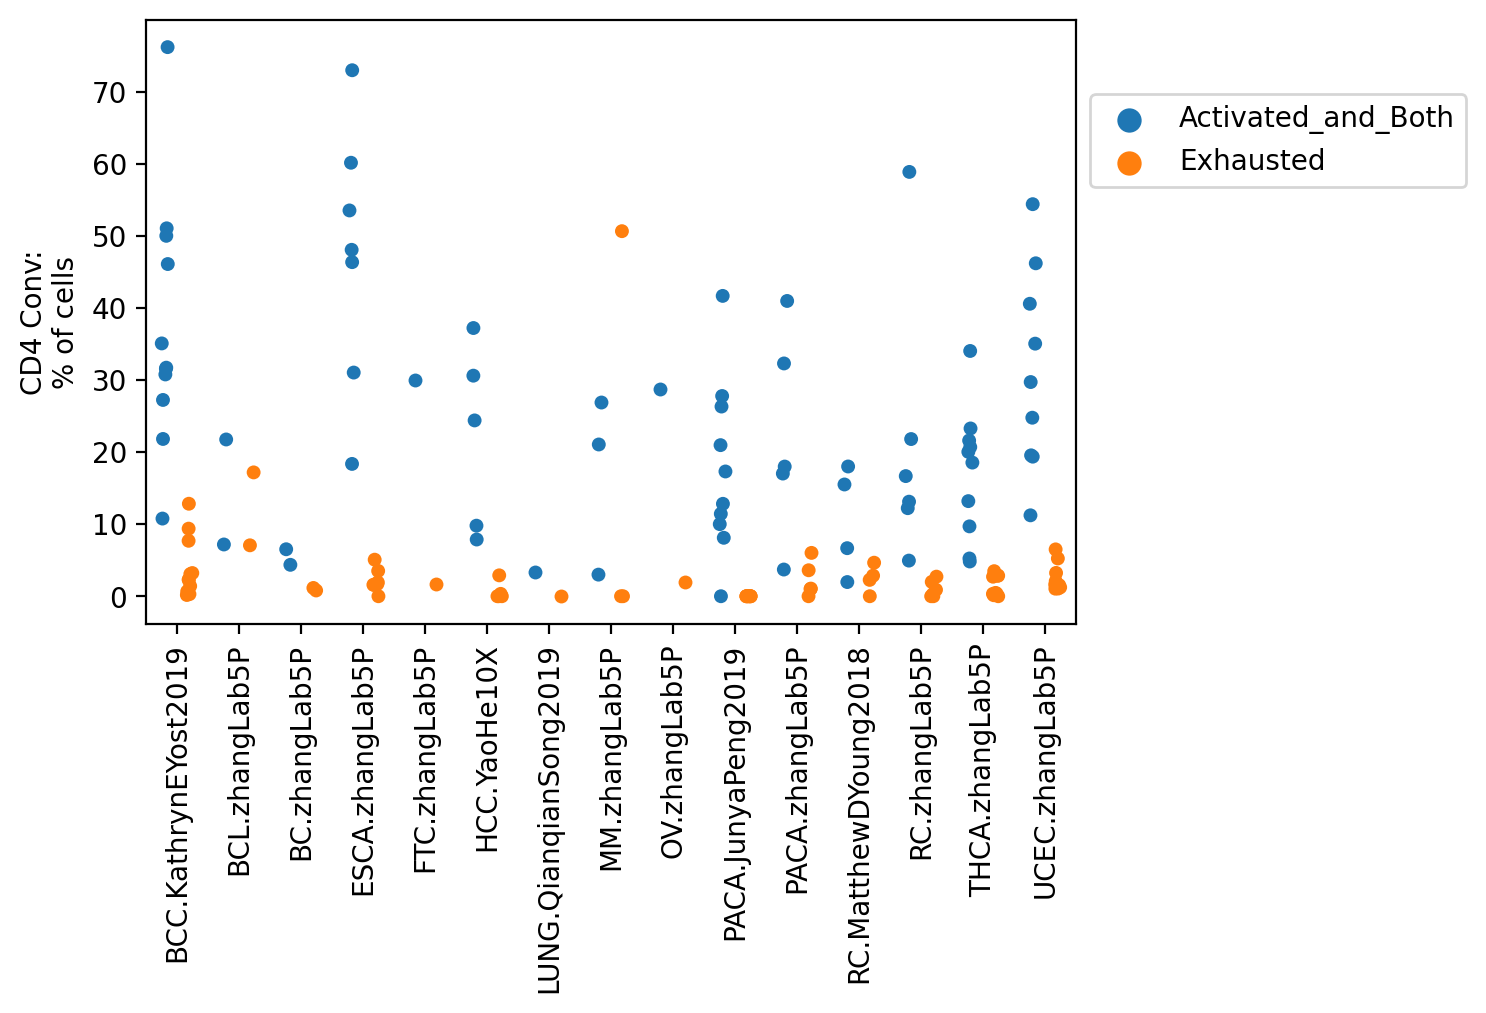

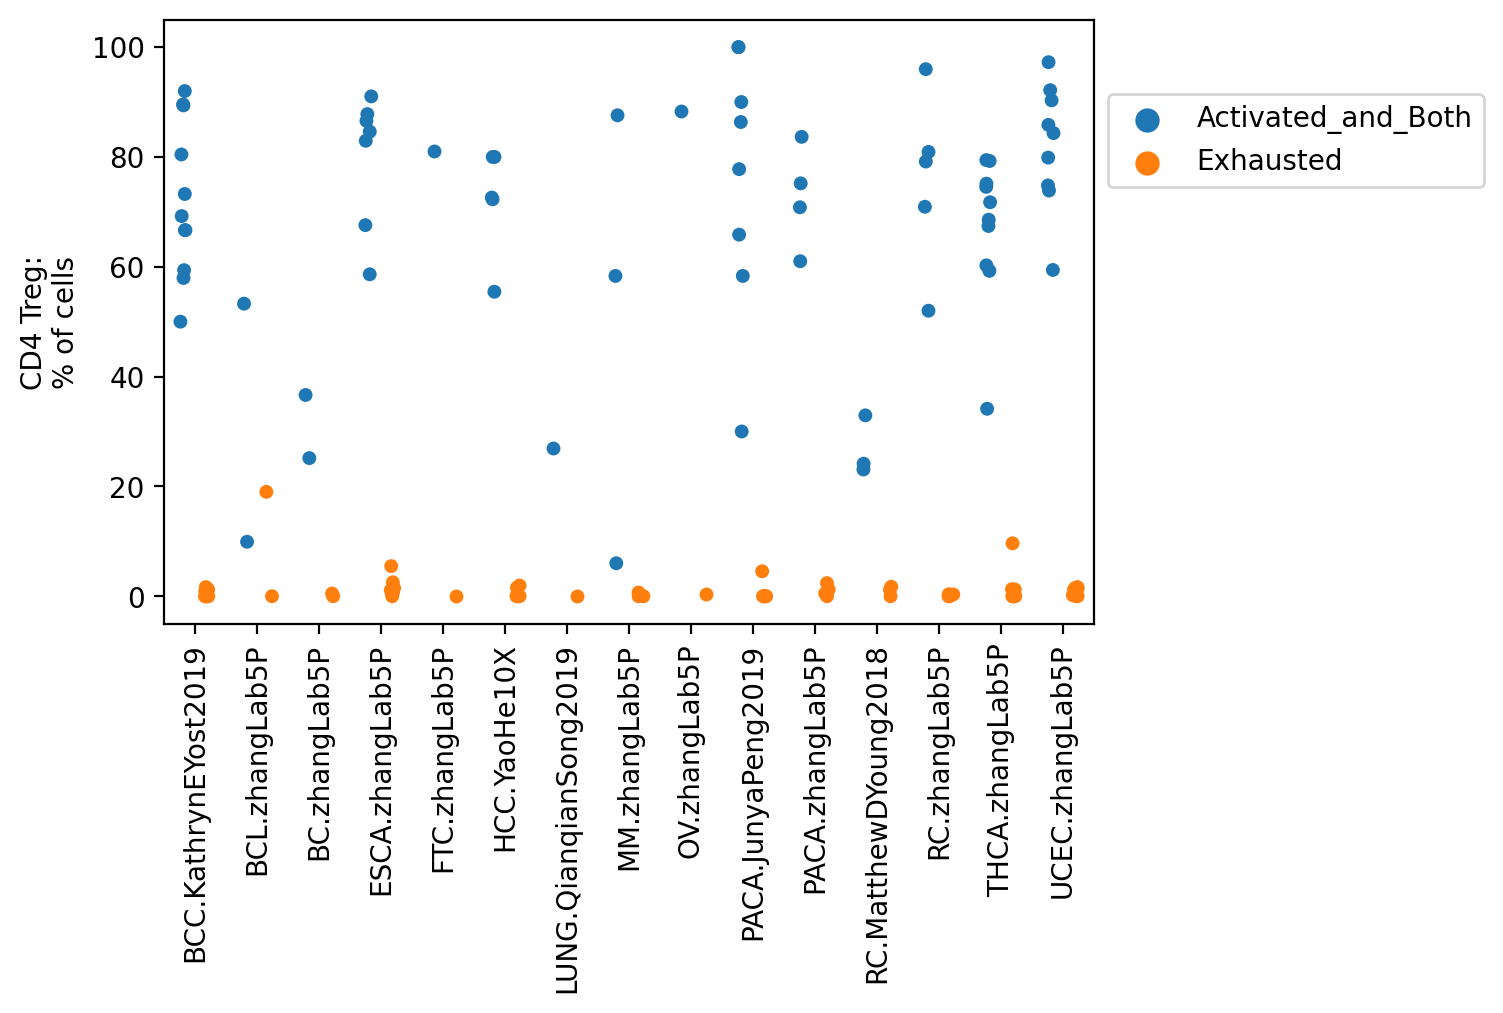

In [212]:
for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
    dat = pct_activated_sample_lineage_filt[pct_activated_sample_lineage_filt['Lineage']==cell_type].melt(
        value_vars = ['Activated_and_Both', 'Exhausted'], 
        id_vars = ['patient.uid', 'cancerType', 'dataset'])
    
    # dat = dat[dat['variable']=='Activated_and_Both']
    
    fig, ax = plt.subplots(dpi = 200)
    sns.stripplot(x = dat['dataset'], y = dat['value'], hue = dat['variable'], 
                  # order = [c for c in ctype_order if c in ctypes_filt], 
                  dodge = True, ax = ax)
    ax.tick_params('x', rotation = 90)
    ax.legend(title = '',  bbox_to_anchor=(1, .9))
    ax.set_xlabel('')
    ax.set_ylabel('%s:\n%% of cells' % cell_type)



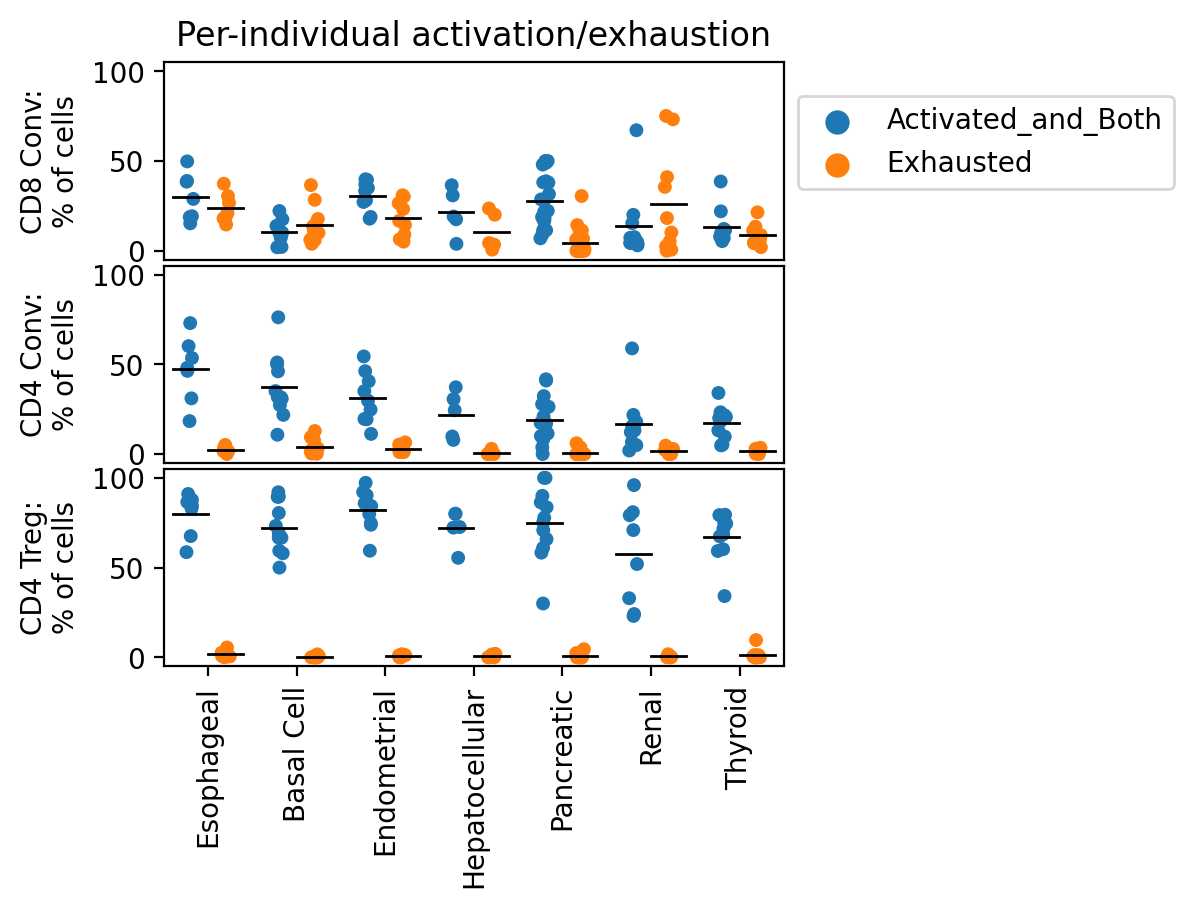

In [213]:
nrows = 3

fig, axes = plt.subplots(dpi = 200, figsize = (4, 4), nrows = nrows, ncols = 1,
                        gridspec_kw = {'hspace' : 0.03})


for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
    dat = pct_activated_sample_lineage_filt[pct_activated_sample_lineage_filt['Lineage']==cell_type].melt(
        value_vars = ['Activated_and_Both', 'Exhausted'], id_vars = ['patient.uid', 'cancerType'])

    ax = axes[i]
    # fig, ax = plt.subplots(dpi = 200, figsize = (5, 2))
    sns.stripplot(x = dat['cancerType'], y = dat['value'], hue = dat['variable'], 
                  order = [c for c in ctype_order if c in ctypes_filt], 
                  dodge = True, ax = ax)
    
    
    # plot the mean line
    sns.boxplot(showmeans=True, meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 1},
                medianprops={'visible': False}, whiskerprops={'visible': False}, zorder=10,
                x=dat['cancerType'], y=dat['value'], hue = dat['variable'], order=[c for c in ctype_order if c in ctypes_filt],
                showfliers=False, showbox=False, showcaps=False, ax=ax)

    ax.tick_params('x', rotation = 90)
    ax.set_ylim(ylim)
    
    if i==nrows-1:
        ax.set_xticklabels([cancer_map[item.get_text()] for item in ax.get_xticklabels()])
    else:
        ax.set_xticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('%s:\n%% of cells' % cell_type)
    
    if i ==0:
        # ax.legend(title = '',  bbox_to_anchor=(1, .9))
        ax.set_title('Per-individual activation/exhaustion')
        
        # Remove duplicates in legend 
        hand, labl = ax.get_legend_handles_labels()
        handout=[]
        lablout=[]
        for h,l in zip(hand,labl):
           if l not in lablout:
                lablout.append(l)
                handout.append(h)
        ax.legend(handout, lablout, title = '',  bbox_to_anchor=(1, .9))

    else:
        ax.get_legend().remove()
        

# plt.suptitle('Per-individual activation/exhaustion')

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.pdf'), bbox_inches="tight")


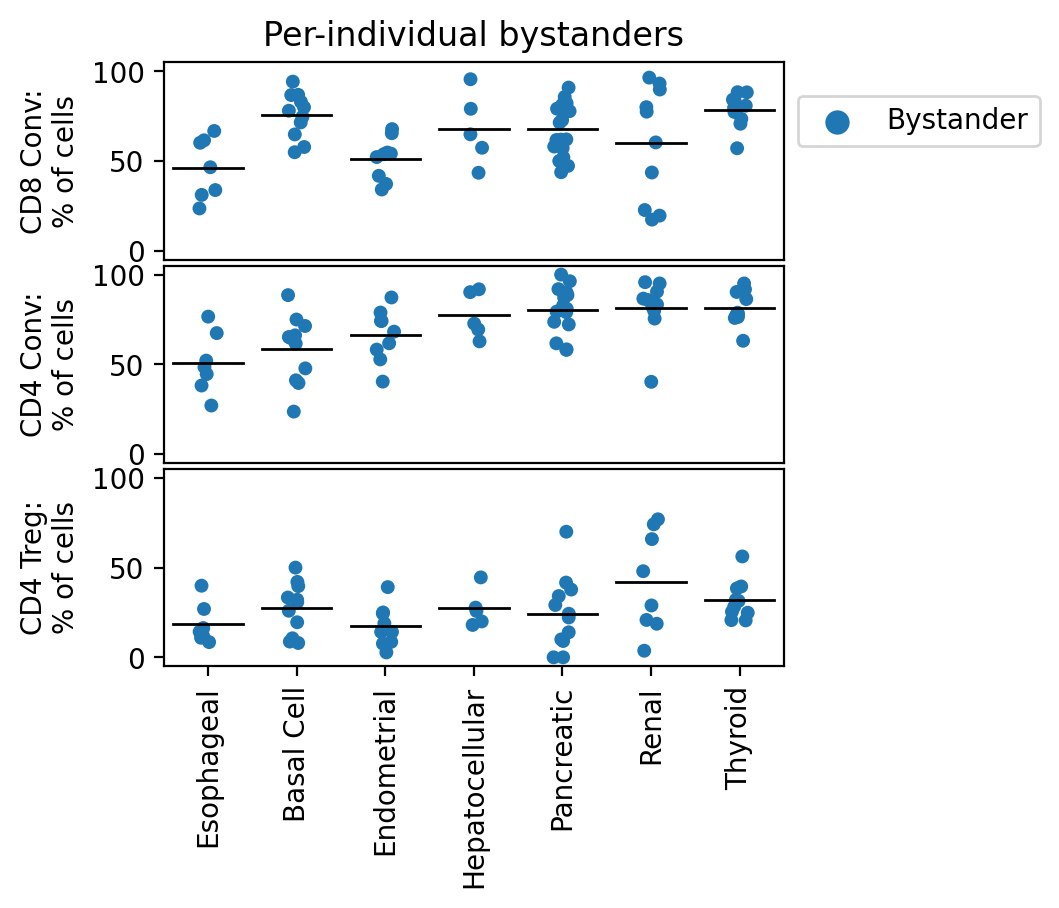

In [214]:
nrows = 3

fig, axes = plt.subplots(dpi = 200, figsize = (4, 4), nrows = nrows, ncols = 1,
                        gridspec_kw = {'hspace' : 0.03})


for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
    dat = pct_activated_sample_lineage_filt[pct_activated_sample_lineage_filt['Lineage']==cell_type].melt(
        value_vars = ['Bystander'], id_vars = ['patient.uid', 'cancerType'])

    ax = axes[i]
    # fig, ax = plt.subplots(dpi = 200, figsize = (5, 2))
    sns.stripplot(x = dat['cancerType'], y = dat['value'], hue = dat['variable'], 
                  order = [c for c in ctype_order if c in ctypes_filt], 
                  dodge = True, ax = ax)
    
    # plot the mean line
    sns.boxplot(showmeans=True, meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 1},
                medianprops={'visible': False}, whiskerprops={'visible': False}, zorder=10,
                x=dat['cancerType'], y=dat['value'], hue = dat['variable'], order=[c for c in ctype_order if c in ctypes_filt],
                showfliers=False, showbox=False, showcaps=False, ax=ax)


    ax.tick_params('x', rotation = 90)
    ax.set_ylim(ylim)
    
    if i==nrows-1:
        ax.set_xticklabels([cancer_map[item.get_text()] for item in ax.get_xticklabels()])
    else:
        ax.set_xticks([])
    
    ax.set_xlabel('')
    ax.set_ylabel('%s:\n%% of cells' % cell_type)
    
    if i ==0:
        # ax.legend(title = '',  bbox_to_anchor=(1, .9))
        ax.set_title('Per-individual bystanders')
        # Remove duplicates in legend 
        hand, labl = ax.get_legend_handles_labels()
        handout=[]
        lablout=[]
        for h,l in zip(hand,labl):
           if l not in lablout:
                lablout.append(l)
                handout.append(h)
        ax.legend(handout, lablout, title = '',  bbox_to_anchor=(1, .9))
    else:
        ax.get_legend().remove()
# plt.suptitle('Per-individual activation/exhaustion')

# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.png'), bbox_inches="tight")
# plt.savefig(os.path.join(figdir, 'PctCellsActivatedExhaustedBoth_BySampleByLineage_Pancancer.pdf'), bbox_inches="tight")


#### Calculate stats

In [ ]:
from scipy.stats import ttest_rel
from scipy.stats import f_oneway

In [ ]:
from scipy.stats import tukey_hsd

In [ ]:
pip list | grep scipy


##### Filter by min_cells

* ANOVA for Activation differences by cell type

In [ ]:
for cell_type in ['CD8 Conv', 'CD4 Conv', 'CD4 Treg']:
    print(cell_type)

    dat = pct_activated_sample_lineage_filt[pct_activated_sample_lineage_filt['Lineage']==cell_type]
    dat = dat[['Activated_and_Both', 'cancerType']].dropna()

    F, pval = f_oneway(*[dat[dat['cancerType'] == ctype]['Activated_and_Both'] for ctype in 
                                      dat['cancerType'].unique()])
    
    print(F, pval)


- T-test for percent activated vs exhausted per sample (across all cancer types), by lineage

In [ ]:
for cell_type in ['CD8 Conv', 'CD4 Conv', 'CD4 Treg']:
    print(cell_type)

    dat = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]
    dat = dat[['Activated', 'Exhausted']].dropna()


    print(ttest_rel(dat['Activated'], dat['Exhausted']))

##### All cells

In [ ]:
# Include both
for cell_type in ['CD8 Conv', 'CD4 Conv', 'CD4 Treg']:
    print(cell_type)

    dat = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type].copy()

    dat['Activated_Both'] = dat['Activated'] + dat['Both']
    dat['Exhausted_Both'] = dat['Exhausted'] + dat['Both']
    dat = dat[['Activated_Both', 'Exhausted_Both']].dropna()


    print(ttest_rel(dat['Activated_Both'], dat['Exhausted_Both']))

- T-test for percent activated in one lineage compared to another

In [ ]:
for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):

    for j, cell_type_other in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
        
        if i> j:
            print('%s vs %s ' % (cell_type, cell_type_other))

            dat1 = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]
            dat1.index = dat1['patient.uid']

            dat2 = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type_other]
            dat2.index = dat2['patient.uid']
            
            dat1 = dat1['Activated'].dropna()
            dat2 = dat2['Activated'].dropna()

            overlap = sorted(dat1.index.intersection(dat2.index))
            print(ttest_rel(dat1[overlap], dat2.loc[overlap]))

In [ ]:
# Include both

for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):

    for j, cell_type_other in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
        
        if i> j:
            print('%s vs %s ' % (cell_type, cell_type_other))

            dat1 = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type].copy()
            dat1.index = dat1['patient.uid']
            dat1['Activated_Both'] = dat1['Activated'] + dat1['Both'] 

            dat2 = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type_other].copy()
            dat2.index = dat2['patient.uid']
            dat2['Activated_Both'] = dat2['Activated'] + dat2['Both'] 
            
            dat1 = dat1['Activated_Both'].dropna()
            dat2 = dat2['Activated_Both'].dropna()

            overlap = sorted(dat1.index.intersection(dat2.index))
            print(ttest_rel(dat1[overlap], dat2.loc[overlap]))

- T-test for percent exhausted in one lineage compared to another

In [ ]:
for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):

    for j, cell_type_other in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
        
        if i> j:
            print('%s vs %s ' % (cell_type, cell_type_other))

            dat1 = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]
            dat1.index = dat1['patient.uid']

            dat2 = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type_other]
            dat2.index = dat2['patient.uid']
            
            dat1 = dat1['Exhausted'].dropna()
            dat2 = dat2['Exhausted'].dropna()

            overlap = sorted(dat1.index.intersection(dat2.index))
            print(ttest_rel(dat1[overlap], dat2.loc[overlap]))

In [ ]:
# Include both

for i, cell_type in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):

    for j, cell_type_other in enumerate(['CD8 Conv', 'CD4 Conv', 'CD4 Treg']):
        
        if i> j:
            print('%s vs %s ' % (cell_type, cell_type_other))

            dat1 = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type].copy()
            dat1.index = dat1['patient.uid']
            dat1['Exhausted_Both'] = dat1['Exhausted'] + dat1['Both'] 

            dat2 = pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type_other].copy()
            dat2.index = dat2['patient.uid']
            dat2['Exhausted_Both'] = dat2['Exhausted'] + dat2['Both'] 
            
            dat1 = dat1['Exhausted_Both'].dropna()
            dat2 = dat2['Exhausted_Both'].dropna()

            overlap = sorted(dat1.index.intersection(dat2.index))
            print(ttest_rel(dat1[overlap], dat2.loc[overlap]))

In [ ]:
cell_type = 'CD4 Treg'

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Activated'].mean()

In [ ]:
np.sum(pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type][['Activated', 
                                                                          'Both']], axis = 1).mean()

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Exhausted'].mean()

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Bystander'].mean()

In [ ]:
np.sum(pct_activated_sample_lineage_all[['Activated', 'Exhausted', 'Both', 'Bystander']], axis = 1)

In [ ]:
cell_type = 'CD4 Conv'

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Activated'].mean()

In [ ]:
np.sum(pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type][['Activated', 
                                                                          'Both']], axis = 1).mean()

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Exhausted'].mean()

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Bystander'].mean()

In [ ]:
cell_type = 'CD8 Conv'

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Activated'].mean()

In [ ]:
np.sum(pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type][['Activated', 
                                                                          'Both']], axis = 1).mean()

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Exhausted'].mean()

In [ ]:
pct_activated_sample_lineage_all[pct_activated_sample_lineage_all['Lineage']==cell_type]['Bystander'].mean()

## Per-cell percent activated/exhausted by lineage

In [ ]:
ind = (meta['loc']=='T')
ind = ind[ind].index

In [ ]:
lineage_class = pd.Series(np.nan, index = meta.index)

In [ ]:
lineage_class

In [ ]:
gating_class = pd.Series(np.nan, index = gating.index)

gating_class.loc[gating.str.contains('CD4')] = 'CD4'
gating_class.loc[gating=='Treg'] = 'CD4'
gating_class.loc[gating.str.contains('CD8')] = 'CD8'
gating_class.loc[gating_class.isna()] = 'Other'



In [ ]:
meta[cluster_col].unique()

In [ ]:
lineage_class.loc[meta[cluster_col].str.contains('CD4')] = 'CD4 Conv'
lineage_class.loc[meta[cluster_col].str.contains('Treg')] = 'CD4 Treg'
lineage_class.loc[meta[cluster_col].str.contains('CD8')] = 'CD8 Conv'
lineage_class.loc[lineage_class.isna()] = 'Other'

In [ ]:
lineage_class.value_counts()

In [ ]:
lineage_class[ind]

In [ ]:
activation_by_ctype_lineage

In [ ]:
activation_by_ctype_lineage = activation_score[ind].groupby(
    [meta.loc[ind, 'cancerType'], lineage_class[ind]]).mean()


activation_by_ctype_lineage = pd.DataFrame(activation_by_ctype_lineage).reset_index().pivot(
    columns = 'cancerType', index = 'level_1')


activation_by_ctype_lineage.columns = activation_by_ctype_lineage.columns.droplevel()


In [ ]:
activation_by_ctype_lineage

In [ ]:
[cancer_map[c.get_text()] for c in ax.get_xticklabels()]

In [ ]:
fig, ax = plt.subplots(dpi = 200)
sns.heatmap(activation_by_ctype_lineage.loc[:, :], ax = ax)
ax.set_ylabel('Lineage')
ax.set_title('Mean activation score')
ax.set_xlabel('')
ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)


In [ ]:
exhaustion_by_ctype_lineage = exhaustion_score[ind].groupby(
    [meta.loc[ind, 'cancerType'], lineage_class[ind]]).mean()


exhaustion_by_ctype_lineage = pd.DataFrame(exhaustion_by_ctype_lineage).reset_index().pivot(
    columns = 'cancerType', index = 'level_1')


exhaustion_by_ctype_lineage.columns = exhaustion_by_ctype_lineage.columns.droplevel()


In [ ]:
fig, ax = plt.subplots(dpi = 200)
sns.heatmap(exhaustion_by_ctype_lineage.loc[:, :], ax = ax)
ax.set_ylabel('Lineage')
ax.set_title('Mean exhaustion score')
ax.set_xlabel('')
ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)


In [ ]:
ctype_order = meta['cancerType'].unique()
ctype_order

In [ ]:
for ctype in ctype_order:
    print(ctype)
    # Pct of activated/cycling cells within phenotype


In [ ]:
lineage_class

In [ ]:
lineage_class[ind]==lineage

In [ ]:

len(c)

In [ ]:
pct_activated

In [ ]:
pct_activated

In [ ]:
# Calculate % of activated, proliferating cells
pct_activated = pd.DataFrame()
pct_activated[['cancerType', 'lineage', 'Activated', 'Exhausted', 'Both', 'Bystander']] = np.nan


for lineage in ['CD4 Treg', 'CD4 Conv', 'CD8 Conv']:
    
    print(lineage)
    for ctype in ctype_order:
        print(ctype)
        # Pct of activated/cycling cells within phenotype
        ind_pheno = (meta.loc[ind, 'cancerType']==ctype) & (lineage_class[ind]==lineage)
        ind_pheno = ind_pheno[ind_pheno].index

        if len(ind_pheno) > 0:
            pct_act_pheno, pct_exhaus_pheno, pct_both_pheno, pct_bystander_pheno = [0]*4
        else:
            pct_act_pheno, pct_exhaus_pheno, pct_both_pheno, pct_bystander_pheno = [np.nan]*4

        
        c = (activated_cells[ind_pheno]) & (-exhausted_cells[ind_pheno])
        if (True in c.unique()) :
            pct_act_pheno = ((c).value_counts(normalize = True)*100)[True]            
        # pct_activated.loc[ctype, 'Activated'] = pct_act_pheno

        c = (-activated_cells[ind_pheno]) & (exhausted_cells[ind_pheno])
        if (True in c.unique()):
            pct_exhaus_pheno = ((c).value_counts(normalize = True)*100)[True]
        # pct_activated.loc[ctype, 'Exhausted'] = pct_exhaus_pheno

        c = (activated_cells[ind_pheno]) & (exhausted_cells[ind_pheno])
        if (True in c.unique()):
            pct_both_pheno = ((c).value_counts(normalize = True)*100)[True]
        # pct_activated.loc[ctype, 'Both'] = pct_both_pheno

        c = (-activated_cells[ind_pheno]) & (-exhausted_cells[ind_pheno])
        if (True in c.unique()):
            pct_bystander_pheno = ((c).value_counts(normalize = True)*100)[True]
#         pct_activated.loc[ctype, 'Bystander'] = pct_bystander_pheno

        
        pct_activated = pct_activated.append(pd.DataFrame([ctype, lineage, pct_act_pheno, 
                                                          pct_exhaus_pheno, pct_both_pheno, pct_bystander_pheno], 
                     index = pct_activated.columns).T)



In [ ]:
pct_activated.melt(id_vars = ['cancerType', 'lineage'])

In [ ]:
pct_activated_df = pct_activated.melt(id_vars = ['cancerType', 'lineage']).pivot(columns = 'cancerType', 
                                             index = ['lineage', 'variable'])#.reset_index()

In [ ]:
np.sum(np.sum(pct_activated_df.isna()))

In [ ]:
pct_activated_df = pct_activated_df.astype('float')

In [ ]:
pct_activated_df.columns = pct_activated_df.columns.droplevel()


In [ ]:
pct_activated_df

In [ ]:
fig, ax = plt.subplots(dpi = 200)
sns.heatmap(pct_activated_df, ax = ax)

ax.hlines(y = 4, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.hlines(y = 8, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.hlines(y = 12, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.set_ylabel('Lineage')
# ax.set_title('Mean exhaustion score')
# ax.set_xlabel('')
# ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)


In [ ]:
# fig, ax = plt.subplots(dpi = 200)
# sns.heatmap(pct_activated_df, ax = ax)

# ax.hlines(y = 4, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.hlines(y = 8, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.hlines(y = 12, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# # ax.set_ylabel('Lineage')
# # ax.set_title('Mean exhaustion score')
# # ax.set_xlabel('')
# # ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)


In [ ]:
# index_order = [(lineage, name) for (lineage, name) in pct_activated_df.index if 'Bystander'!=name]

In [ ]:
index_order = [(lineage, name) for lineage in [ 'CD8 Conv', 'CD4 Conv', 'CD4 Treg',] 
               for name in ['Activated', 'Exhausted', 'Both']]

In [ ]:
ctype_order = pct_activated_df.loc[[(lineage, name) for (lineage, name) 
                      in pct_activated_df.index if 'Activated'==name], :].mean().sort_values(
                ascending = False).index

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (5, 3))
sns.heatmap(pct_activated_df.loc[index_order, ctype_order], ax = ax)

ax.hlines(y = 3, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.hlines(y = 6, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.hlines(y = 9, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.set_ylabel('')
ax.set_xlabel('Cancer Type')
ax.set_title('% of activated and exhausted cells')
# ax.set_xlabel('')
ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)


In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (5, 3))
# sns.heatmap(pct_activated_df.loc[index_order, ctype_order], ax = ax)

# ax.hlines(y = 3, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.hlines(y = 6, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.hlines(y = 9, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.set_ylabel('')
# ax.set_xlabel('Cancer Type')
# ax.set_title('% of activated and exhausted cells')
# # ax.set_xlabel('')
# ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)


In [ ]:
ctypes_filt

In [ ]:
index_order = [(lineage, name) for lineage in [ 'CD8 Conv', 'CD4 Conv', 'CD4 Treg',] 
               for name in ['Activated', 'Exhausted', 'Both', 'Bystander']]

In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (4, 3))
sns.heatmap(pct_activated_df.loc[index_order, 
                                 [c for c in ctype_order if c in ctypes_filt]], ax = ax)

ax.hlines(y = 4, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.hlines(y = 8, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.hlines(y = 12, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.set_ylabel('')
ax.set_xlabel('Cancer Type')
ax.set_title('% of activated and exhausted cells')
# ax.set_xlabel('')
ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)


In [ ]:
fig, ax = plt.subplots(dpi = 200, figsize = (4, 3))
sns.heatmap(pct_activated_df.loc[index_order, 
                                 [c for c in ctype_order if c in ctypes_filt]], ax = ax)

ax.hlines(y = 3, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.hlines(y = 6, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.hlines(y = 9, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
ax.set_ylabel('')
ax.set_xlabel('Cancer Type')
ax.set_title('% of activated and exhausted cells')
# ax.set_xlabel('')
ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)


In [ ]:
# fig, ax = plt.subplots(dpi = 200, figsize = (4, 3))
# sns.heatmap(pct_activated_df.loc[index_order, 
#                                  [c for c in ctype_order if c in ctypes_filt]], ax = ax)

# ax.hlines(y = 3, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.hlines(y = 6, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.hlines(y = 9, xmin = 0, xmax = pct_activated_df.shape[1], color = 'white')
# ax.set_ylabel('')
# ax.set_xlabel('Cancer Type')
# ax.set_title('% of activated and exhausted cells')
# # ax.set_xlabel('')
# ax.set_xticklabels([cancer_map[c.get_text()] for c in ax.get_xticklabels()], rotation = 90)
